Choppiness Index piyasa oynaklığının derecesini ölçer. Belirli sayıda dönem (N) boyunca Gerçek Aralığın toplamını, aynı dönemde piyasanın en yüksek ve en düşük aralığıyla karşılaştıran logaritmik bir formül kullanılarak hesaplanır. Dalgalılık Endeksi (CI) formülü aşağıdaki gibidir:

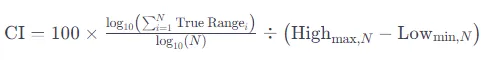

Denklem.1: Dalgalılık Endeksi (CI:Choppiness Index) formülü, belirli bir dönemdeki kümülatif fiyat hareketi aralığını genel fiyat aralığıyla karşılaştırarak piyasa oynaklığını değerlendirir ve trendin gücü hakkında fikir verir.

Denklemdeki Parametreler;

∑i=1 True Rangei​, son N dönem boyunca Gerçek Aralık'ın toplamıdır.
Highmax,N​ son N periyodunun en yüksek zirvesidir.
Lowmin,N​ son N periyodundaki en düşük diptir.
N, hesaplamada kullanılan dönem sayısıdır (genellikle 14'e ayarlanır).

Yatırımcılar, trend ve aralığa bağlı piyasalar arasında ayrım yapmak için Dalgalılık Endeksi'ni kullanıyor. Örneğin, düşük bir Dalgalanma Endeksi değeri güçlü bir trendin sinyalini verirken, yüksek değerler daha yönsüz bir piyasanın göstergesidir. Bu bilgi, yatırımcıların trendi takip eden stratejiler mi uygulayacakları yoksa aralık trade taktiklerine mi odaklanacaklarına karar vermelerine yardımcı olur.

[*********************100%%**********************]  1 of 1 completed

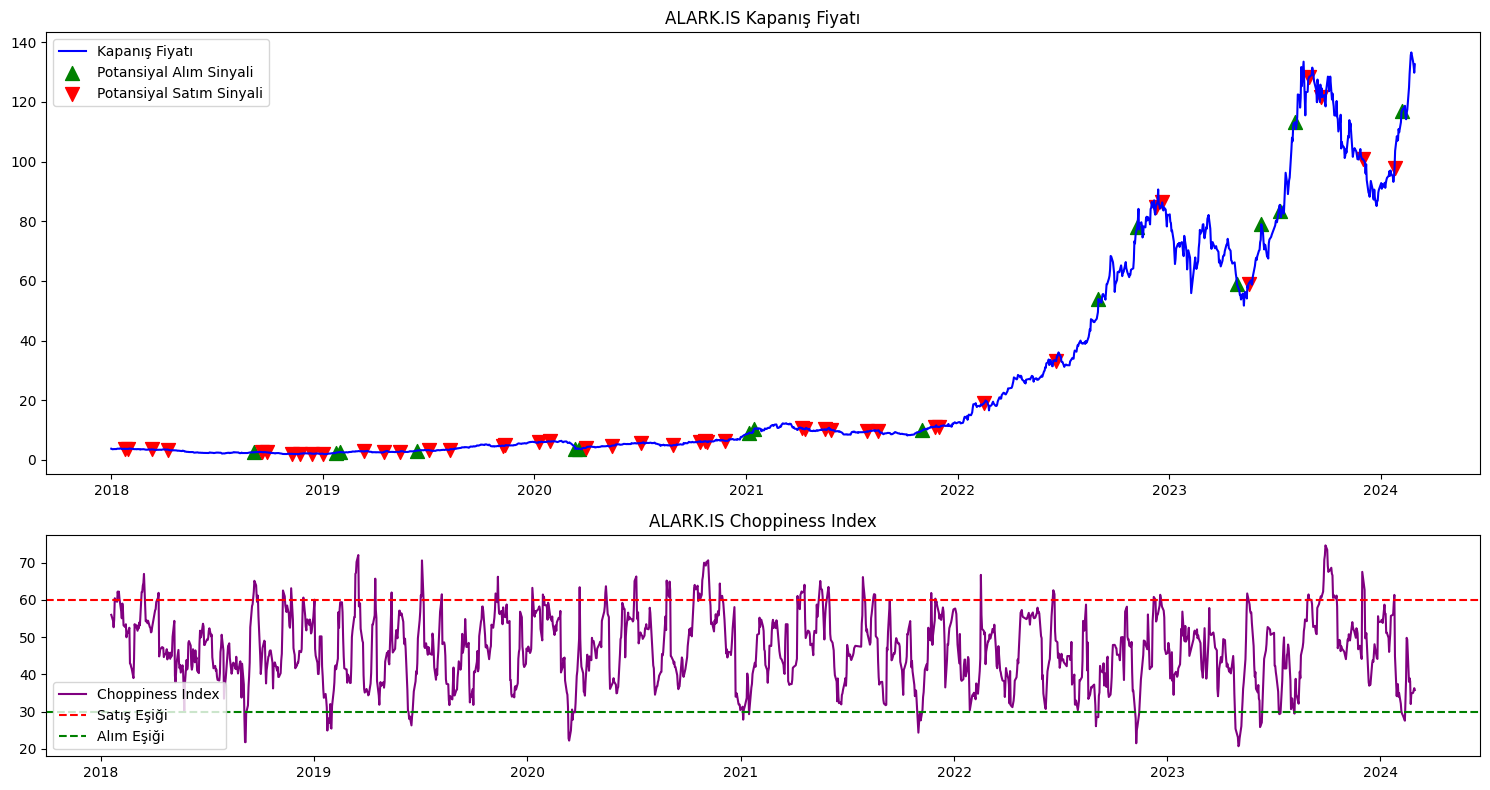

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


def download_stock_data(tickers, start_date, end_date):
    """data."""
    return yf.download(tickers, start=start_date, end=end_date)

def calculate_true_range(data):
    """ATR hesaplama."""
    return np.maximum.reduce([
        data['High'] - data['Low'],
        abs(data['High'] - data['Close'].shift()),
        abs(data['Low'] - data['Close'].shift())
    ])

def calculate_indicators(data, window_size):
    """ATR'yi, en yüksek yüksek, en düşük düşük ve Dalgalılık İndeksini hesaplayın."""
    data['TR'] = calculate_true_range(data)
    data['ATR'] = data['TR'].rolling(window=window_size).mean()
    data['highestHigh'] = data['High'].rolling(window=window_size).max()
    data['lowestLow'] = data['Low'].rolling(window=window_size).min()

    # Choppiness Index Hesaplama
    data['Sum_TR'] = data['TR'].rolling(window=window_size).sum()
    data['Range'] = data['highestHigh'] - data['lowestLow']
    data['CHOP'] = 100 * np.log10(data['Sum_TR'] / data['Range']) / np.log10(window_size)
    data['CHOP'] = data['CHOP'].clip(lower=0, upper=100)

def generate_signals(data):
    """Choppiness Endeksi'ne dayalı alım ve satım sinyalleri oluşturma"""
    data['CHOP_lag1'] = data['CHOP'].shift()
    data['signal'] = np.where((data['CHOP'] < 30) & (data['CHOP_lag1'] >= 30), 'Alım Sinyali Arayısı',
                              np.where((data['CHOP'] > 60) & (data['CHOP_lag1'] <= 60), 'Satım Sinyali Arayısı', 'Notr'))

def plot_data(data, ticker):
    """Hisse Fiyatı ve Sinyalleri Görselleştir."""
    fig, ax = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [2, 1]})

    ax[0].plot(data['Close'], label='Kapanış Fiyatı', color='blue')
    buy_signals = data[data['signal'] == 'Alım Sinyali Arayısı']
    sell_signals = data[data['signal'] == 'Satım Sinyali Arayısı']
    ax[0].scatter(buy_signals.index, buy_signals['Close'], color='green', label='Potansiyal Alım Sinyali', marker='^', alpha=1, s=100)
    ax[0].scatter(sell_signals.index, sell_signals['Close'], color='red', label='Potansiyal Satım Sinyali', marker='v', alpha=1, s=100)
    ax[0].set_title(f"{ticker} Kapanış Fiyatı")
    ax[0].legend()

    ax[1].plot(data['CHOP'], label='Choppiness Index', color='purple')
    ax[1].axhline(60, color='red', linestyle='--', label='Satış Eşiği')
    ax[1].axhline(30, color='green', linestyle='--', label='Alım Eşiği')
    ax[1].set_title(f"{ticker} Choppiness Index")
    ax[1].legend()

    plt.tight_layout()
    plt.show()


# Execute Functions
tickers = "ALARK.IS"
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = download_stock_data(tickers, start_date=start_date, end_date=end_date)
window_size = 14  # Bu değeri değiştirebilirsin
calculate_indicators(data, window_size)
generate_signals(data)
plot_data(data, tickers)

Figür. 1: Dalgalılık Endeksini Kullanarak Trend Belirlemenin Gösterimi — Grafik, Dalgalılık Endeksi'nin uygulanmasını göstermektedir; üst eşik, azalan piyasa trendini (potansiyel satış sinyali) gösterirken alt eşik, ortaya çıkan trendleri (potansiyel satın alma sinyali) gösterir.

Disparity Index Strategy

Farklılık Endeksi, daha uzun bir trende göre kısa vadeli fiyat dalgalanmalarını yansıtan, en son kapanış fiyatı ile seçilmiş bir hareketli ortalama arasındaki yüzde farkını ölçen teknik bir göstergedir. Aşağıdaki formül kullanılarak hesaplanır:

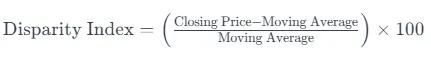

Denklem.2: Farklılık Endeksi, mevcut kapanış fiyatının seçilmiş bir hareketli ortalamaya göre göreceli konumunu ölçer ve aşırı alım veya aşırı satış koşullarını vurgulayarak potansiyel fiyat dönüşlerini belirlemeye yönelik bir araç görevi görür.

Denklemdeki;

Kapanış Fiyatı varlığın en son kapanış fiyatıdır.
Hareketli Ortalama, belirli bir süre boyunca kapanış fiyatının hareketli ortalamasıdır.

Yatırımcılar bu endeksi potansiyel fiyat dönüşlerini belirlemek için kullanıyor. Yüksek Eşitsizlik Endeksi değeriyle gösterilen, hareketli ortalamadan önemli bir sapma, genellikle ortalamaya geri dönüşten önce gelir.

Örneğin, +/- %5'lik bir eşik, bir işleme ne zaman girmenin veya çıkmanın düşünülmesi gerektiğinin sinyalini verebilir. Pozitif değerler, fiyatın hareketli ortalamanın üzerinde olduğunu (potansiyel aşırı değerleme), negatif değerler ise fiyatın hareketli ortalamanın altında olduğunu (potansiyel düşük değerleme) gösterir.

[*********************100%%**********************]  1 of 1 completed

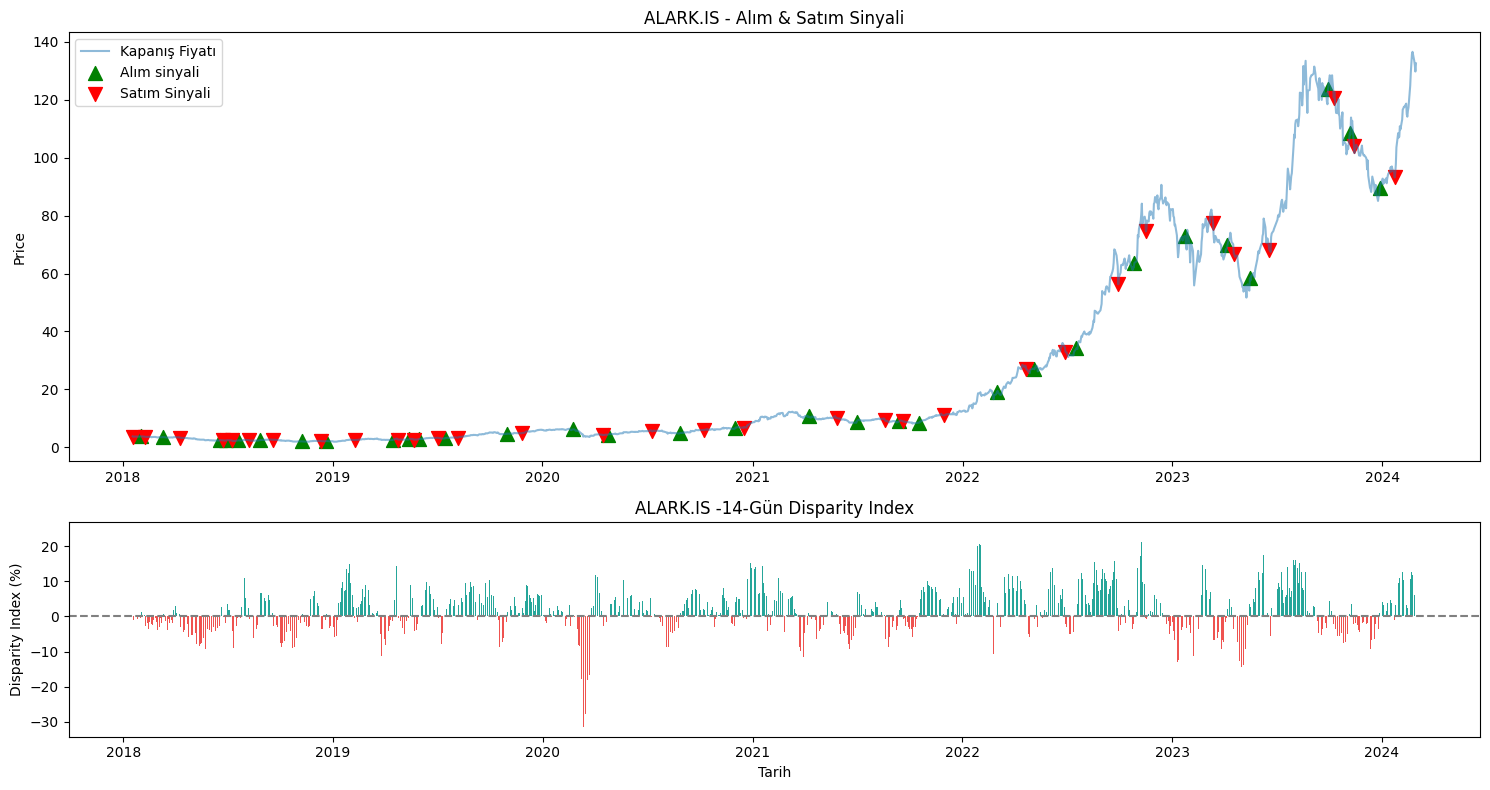

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Tarihsel Data Çağırma
def get_historical_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    return df

# DI Hesaplama
def get_di(data, lookback):
    ma = data.rolling(lookback).mean()
    return ((data - ma) / ma) * 100

# Strateji
def implement_di_strategy(prices, di):
    buy_price = []
    sell_price = []
    di_signal = []
    signal = 0

    for i in range(len(prices)):
        if di[i-4] < 0 and di[i-3] < 0 and di[i-2] < 0 and di[i-1] < 0 and di[i] > 0:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                di_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                di_signal.append(0)
        elif di[i-4] > 0 and di[i-3] > 0 and di[i-2] > 0 and di[i-1] > 0 and di[i] < 0:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                di_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                di_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            di_signal.append(0)

    return buy_price, sell_price, di_signal
txt1 = "{fname} {window_size}".format(fname = "di_", window_size = window_size)

# Stratejiyi Uygulayacak Ana Fonksiyon
def execute_di_strategy(stock_symbol, start_date, end_date):
    stock_data = get_historical_data(stock_symbol, start_date, end_date)
    stock_data[txt1] = get_di(stock_data['Close'], window_size)
    stock_data.dropna(inplace=True)

    buy_price, sell_price, _ = implement_di_strategy(stock_data['Close'], stock_data[txt1])

    # DI ile Alım ve Satım Sinyali Üretme
    fig, ax = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [2, 1]})
    
    # Sinyaller ve Hisse Fiyatı Görseli
    ax[0].plot(stock_data['Close'], label='Kapanış Fiyatı', alpha=0.5)
    ax[0].scatter(stock_data.index, buy_price, label='Alım sinyali', marker='^', color='green', s=100)
    ax[0].scatter(stock_data.index, sell_price, label='Satım Sinyali', marker='v', color='red', s=100)
    ax[0].set_title(f'{stock_symbol} - Alım & Satım Sinyali')
    ax[0].set_ylabel('Price')
    ax[0].legend()

    # DI Bar Gösterimi
    ax[1].bar(stock_data.index, stock_data[txt1], color=np.where(stock_data[txt1] >= 0, '#26a69a', '#ef5350'))
    ax[1].axhline(0, color='gray', linestyle='--')  # Add a line at zero
    ax[1].set_title(f'{stock_symbol} -{window_size}-Gün Disparity Index')
    ax[1].set_xlabel('Tarih')
    ax[1].set_ylabel('Disparity Index (%)')

    plt.tight_layout()
    plt.show()

# Hisse Bilgileri
stock_symbol = tickers
start_date = start_date
end_date = end_date
execute_di_strategy(stock_symbol, start_date, end_date)

Awesome Indicator vs MACD

Awesome Indicatorr (AO) ve Hareketli Ortalama Yakınsama Iraksama (MACD) momentum göstergeleridir, ancak momentumu farklı şekilde hesaplarlar.
Awesome Indicator (AO): AO, çubukların orta noktasının 34 dönemlik basit hareketli ortalamasının (SMA) (yüksek ve düşük ortalama) orta noktanın 5 dönemlik SMA'sından çıkarılmasıyla hesaplanır. 
Formül:
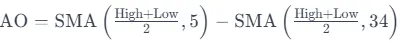

Awesome Indicator (AO), trade fırsatlarını belirlemek için boğa ve ayıların piyasa güçleri arasında ayrım yaparak hareketli ortalamalara dayalı olarak piyasa momentumunu hesaplar.

Moving Average Convergence Divergence (MACD): MACD, 12 dönemlik üstel hareketli ortalama (EMA) ile kapanış fiyatlarının 26 dönemlik EMA'sı arasındaki fark olarak hesaplanır. MACD Sinyal çizgisi daha sonra MACD'nin 9 dönemlik EMA'sı olarak türetilir.

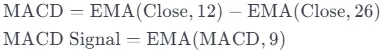

Hareketli Ortalama Yakınsama Uzaksama (MACD), iki üstel hareketli ortalama (EMA) arasındaki fark olarak hesaplanır ve piyasa momentumu ve potansiyel trend değişiklikleri için bir gösterge sağlar.

MACD trend teyitinde etkili olsa da, Awesome Osilatör anlık fiyat değişikliklerine daha hızlı yanıt verebilir. Bunları birleştiren bir tüccar, trend yönü için MACD'yi ve kesin giriş ve çıkış noktaları için Awesome Indicator kullanabilir."

Awesome Indicator, kısa vadede piyasa momentumunu yakalama yeteneğiyle bilinirken, MACD genellikle uzun vadeli trend yönünü ve momentum değişikliklerini belirlemek için kullanılır.

[*********************100%%**********************]  1 of 1 completed

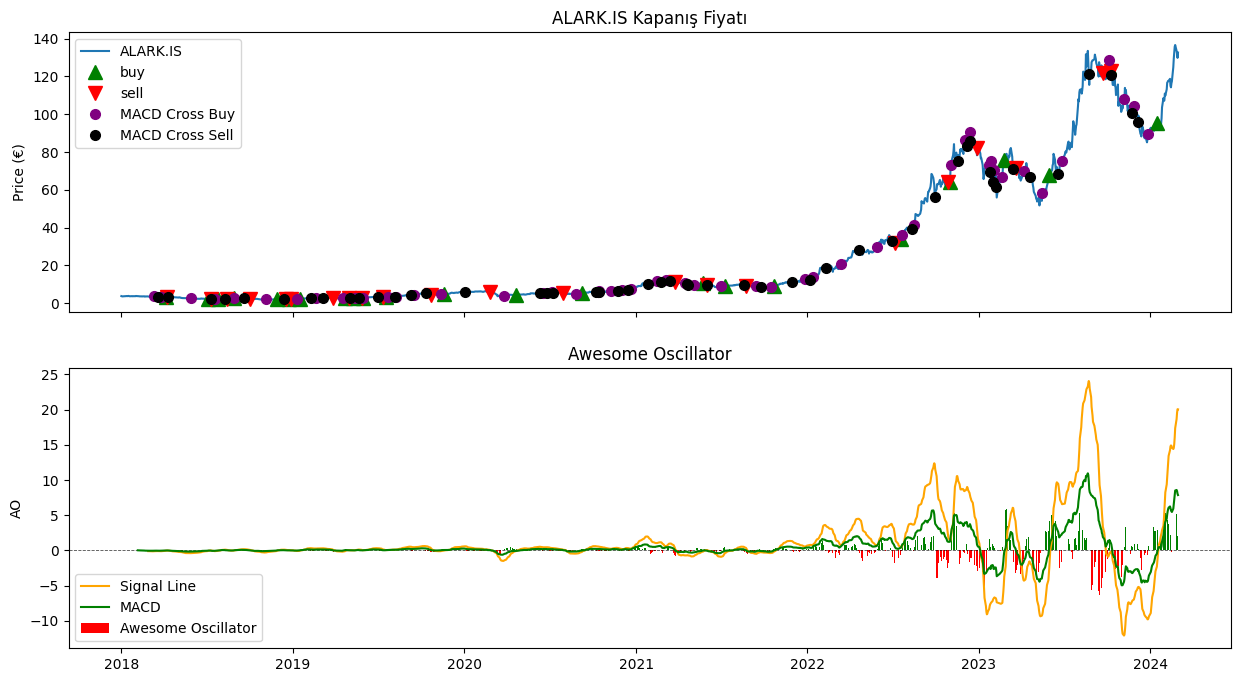

In [13]:
import yfinance as yf
import ta
import matplotlib.pyplot as plt
import numpy as np

def download_stock_data(tickers, start_date, end_date):
    """data."""
    return yf.download(tickers, start=start_date, end=end_date)

def calculate_indicators(data):
    """gösterge hesaplama."""
    # Awesome Oscillator
    data['ao'] = ta.momentum.AwesomeOscillatorIndicator(data['High'], data['Low']).awesome_oscillator()
    data['signal_line'] = ta.trend.ema_indicator(data['ao'], window=9)

    # MACD
    macd_indicator = ta.trend.MACD(data['Close'])
    data['macd'] = macd_indicator.macd()
    data['macd_signal'] = macd_indicator.macd_signal()

    return data

def generate_ao_signals(data):
    """ Awesome Oscillator için trading sinyalleri üretme."""
    data['zero_cross'] = np.where((data['ao'].shift(1) < 0) & (data['ao'] > 0), True,
                                  np.where((data['ao'].shift(1) > 0) & (data['ao'] < 0), False, np.NaN))
    return data

def generate_macd_signals(data):
    """MACD için trading sinyalleri üretme."""
    data['macd_cross'] = np.where((data['macd'].shift(1) < data['macd_signal'].shift(1)) & (data['macd'] > data['macd_signal']), True,
                                  np.where((data['macd'].shift(1) > data['macd_signal'].shift(1)) & (data['macd'] < data['macd_signal']), False, np.NaN))
    return data

def plot_data(data, ticker):
    """Hisse Fiyatı ve göstergeler görselleştirme."""
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 8))

    # hisse fiyatı ve indikatörleri gösterme
    ax1.plot(data.index, data['Close'], label=ticker)
    buy_signals = data[data['zero_cross'] == True]
    sell_signals = data[data['zero_cross'] == False]
    ax1.plot(buy_signals.index, data.loc[buy_signals.index]['Close'], '^', markersize=10, color='g', label='buy')
    ax1.plot(sell_signals.index, data.loc[sell_signals.index]['Close'], 'v', markersize=10, color='r', label='sell')

    macd_cross_buy = data[data['macd_cross'] == True]
    macd_cross_sell = data[data['macd_cross'] == False]
    ax1.plot(macd_cross_buy.index, data.loc[macd_cross_buy.index]['Close'], 'o', markersize=7, color='purple', label='MACD Cross Buy')
    ax1.plot(macd_cross_sell.index, data.loc[macd_cross_sell.index]['Close'], 'o', markersize=7, color='black', label='MACD Cross Sell')
    ax1.set_title(f'{tickers} Kapanış Fiyatı')
    ax1.set_ylabel('Price (€)')
    ax1.legend(loc='upper left')

    # Awesome Oscillator histogram görseli
    ax2.bar(data.index, data['ao'] - data['signal_line'], color=['g' if data['ao'].iloc[i] > data['signal_line'].iloc[i] else 'r' for i in range(len(data))], label='Awesome Oscillator')
    ax2.axhline(0, color='black', linewidth=0.6, linestyle='--', alpha=0.7)
    ax2.set_title('Awesome Oscillator')
    ax2.set_ylabel('AO')
    ax2.plot(data.index, data['signal_line'], label='Signal Line', color='orange')
    ax2.plot(data.index, data['macd'], label='MACD', color='green')
    ax2.legend(loc='best')

    plt.show()


ticker = tickers
start_date = start_date
end_date = end_date
data = download_stock_data(ticker, start_date,end_date)
data = calculate_indicators(data)
data = generate_ao_signals(data)
data = generate_macd_signals(data)
plot_data(data, tickers)

Three Way Average Cross Over

Bu strateji kısa, orta ve uzun vadeli hareketli ortalamaların kullanılmasını içerir. Kısa kesişimler orta ve uzun ortalamaların üzerine çıktığında yükseliş sinyali üretilirken, aşağı yönlü kesişimlerde düşüş sinyali oluşur.
Dengeli bir yaklaşım için yatırımcılar 15 günlük, 50 günlük ve 100 günlük hareketli ortalamaların bir kombinasyonunu kullanabilir ve bunları varlığın volatilitesine ve yatırımcının zaman dilimine göre ayarlayabilir.

En iyi Parametreler: MA1 = 3 MA2 = 4 MA3 = 5
En İyi Toplam Net Kar: 279.9833005573736
Trade Başına en iyi Net Kar: 1.739026711536482


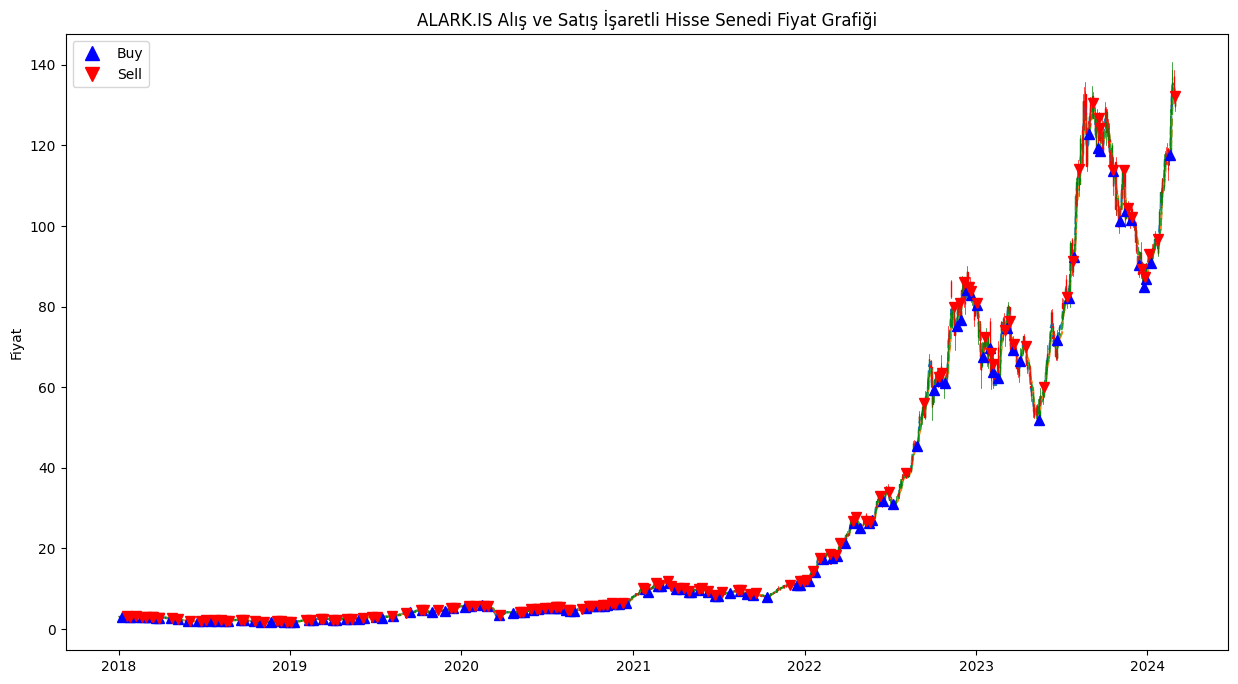

In [14]:
import matplotlib.lines as mlines
import yfinance as yf
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd

# Sbaşlangış bitiş 
start_date = start_date
end_date = end_date
symbol = tickers

def moving_average_strategy(df, ma1, ma2, ma3):
    # MA hesaplama
    ma_short = df['Close'].rolling(window=ma1).mean()
    ma_mid = df['Close'].rolling(window=ma2).mean()
    ma_long = df['Close'].rolling(window=ma3).mean()

    # crossları tespit etme
    cross_buy = ((ma_short > ma_long) & (ma_mid > ma_long)) & ((ma_short.shift() < ma_long.shift()) | (ma_mid.shift() < ma_long.shift()))
    cross_sell = (ma_short < ma_mid) | (ma_short < ma_long)

    first_buy_signal = False
    signals = pd.DataFrame(columns=['Type', 'Date', 'Price'])

    for date, row in df.iterrows():
        if cross_buy.loc[date] and not first_buy_signal:
            first_buy_signal = True
            new_signal = pd.DataFrame({'Type': ['Buy'], 'Date': [date], 'Price': [row['Low']]})
            signals = pd.concat([signals, new_signal], ignore_index=True)
        elif cross_sell.loc[date] and first_buy_signal:
            first_buy_signal = False
            new_signal = pd.DataFrame({'Type': ['Sell'], 'Date': [date], 'Price': [row['High']]})
            signals = pd.concat([signals, new_signal], ignore_index=True)

    signals.reset_index(drop=True, inplace=True)

        # her trade için getiri hesaplama
    signals['Returns'] = np.nan

    for i in range(0, len(signals) - 1, 2):
        buy_price = signals.iloc[i]['Price']
        sell_price = signals.iloc[i + 1]['Price']
        signals.iloc[i + 1, signals.columns.get_loc('Returns')] = sell_price - buy_price

    # Metrikleri hesaplama
    total_net_profit = signals['Returns'].sum()
    losing_trade_sum = abs(signals[signals['Returns'] < 0]['Returns'].sum())
    profit_factor = signals[signals['Returns'] > 0]['Returns'].sum() / losing_trade_sum if losing_trade_sum != 0 else np.inf
    percent_profitable = len(signals[signals['Returns'] > 0]) / (len(signals) / 2) * 100
    average_trade_net_profit = signals['Returns'].mean()
    drawdown = (signals['Price'].cummax() - signals['Price']).max()

    return total_net_profit, average_trade_net_profit


# tarihsel data alma
stock_ohlc = yf.Ticker(symbol)
df = stock_ohlc.history(start=start_date, end=end_date)

# MA parametre aralığını belirleme
ma1_range = range(3, 21)
ma2_range = range(3, 21)
ma3_range = range(3, 21)

# en yii parametreler ve bunların metriklerini belirleme
best_params = (0, 0, 0)
best_total_net_profit = -np.inf
best_net_profit_per_trade = -np.inf

# en iyi paratmetre tahmini için grid search CV
for ma1 in ma1_range:
    for ma2 in ma2_range:
        for ma3 in ma3_range:
            if ma1 != ma2 and ma1 != ma3 and ma2 != ma3:
                total_net_profit, net_profit_per_trade = moving_average_strategy(df, ma1, ma2, ma3)

                if total_net_profit > best_total_net_profit and net_profit_per_trade > best_net_profit_per_trade:
                    best_params = (ma1, ma2, ma3)
                    best_total_net_profit = total_net_profit
                    best_net_profit_per_trade = net_profit_per_trade

print("En iyi Parametreler: MA1 =", best_params[0], "MA2 =", best_params[1], "MA3 =", best_params[2])
print("En İyi Toplam Net Kar:", best_total_net_profit)
print("Trade Başına en iyi Net Kar:", best_net_profit_per_trade)


def major_date_formatter(x, pos=None):
    dt = mdates.num2date(x)
    if dt.day == 1:
        return f'{dt.strftime("%b")} {dt.year}'
    return ''

def minor_date_formatter(x, pos=None):
    dt = mdates.num2date(x)
    if dt.day == 1:
        return f'{dt.day}\n\n{dt.strftime("%b")} {dt.year}' if dt.month == 1 else f'{dt.day}\n\n{dt.strftime("%b")}'
    return f'{dt.day}'


# ticker bilgilerini yfinance den elde etme
stock_ohlc = yf.Ticker(symbol)
df = stock_ohlc.history(start=start_date, end=end_date)

ma_1_window = 3
ma_2_window = 6
ma_3_window = 5


# MS hesaplama
ma_1 = df['Close'].rolling(window=ma_1_window).mean()
ma_2 = df['Close'].rolling(window=ma_2_window).mean()
ma_3 = df['Close'].rolling(window=ma_3_window).mean()

# MA ların nerede keşitiğini bulma
cross_buy = ((ma_1 > ma_3) & (ma_2 > ma_3)) & ((ma_1.shift() < ma_3.shift()) | (ma_2.shift() < ma_3.shift()))
cross_sell = (ma_1 < ma_2) | (ma_1 < ma_3)

# tarihi matplotlib formatında yaz
df['Date'] = mdates.date2num(df.index)

# görsel yaratma
fig, ax = plt.subplots(figsize=(15, 8))

#MA görselleri
ax.plot(df.index, ma_1, color='tab:blue', label='{0}-day MA'.format(ma_1_window), linestyle='--')
ax.plot(df.index, ma_2, color='tab:orange', label='{0}-day MA'.format(ma_2_window), linestyle='--')
ax.plot(df.index, ma_3, color='tab:green', label='{0}-day MA'.format(ma_3_window), linestyle='--')

# candlesticks görselleri
candlestick_ohlc(ax, df[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.6, colorup='green', colordown='red')

# alım satmım sinyal işaretleri
buy_marker = mlines.Line2D([], [], color='blue', marker='^', linestyle='None', markersize=10, label='Buy')
sell_marker = mlines.Line2D([], [], color='red', marker='v', linestyle='None', markersize=10, label='Sell')

# alım satım sinyal bayraklarını başlatma
first_buy_signal = False
buy_dates, buy_prices, sell_dates, sell_prices = [], [], [], []

#alım satım sinyal bayraklarının fiyat ve günlerini kayıt etme
for date, row in df.iterrows():
    if cross_buy.loc[date] and not first_buy_signal:
        first_buy_signal = True
        buy_dates.append(date)
        buy_prices.append(row['Low'])
    elif cross_sell.loc[date] and first_buy_signal:
        first_buy_signal = False
        sell_dates.append(date)
        sell_prices.append(row['High'])

# alım satım işaretlerini görselleştirme
ax.plot(buy_dates, buy_prices, '^', markersize=7, color='blue', label='Buy')
ax.plot(sell_dates, sell_prices, 'v', markersize=7, color='red', label='Sell')

# legend and title
ax.legend(handles=[buy_marker, sell_marker])
ax.set_title(symbol + ' Alış ve Satış İşaretli Hisse Senedi Fiyat Grafiği')

# y-axis label
ax.set_ylabel('Fiyat')

plt.show()

#15:32 Dk da çözüyor

Trend Exhaustion

Trendin tükenmesi, mevcut trendin zayıfladığını ve tersine dönebileceğini gösterir. Genellikle momentum göstergelerindeki veya hacim analizindeki farklılıklar yoluyla tanımlanır.
RSI'daki farklılıklar veya yükseliş trendlerindeki hacmin azalması gibi tükenme işaretleri ortaya çıktığında, yatırımcılar potansiyel bir trend tersine dönüşüne hazırlanmak için zararı durdurmayı veya kar almayı düşünmelidir.

[*********************100%%**********************]  1 of 1 completed

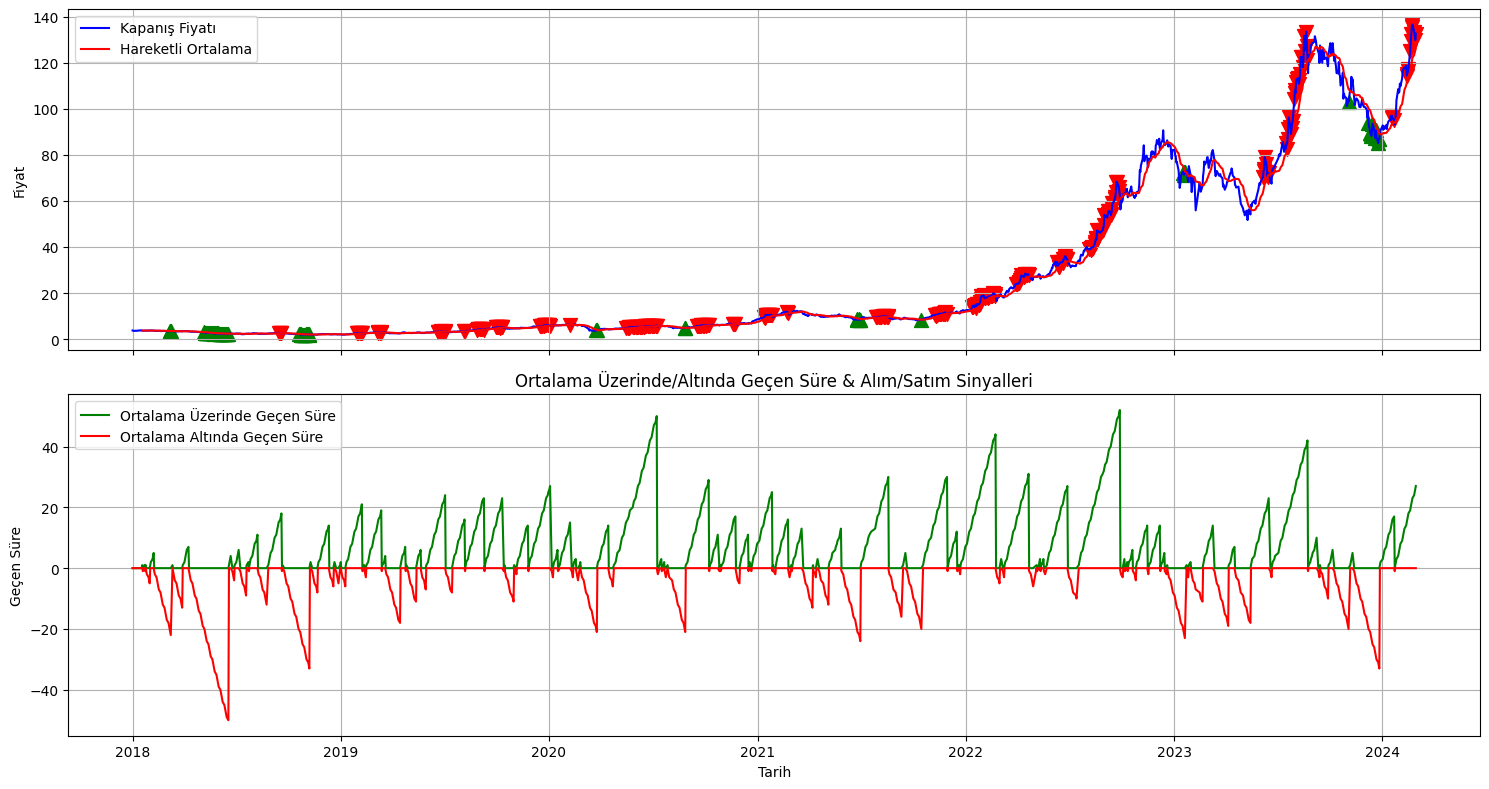

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def time_spent_above_below_mean(data, lookback, buy_threshold, sell_threshold):
    # MA hesaplama
    ma = data['Close'].rolling(window=lookback).mean()

    # Ortalama üzerinde harcanan zaman  
    above_mean = np.where(data['Close'] > ma, 1, 0)
    for i in range(1, len(above_mean)):
        if above_mean[i] == 1:
            above_mean[i] += above_mean[i-1]

    # Ortalama Altında harcanan zaman
    below_mean = np.where(data['Close'] < ma, -1, 0)
    for i in range(1, len(below_mean)):
        if below_mean[i] == -1:
            below_mean[i] += below_mean[i-1]

    # Sinyallerin oluşturulması
    signals = pd.Series(0, index=data.index)
    signals[below_mean <= sell_threshold] = 1  # ALım Sinyali
    signals[above_mean >= buy_threshold] = -1  # Satım Sinyali

    return pd.DataFrame({
        'Close': data['Close'],
        'ma': ma,
        'above_mean': pd.Series(above_mean, index=data.index),
        'below_mean': pd.Series(below_mean, index=data.index),
        'signals': signals
    })

def plot_data(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
    
    ax1.plot(df['Close'], label='Kapanış Fiyatı', color='blue')
    ax1.plot(df['ma'], label='Hareketli Ortalama', color='red')
    ax1.scatter(df.index, df['Close'].where(df['signals']==1), color='green', marker='^', alpha=1, s =100)
    ax1.scatter(df.index, df['Close'].where(df['signals']==-1), color='red', marker='v', alpha=1, s = 100)
    ax1.legend(loc='upper left')
    ax1.set_ylabel('Fiyat')
    ax1.grid(True)

    ax2.plot(df['above_mean'], label='Ortalama Üzerinde Geçen Süre', color='green')
    ax2.plot(df['below_mean'], label='Ortalama Altında Geçen Süre', color='red')
    ax2.legend(loc='upper left')
    ax2.set_xlabel('Tarih')
    ax2.set_ylabel('Geçen Süre')
    ax2.grid(True)

    plt.title('Ortalama Üzerinde/Altında Geçen Süre & Alım/Satım Sinyalleri')
    plt.tight_layout()
    plt.show()

lookback_period = 14  # Lookback period tanımlanmalıo
buy_threshold = 15  # Satım Eşiği Tanımlanmalı (Ortalama Üzerinde harcanan zaman)
sell_threshold = -20  # Alım Eşiği Tanımlanmalı here (Ortalama Altında harcanan zaman)

# Ticker
ticker = tickers

# Download historical data
data = yf.download(tickers, start=start_date, end=end_date)
data = data[['Close']]  

df = time_spent_above_below_mean(data, lookback_period, buy_threshold, sell_threshold)
plot_data(df)

Aroon Oscillator

Aroon Yukarı ve Aşağı göstergelerinden türetilen Aroon Osilatörü, yeni trendlerin başlangıcını ve güçlerini belirlemeye yardımcı olur. Bunu, belirli bir süre boyunca en yüksek ve en düşük seviyeler arasında geçen süreyi hesaplayarak yapar.

Aroon Osilatörü değerinin yüksek olması güçlü bir yükseliş eğilimini, düşük bir değer ise güçlü bir düşüş eğilimini gösterir. Örneğin, +50'nin üzerindeki değerler güçlü bir yükseliş eğilimine işaret ederken -50'nin altındaki değerler güçlü bir düşüş eğilimine işaret eder.

[*********************100%%**********************]  1 of 1 completed

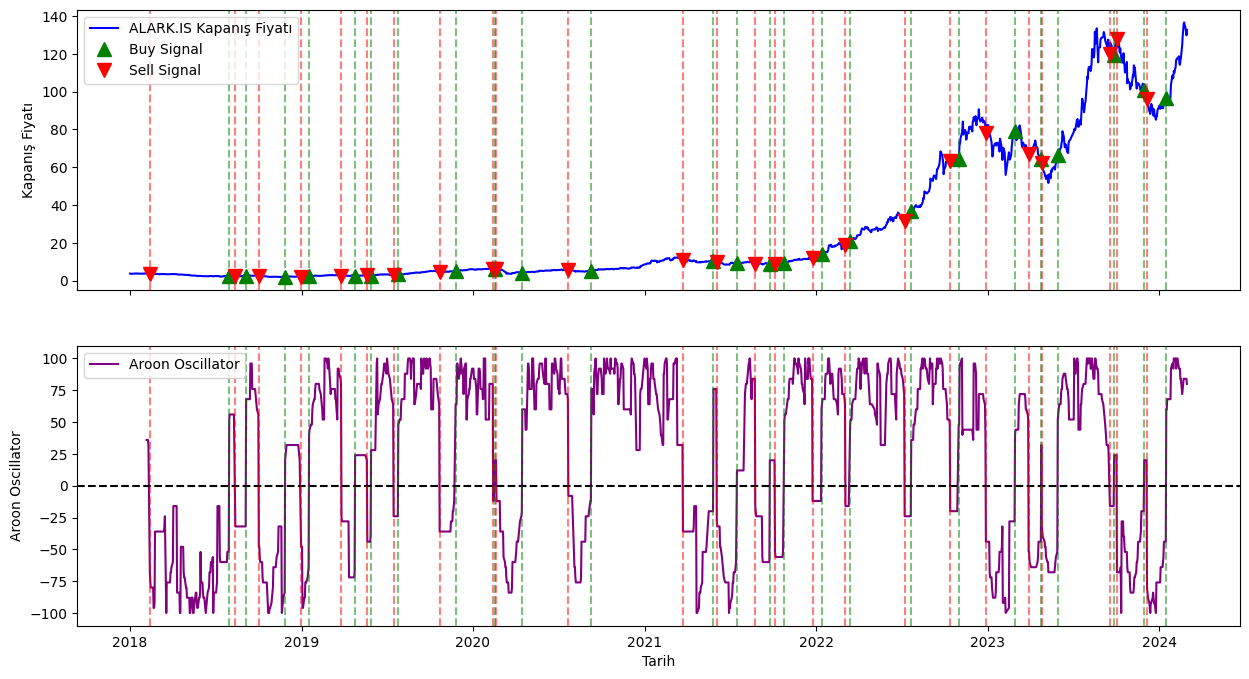

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def aroon_oscillator(data, period=25):
    aroon_up = 100 * (data['High'].rolling(period + 1).apply(np.argmax, raw=True) / period)
    aroon_down = 100 * (data['Low'].rolling(period + 1).apply(np.argmin, raw=True) / period)
    aroon_osc = aroon_up - aroon_down
    return aroon_osc

def plot_aroon(data, aroon_osc, buy_signals, sell_signals):
    fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 8), sharex=True)
    
    ax1.plot(data.index, data['Close'], label=f'{tickers} Kapanış Fiyatı', color='blue')
    ax1.plot(data.index[buy_signals], data.loc[buy_signals]['Close'], '^', markersize=10, color='g', label='Buy Signal')
    ax1.plot(data.index[sell_signals], data.loc[sell_signals]['Close'], 'v', markersize=10, color='r', label='Sell Signal')
    ax1.set_ylabel("Kapanış Fiyatı")
    ax1.legend()
    
    ax2.plot(data.index, aroon_osc, label='Aroon Oscillator', color='purple')
    ax2.axhline(0, linestyle='--', color='black')
    ax2.set_xlabel("Tarih")
    ax2.set_ylabel("Aroon Oscillator")
    ax2.legend()
    
    for signal_date in data.index[buy_signals]:
        ax1.axvline(signal_date, color='g', linestyle='--', alpha=0.5)
        ax2.axvline(signal_date, color='g', linestyle='--', alpha=0.5)
    
    for signal_date in data.index[sell_signals]:
        ax1.axvline(signal_date, color='r', linestyle='--', alpha=0.5)
        ax2.axvline(signal_date, color='r', linestyle='--', alpha=0.5)
    
    plt.show()

# Fetch stock data from Yahoo Finance
ticker = tickers
start_date = start_date
end_date = end_date

data = yf.download(ticker, start=start_date, end=end_date)

# Calculate the Aroon Oscillator
aroon_osc = aroon_oscillator(data)

# Generate buy/sell signals
buy_signals = (aroon_osc > 0) & (aroon_osc.shift(1) <= 0)
sell_signals = (aroon_osc < 0) & (aroon_osc.shift(1) >= 0)

# Plot the Aroon Oscillator and buy/sell signals
plot_aroon(data, aroon_osc, buy_signals, sell_signals)

Demarker Indicator

DeMarker Göstergesi, fiyatların tükenme noktalarındaki potansiyel alım veya satım fırsatlarını belirlemek için tasarlanmıştır ve genellikle piyasanın en yüksek ve en düşük seviyelerine işaret eder. Belirli bir dönemdeki yüksek ve düşük fiyat taleplerine göre hesaplanır. DeMarker Göstergesinin formülü aşağıdaki gibidir:

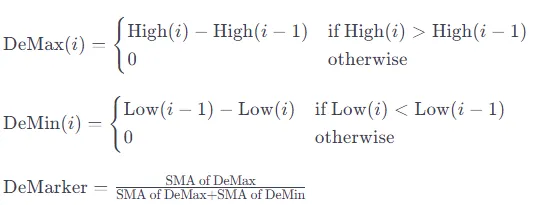

DeMarker Göstergesi, ardışık en yüksek ve en düşük seviyeleri karşılaştırarak fiyat trendlerindeki potansiyel tükenmeyi tespit ederek piyasanın en uç noktalarındaki alım ve satım fırsatlarını belirlemeyi amaçlamaktadır.

Yüksek(i) ve Düşük(i) sırasıyla cari dönemdeki en yüksek ve en düşük fiyatlardır.
DeMaxSMA'nın SMA'sı ve DeMinSMA'nın SMA'sı, sırasıyla DeMax ve DeMin'in 'n' dönemleri boyunca basit hareketli ortalamalarıdır.

Demarker değeri 0,7'nin üzerine çıktığında bu genellikle piyasanın aşırı alım durumunu gösterir ve satış anlamına gelir. Tersine, 0,3'ün altına bir düşüş, piyasada aşırı satım sinyali verebilir ve bu da bir satın alma fırsatına işaret edebilir. Yatırımcılar bu eşikleri, trend analiziyle birlikte giriş ve çıkış noktalarına ince ayar yapmak için kullanabilirler.

[*********************100%%**********************]  1 of 1 completed


C:\Users\alp\AppData\Local\Temp\ipykernel_44548\264388233.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DeMin'][i] = data['Close'][i - 1] - data['Close'][i]
C:\Users\alp\AppData\Local\Temp\ipykernel_44548\264388233.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DeMax'][i] = data['Close'][i] - data['Close'][i - 1]


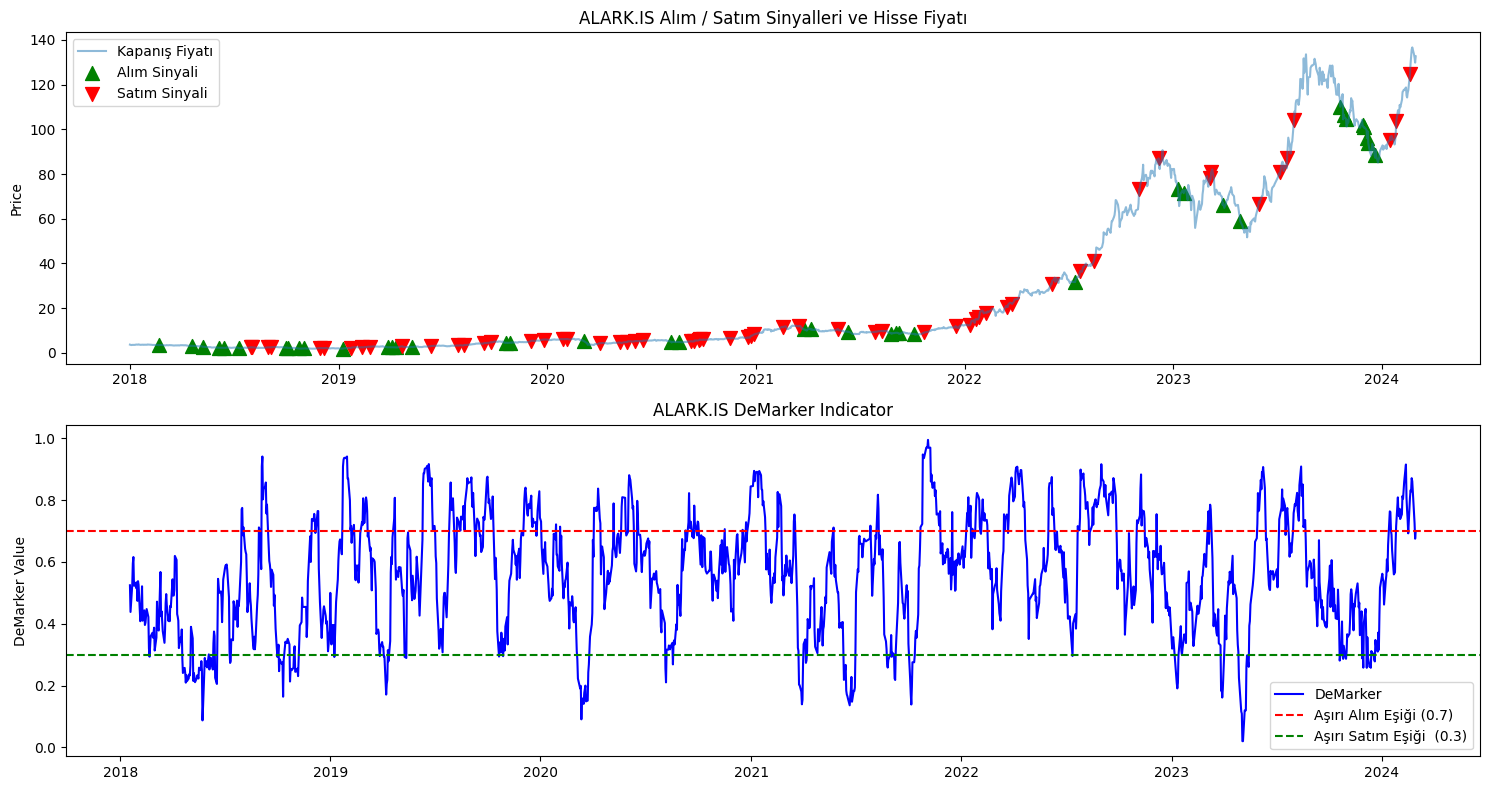

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
stock_symbol=tickers
def calculate_demarker(data, period=window_size):
    data['DeMax'] = 0
    data['DeMin'] = 0

    for i in range(1, len(data)):
        if data['Close'][i] > data['Close'][i - 1]:
            data['DeMax'][i] = data['Close'][i] - data['Close'][i - 1]
        elif data['Close'][i] < data['Close'][i - 1]:
            data['DeMin'][i] = data['Close'][i - 1] - data['Close'][i]

    data['DeMM'] = data['DeMax'].rolling(window=period).mean()
    data['DeMn'] = data['DeMin'].rolling(window=period).mean()

    data['DeM'] = data['DeMM'] / (data['DeMM'] + data['DeMn'])
    return data

def plot_stock_with_demarker(stock_symbol, start_date, end_date, period=14):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data = calculate_demarker(data, period)

    # Alım / Satım Sinyali Üretme
    data['Buy_Signal'] = (data['DeM'] < 0.3) & (data['DeM'].shift(1) >= 0.3)
    data['Sell_Signal'] = (data['DeM'] > 0.7) & (data['DeM'].shift(1) <= 0.7)

    # Görselliştirme
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

    # Alım / Satım Sinyalleri ve Hisse Fiyatı
    ax1.plot(data['Close'], label='Kapanış Fiyatı', alpha=0.5)
    ax1.scatter(data.index[data['Buy_Signal']], data['Close'][data['Buy_Signal']], label='Alım Sinyali', marker='^', color='green', s=100)
    ax1.scatter(data.index[data['Sell_Signal']], data['Close'][data['Sell_Signal']], label='Satım Sinyali', marker='v', color='red', s=100)
    ax1.set_title(f'{stock_symbol} Alım / Satım Sinyalleri ve Hisse Fiyatı')
    ax1.set_ylabel('Price')
    ax1.legend()

    # DeMarker Indicator
    ax2.plot(data['DeM'], label='DeMarker', color='blue')
    ax2.axhline(0.7, color='red', linestyle='--', label='Aşırı Alım Eşiği (0.7)')
    ax2.axhline(0.3, color='green', linestyle='--', label='Aşırı Satım Eşiği  (0.3)')
    ax2.set_title(f'{stock_symbol} DeMarker Indicator')
    ax2.set_ylabel('DeMarker Value')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_stock_with_demarker(tickers, start_date, end_date)

Relative Vigor Index (RVI)

Göreceli Güç Endeksi (RVI), bir dönem içindeki kapanış fiyatını açılış fiyatıyla karşılaştırarak bir trendin gücünü ölçen teknik bir göstergedir. RVI'nın hesaplanması, güçlü bir yükseliş eğiliminde fiyatların dönemin en yüksek seviyesine yakın kapanma eğiliminde olduğu ve güçlü bir düşüş eğiliminde ise fiyatların en düşük seviyesine yakın kapanma eğiliminde olduğu fikrine odaklanmıştır. RVI formülü aşağıdaki gibidir:

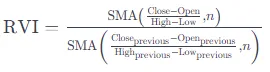

Göreceli Güç Endeksi (RVI), hakim eğilimin gücünü değerlendirmek ve olası devam veya geri dönüşleri tahmin etmek için bir dönem içindeki fiyat aralığına göre normalleştirilen kapanış ve açılış fiyatlarını karşılaştırır.

Kapanış, Açılış, Yüksek ve Düşük sırasıyla cari dönemin kapanış, açılış, yüksek ve düşük fiyatlarıdır.
n, SMA'nın (Basit Hareketli Ortalama) hesaplandığı dönemdir.
Yakınönceki, Açıkönceki, Yüksekönceki ve Düşükönceki önceki dönemin karşılık gelen fiyatlarıdır.



RVI genellikle bir geçişin potansiyel yükseliş veya düşüş momentumunu gösterebileceği bir sinyal çizgisiyle gösterilir. Trend onayı için diğer göstergelerle birlikte kullanılması en iyisidir. Örneğin, RVI'yı hareketli bir ortalamayla eşleştirmek, piyasa momentumunun daha kapsamlı bir görünümünü sağlayabilir.

[*********************100%%**********************]  1 of 1 completed

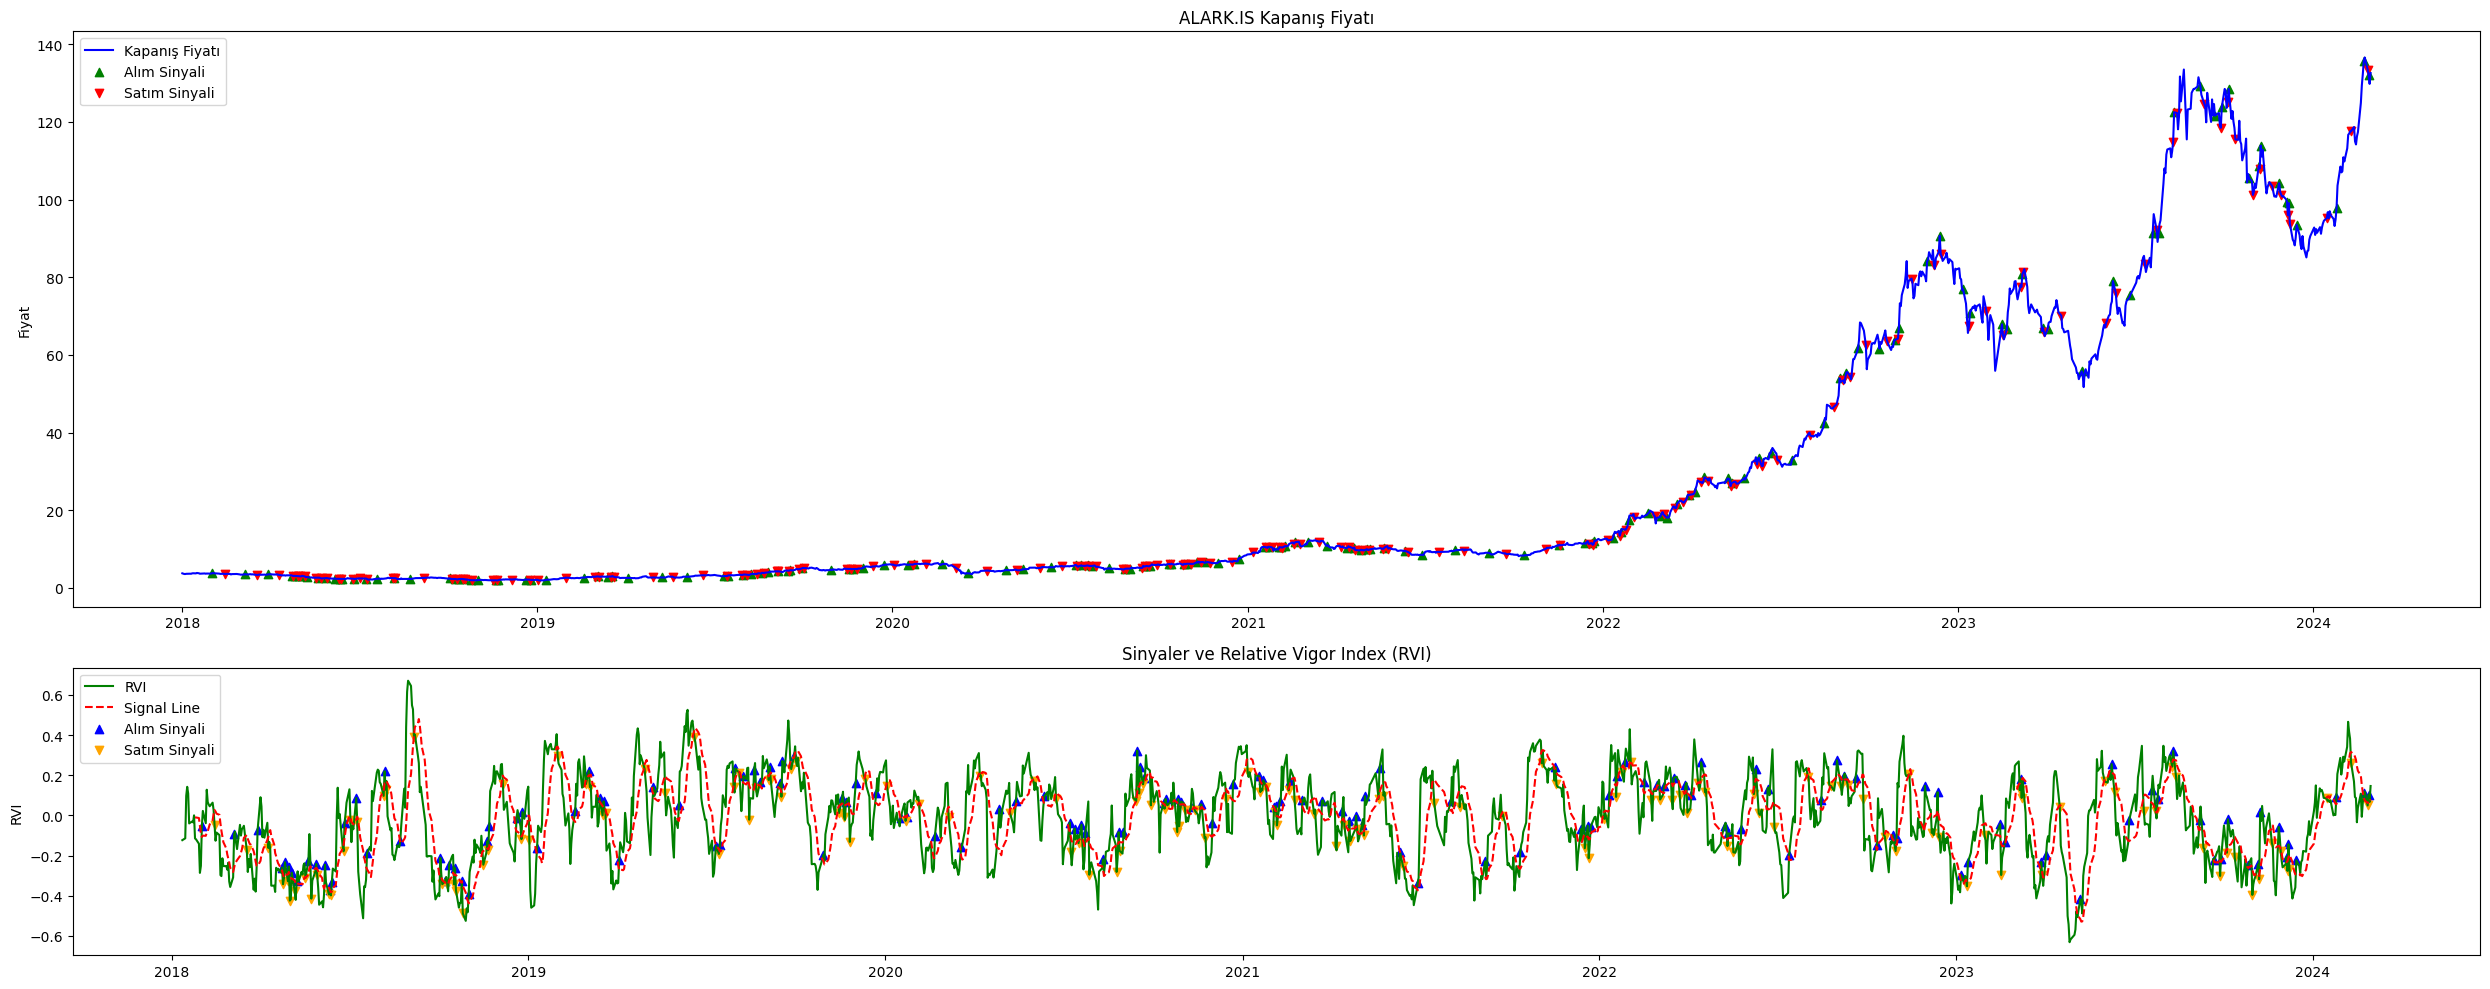

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_rvi(data, period=10):
    numerator = data['Close'] - data['Open']
    denominator = data['High'] - data['Low']
    data['RVI'] = (numerator.rolling(window=period).mean() / 
                   denominator.rolling(window=period).mean())
    data['RVI_Signal'] = data['RVI'].rolling(window=period).mean()
    return data

def generate_signals(data):
    data['Buy Signals'] = (data['RVI'] > data['RVI_Signal']) & (data['RVI'].shift(1) <= data['RVI_Signal'].shift(1))
    data['Sell Signals'] = (data['RVI'] < data['RVI_Signal']) & (data['RVI'].shift(1) >= data['RVI_Signal'].shift(1))
    return data

# Data Alımı
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# RVI hesaplama ve Sinyal Üretme
data = calculate_rvi(data)
data = generate_signals(data)

# Görselleştirme
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10), gridspec_kw={'height_ratios': [2, 1]})

# Hisse Fiyatı ve ALım/Satım Sinyalleri
ax1.plot(data['Close'], label='Kapanış Fiyatı', color='blue')
ax1.scatter(data.index[data['Buy Signals']], data['Close'][data['Buy Signals']], label='Alım Sinyali', marker='^', color='green', alpha=1)
ax1.scatter(data.index[data['Sell Signals']], data['Close'][data['Sell Signals']], label='Satım Sinyali', marker='v', color='red', alpha=1)
ax1.set_title(f'{tickers} Kapanış Fiyatı')
ax1.set_ylabel('Fiyat')
ax1.legend()

# Hisse Görseli ve ALım/Satım Sinyalleri
ax2.plot(data['RVI'], label='RVI', color='green')
ax2.plot(data['RVI_Signal'], label='Signal Line', color='red', linestyle='--')
ax2.scatter(data.index[data['Buy Signals']], data['RVI'][data['Buy Signals']], label='Alım Sinyali', marker='^', color='blue', alpha=1)
ax2.scatter(data.index[data['Sell Signals']], data['RVI'][data['Sell Signals']], label='Satım Sinyali', marker='v', color='orange', alpha=1)
ax2.set_title('Sinyaler ve Relative Vigor Index (RVI)')
ax2.set_ylabel('RVI')
ax2.legend()

plt.tight_layout()
plt.show()

Trend Onayı: Hareketli ortalamalar gibi teknik göstergeler piyasa trendlerini doğrular ve momentumdaki değişiklikleri işaret ederek işlemlere girme veya çıkma kararına yardımcı olabilir.
Momentum Ölçümü: Owesome Osilatör gibi göstergeler fiyat değişikliklerinin hızını ölçerek fiyat eğilimlerindeki devam veya tersine dönüşlerin tahmin edilmesine yardımcı olur.
Piyasa Duyarlılığı: RVI gibi araçlar, alım veya satım baskısını değerlendirerek piyasa duyarlılığı ve potansiyel dönüm noktaları hakkında bilgi sağlar.
Aşırı Alım/Aşırı Satış Tespiti: DeMarker gibi göstergeler, yaklaşmakta olan geri dönüşlere veya devamlara işaret edebilecek aşırı fiyat koşullarını vurgulamaktadır.

RSI, 


0 ile 100 arasında salınan, fiyat hareketlerinin hızını ve değişimini ölçen bir momentum osilatörüdür. Belirli bir süre (genellikle 14 gün) boyunca ortalama kazançların ortalama kayıplara oranı temel alınarak hesaplanır. RSI'nın formülü şu şekildedir:


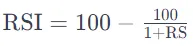

RSI Formülü: Bir varlığın fiyatındaki aşırı alım veya aşırı satış koşullarını belirlemek için son fiyat değişikliklerinin büyüklüğünü değerlendiren bir momentum osilatörü.

Burada RS, belirtilen zaman dilimi sırasındaki çalışma dönemlerinin ortalama kazancının, çalışmama dönemlerinin ortalama kaybına bölümüdür.

RSI'nin aşırı alım ve aşırı satım koşullarını tespit etme yeteneği, potansiyel dönüş noktalarını tahmin etmede stratejik bir avantaj sağlar. Ancak sıklıkla gözden kaçırılan önemli bir anlayış, RSI ile fiyat arasındaki farklılık kavramıdır.

Bir varlığın fiyatı, RSI tarafından yansıtılmayan yeni bir yüksek veya düşük seviyeye ulaştığında, bu mevcut trendin zayıfladığına ve olası bir tersine dönüşe işaret eder. Bu farklılık, fiyat hareketi ile momentum arasındaki temel farklılığı yansıttığı için tek başına RSI değerinden daha güvenilir bir gösterge olarak hizmet edebilir.

Farklılıkları tespit ederek, tüccarlar trendin tersine döneceğini kalabalığın önünde tahmin edebilir ve bu da piyasa hareketlerini önceden tahmin ederek bilinçli trade kararları vermek için değerli bir araç sağlar.



[*********************100%%**********************]  1 of 1 completed

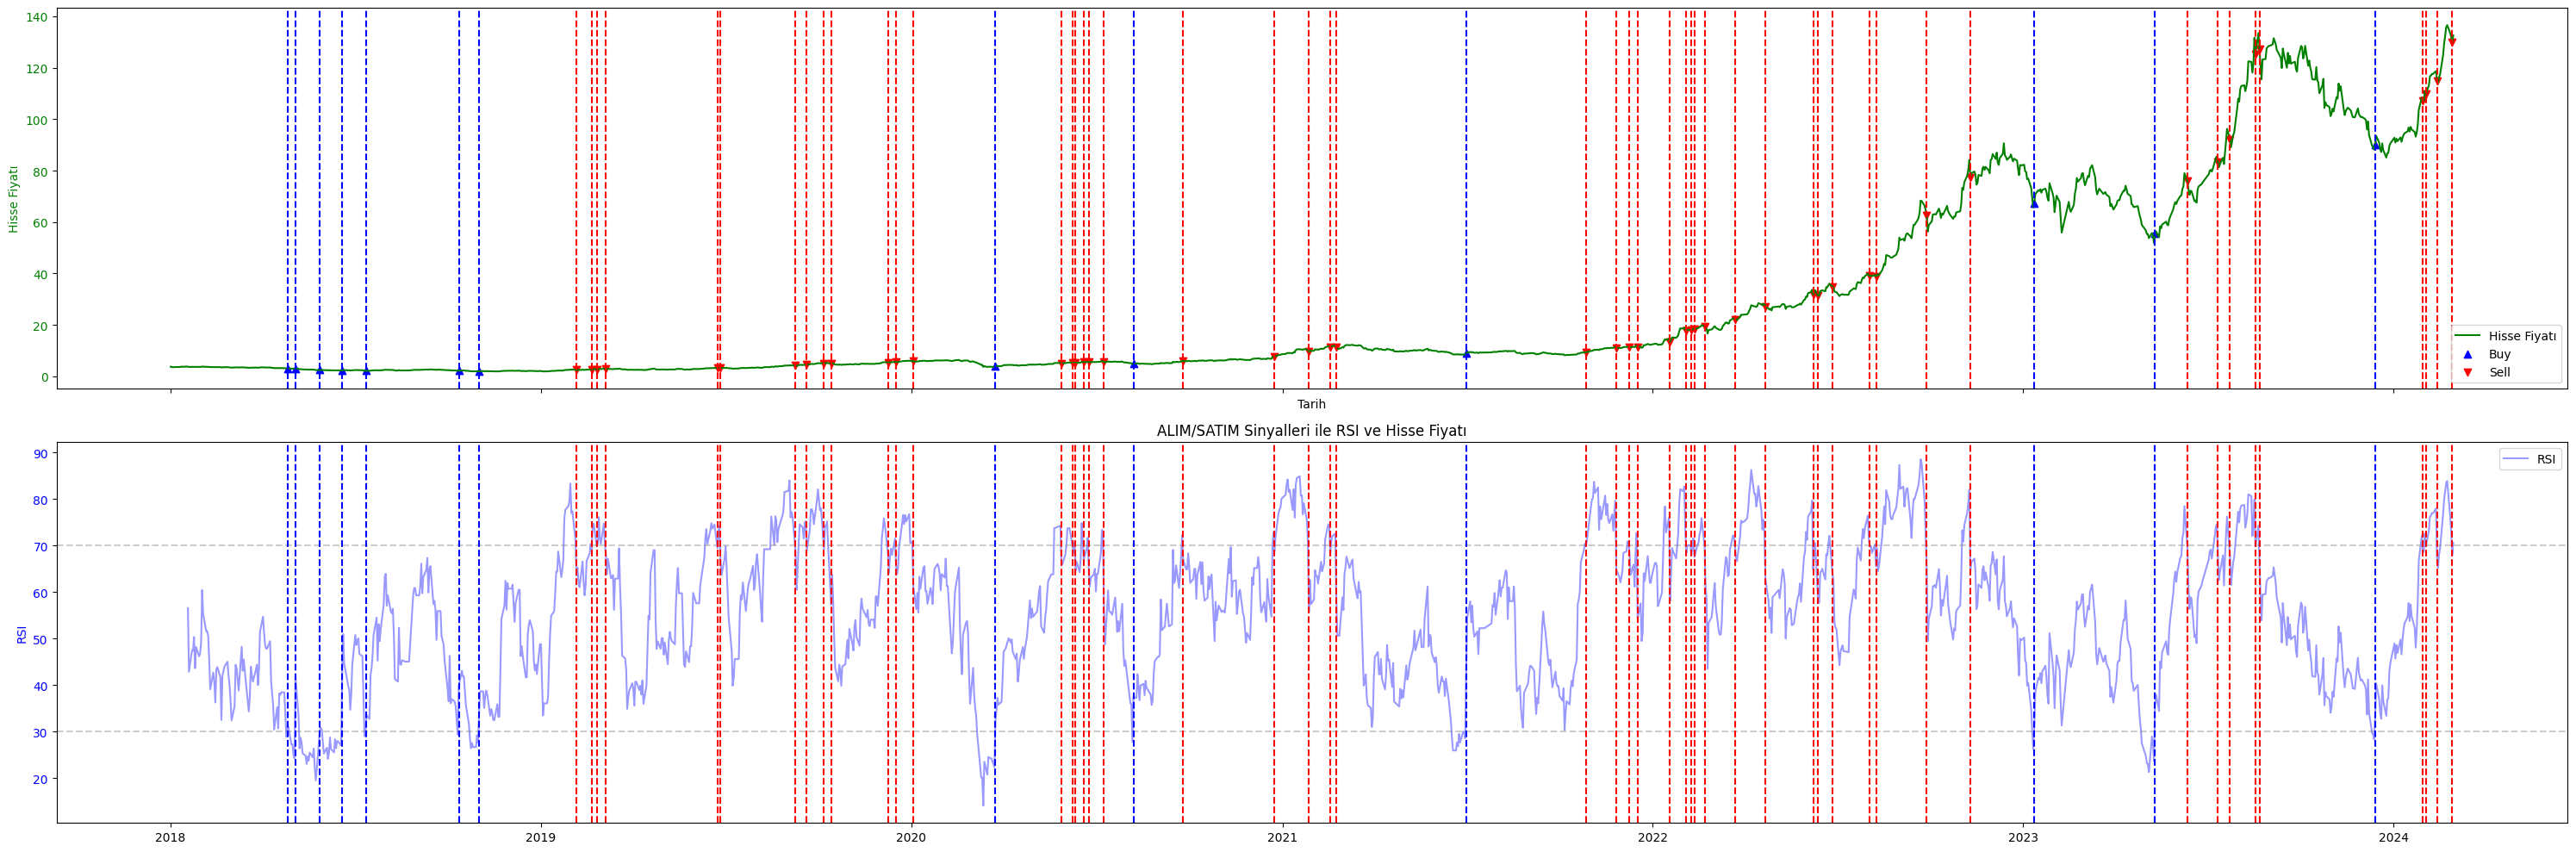

In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data

def plot_rsi(dates, prices, rsi):
    buy_signals = (rsi.shift(1) <= 30) & (rsi > 30)
    sell_signals = (rsi.shift(1) >= 70) & (rsi < 70)

    fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(30, 10), sharex=True)

    ax1.set_ylabel('RSI', color='b')
    ax1.plot(dates, rsi, color='b', label='RSI', alpha=0.4)
    ax1.axhline(30, color='gray', linestyle='--', alpha=0.4)
    ax1.axhline(70, color='gray', linestyle='--', alpha=0.4)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.legend(loc='upper right')

    # RSI grafiğine ALIM sinyalleri için dikey çizgiler ekleme
    for date in dates[buy_signals]:
        ax1.axvline(date, color='b', linestyle='--', alpha=1)

    # RSI grafiğine SATIM sinyalleri için dikey çizgiler ekleme
    for date in dates[sell_signals]:
        ax1.axvline(date, color='r', linestyle='--', alpha=1)

    ax2.set_xlabel('Tarih')
    ax2.set_ylabel('Hisse Fiyatı', color='g')
    ax2.plot(dates, prices, color='g', label='Hisse Fiyatı')
    ax2.scatter(dates[buy_signals], prices[buy_signals], marker='^', color='b', label='Buy')
    ax2.scatter(dates[sell_signals], prices[sell_signals], marker='v', color='r', label='Sell')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.legend(loc='lower right')

    # Fİyat grafiğine ALIM sinyalleri için dikey çizgiler ekleme
    for date in dates[buy_signals]:
        ax2.axvline(date, color='b', linestyle='--', alpha=1)

    # Fİyat grafiğine SATIM sinyalleri için dikey çizgiler ekleme
    for date in dates[sell_signals]:
        ax2.axvline(date, color='r', linestyle='--', alpha=1)

    plt.title('ALIM/SATIM Sinyalleri ile RSI ve Hisse Fiyatı')
    plt.tight_layout()
    plt.show()

ticker = tickers
start_date = start_date
end_date = end_date

stock_data = fetch_stock_data(ticker, start_date, end_date)
prices = stock_data['Close']
rsi = RSIIndicator(prices).rsi()

plot_rsi(prices.index, prices, rsi)

Grafik, hisse senedi fiyatı hareketini ve RSI göstergesini gösterir; RSI 30'un (aşırı satış eşiği) üzerine geçtiğinde satın alma sinyallerini (mavi işaretleyiciler) ve 70'in (aşırı alım eşiği) altına geçtiğinde satış sinyallerini (kırmızı işaretleyiciler) vurgular. Bu görsel temsil, momentuma dayalı potansiyel giriş ve çıkış noktalarının belirlenmesine yardımcı olur

 Stochastic Oscillator
 
Stokastik Osilatör, bir menkul kıymetin belirli bir kapanış fiyatını belirli bir süre içindeki fiyat aralığıyla karşılaştıran bir momentum göstergesidir.

Osilatörün piyasa hareketlerine duyarlılığı, o zaman dilimini ayarlayarak veya sonucun hareketli ortalamasını alarak azaltılabilir. %K çizgisinin formülü şöyledir:

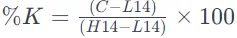

Stokastik Osilatör Formülü: Momentumu ve potansiyel fiyat dönüm noktalarını belirlemeyi amaçlayan, belirli bir dönemdeki yüksek-düşük aralığa göre kapanış fiyatının seviyesini ölçer.

C kapanış fiyatı, L14 son 14 dönemdeki en düşük fiyat, H14 ise aynı 14 dönemdeki en yüksek fiyattır. %D çizgisi tipik olarak %K çizgisinin 3 dönemlik hareketli ortalamasıdır.

Stokastik Osilatörün incelikli bir anlayışı, fiyatların en yüksek veya en düşük seviyelerine yakın kapandığı ve momentumun göstergesi olabilen piyasa koşullarını vurgulama yeteneğidir.

Daha da önemlisi, %K ve %D çizgileri ile fiyat arasındaki farklılıklar, potansiyel dönüşlerin güçlü bir sinyali olabilir. Örneğin, fiyat yeni bir zirveye ulaşırsa ancak osilatör yeni bir zirveye ulaşamazsa, bu durum momentum kaybının ve yaklaşmakta olan bir tersine dönüşün habercisi olabilir.

Fiyat ve momentum arasındaki bu farklılık, aşırı alım veya aşırı satım eşiklerinin yakınında meydana geldiğinde özellikle önemlidir. Yatırımcılar, bu farklılıklara ve %K ve %D'nin %50 seviyesine göre konumuna dikkat ederek trendin gücü ve devam etme veya tersine dönme olasılığı hakkında fikir sahibi olabilirler.

[*********************100%%**********************]  1 of 1 completed

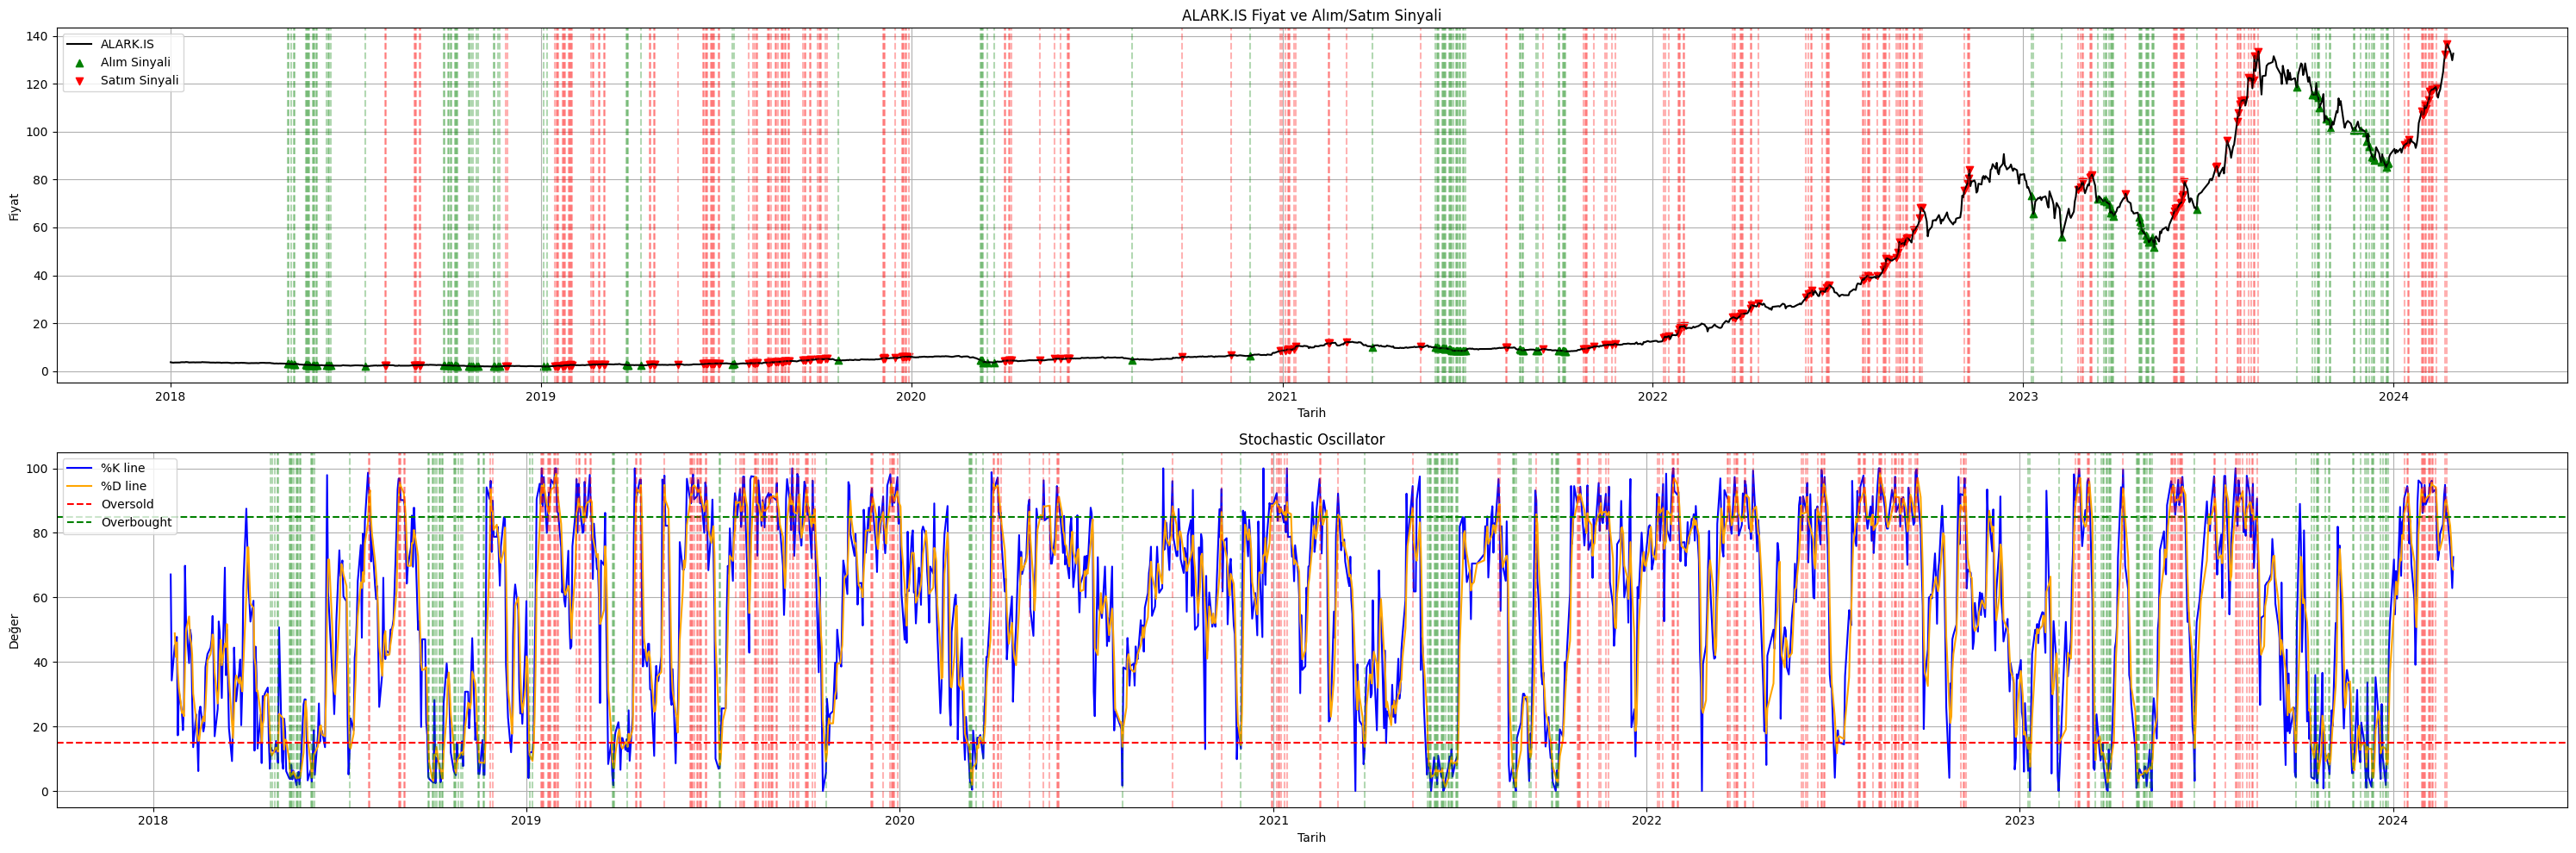

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Data Alımı
ticker = tickers
data = yf.download(tickers, start=start_date, end=end_date)

# SO Hesaplama
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14)*100/(high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

upper_threshold = 85
lower_threshold = 15

# Sinyal Üretimi
data['Buy_Signal'] = (data['%K'] < lower_threshold) & (data['%D'] < lower_threshold)
data['Sell_Signal'] = (data['%K'] > upper_threshold ) & (data['%D'] > upper_threshold )

# Görseller
fig, axs = plt.subplots(2, figsize=(30,10))

# Kapanış Fiyatı ve Alım / Satım Sinyalleri
axs[0].plot(data['Close'], label=tickers, color='black')
buy_signals = data[data['Buy_Signal']].index
sell_signals = data[data['Sell_Signal']].index
axs[0].scatter(data.loc[buy_signals].index, data.loc[buy_signals]['Close'], color='green', marker='^', alpha=1, label='Alım Sinyali')
axs[0].scatter(data.loc[sell_signals].index, data.loc[sell_signals]['Close'], color='red', marker='v', alpha=1, label='Satım Sinyali')

# Fİyat grafiğine ALIM sinyalleri için dikey çizgiler ekleme
for date in buy_signals:
    axs[0].axvline(date, color='green', linestyle='--', alpha=0.3)

# Fİyat grafiğine SATIM sinyalleri için dikey çizgiler ekleme
for date in sell_signals:
    axs[0].axvline(date, color='red', linestyle='--', alpha=0.3)

axs[0].legend(loc='upper left')
axs[0].set_title(f'{tickers} Fiyat ve Alım/Satım Sinyali')
axs[0].set_xlabel('Tarih')
axs[0].set_ylabel('Fiyat')
axs[0].grid()

# Stochastic Oscillator (%K and %D lines) Görseli
axs[1].plot(data['%K'], label='%K line', color='blue')
axs[1].plot(data['%D'], label='%D line', color='orange')
axs[1].axhline(lower_threshold, color='red', linestyle='--', label='Oversold')  # Horizontal line for oversold threshold
axs[1].axhline(upper_threshold, color='green', linestyle='--', label='Overbought')  # Horizontal line for overbought threshold

# SO grafiğine ALIM sinyalleri için dikey çizgiler ekleme
for date in buy_signals:
    axs[1].axvline(date, color='green', linestyle='--', alpha=0.3)

# SO Fİyat grafiğine SATIM sinyalleri için dikey çizgiler ekleme
for date in sell_signals:
    axs[1].axvline(date, color='red', linestyle='--', alpha=0.3)

axs[1].legend(loc='upper left')
axs[1].set_title('Stochastic Oscillator')
axs[1].set_xlabel('Tarih')
axs[1].set_ylabel('Değer')
axs[1].grid()

plt.tight_layout()
plt.show()

Grafik, aşırı alım (85'in üstü) ve aşırı satış (15'in altı) sinyallerini vurgulayan Stokastik Osilatör (%K ve %D çizgileri) ile birlikte hisse senedi kapanış fiyatını gösteriyor. Satın alma sinyalleri (yeşil işaretleyiciler) hem %K hem de %D aşırı satış eşiğinin altında olduğunda gösterilirken, satış sinyalleri (kırmızı işaretleyiciler) aşırı alım eşiğini aştığında ortaya çıkar ve potansiyel giriş ve çıkış noktalarını gösterir.





Rate of Change (ROC)

ROC, mevcut fiyat ile belirli sayıda dönem önceki fiyat arasındaki fiyat değişiminin yüzdesini ölçen bir momentum osilatörüdür. Bir menkul kıymetin fiyatının değişme hızını yansıtır ve yukarı veya aşağı doğru ivmeyi gösterir. ROC'nin formülü şöyledir:

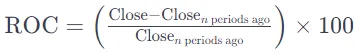

ROC Formülü: Fiyat hareketlerinin hızını vurgulayarak, bir menkul kıymetin fiyatının belirli sayıda dönem boyunca değiştiği yüzde oranını hesaplar.

ROC'nin birincil değeri, fiyat hareketlerinin yalnızca yönünü değil aynı zamanda hızını da işaret etme yeteneğinde yatmakta ve piyasa dinamikleri hakkında ikili bir bakış açısı sağlamaktadır.

ROC'nin diğer bir yönü, piyasa oynaklığındaki artışlar için erken uyarı sistemi olarak hizmet edebilen fiyat hızındaki değişikliklere karşı duyarlılığıdır.

Örneğin, ROC'deki keskin bir artış, yalnızca momentumun güçlendiğini değil aynı zamanda volatilitede potansiyel bir artış olduğunu da gösterebilir ve daha önemli fiyat değişimlerinin habercisi olabilir. Tersine, hızlı bir düşüş, momentumun azalmasına ve potansiyel pazar konsolidasyonuna veya tersine dönüşe işaret edebilir.

Fiyat değişimlerinin oranına bağlı olarak volatilitedeki değişiklikleri öngörme yeteneği, traderlara ve yatırımcılara, özellikle hızlı hareket eden piyasalarda giriş veya çıkış noktalarını değerlendirirken, piyasa koşullarını değerlendirmek ve stratejilerini buna göre ayarlamak için incelikli bir araç sunar.

[*********************100%%**********************]  1 of 1 completed


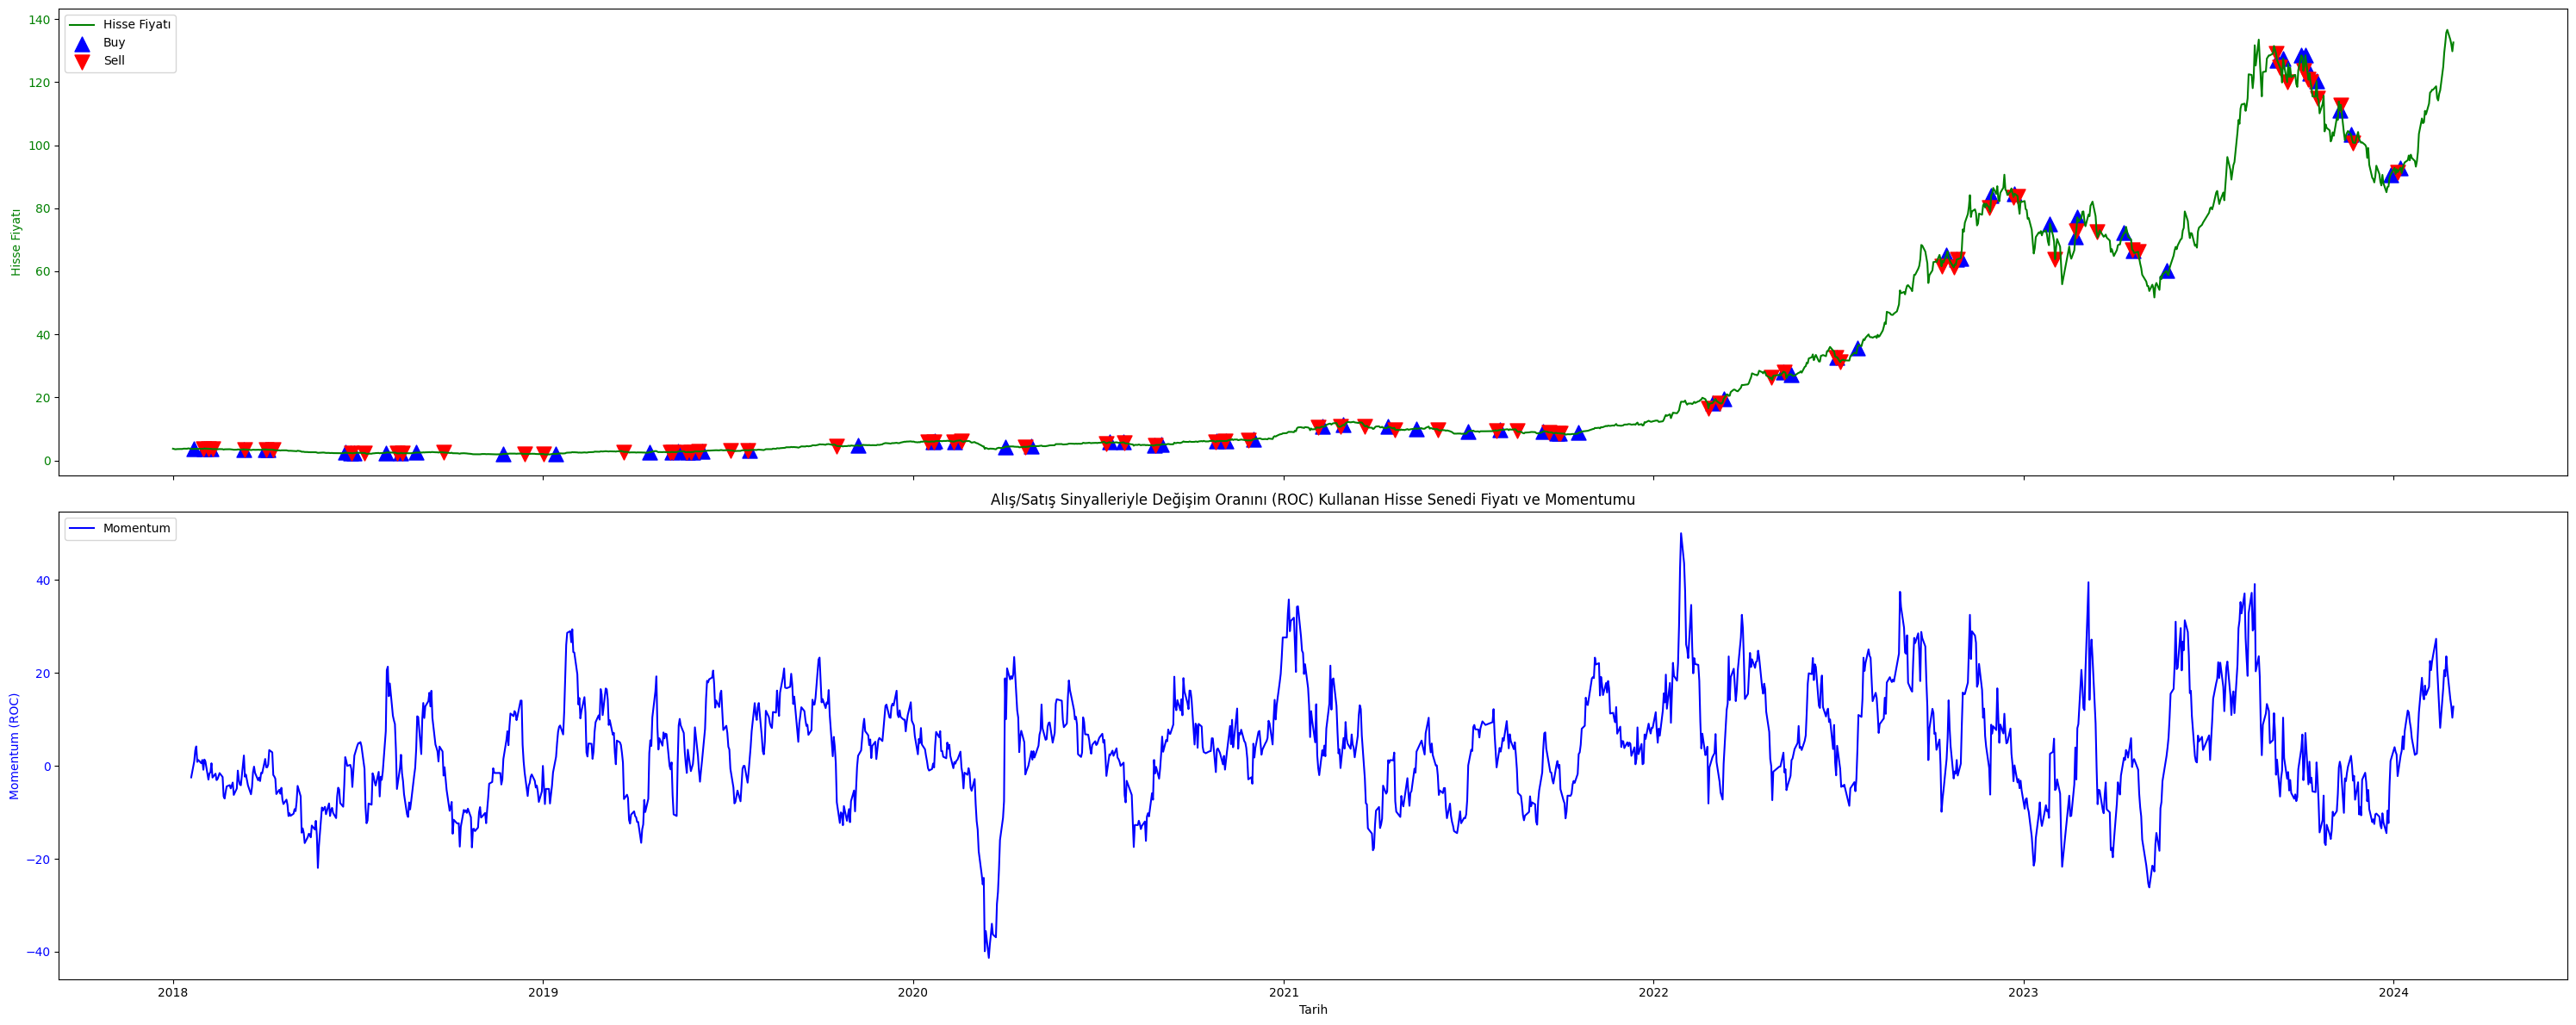

In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data

def calculate_momentum(prices, n=14):
    roc = (prices - prices.shift(n)) / prices.shift(n) * 100
    return roc

def plot_momentum(dates, prices, roc):
    buy_signals = (roc.shift(1) <= 0) & (roc > 0)
    sell_signals = (roc.shift(1) >= 0) & (roc < 0)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 12), sharex=True)

    ax1.set_ylabel('Hisse Fiyatı', color='g')
    ax1.plot(dates, prices, color='g', label='Hisse Fiyatı')
    ax1.scatter(dates[buy_signals], prices[buy_signals], marker='^', color='b', label='Buy', s=150)
    ax1.scatter(dates[sell_signals], prices[sell_signals], marker='v', color='r', label='Sell', s=150)
    ax1.tick_params(axis='y', labelcolor='g')
    ax1.legend(loc='upper left')

    ax2.set_xlabel('Tarih')
    ax2.set_ylabel('Momentum (ROC)', color='b')
    ax2.plot(dates, roc, color='b', label='Momentum')
    ax2.tick_params(axis='y', labelcolor='b')
    ax2.legend(loc='upper left')

    plt.title('Alış/Satış Sinyalleriyle Değişim Oranını (ROC) Kullanan Hisse Senedi Fiyatı ve Momentumu')
    plt.tight_layout()
    plt.show()

ticker = tickers
start_date = start_date
end_date = end_date

stock_data = fetch_stock_data(ticker, start_date, end_date)
prices = stock_data['Close']
momentum = calculate_momentum(prices)

plot_momentum(prices.index, prices, momentum)

Grafik, hisse senedi fiyatını ROC göstergesiyle birlikte görüntüler; ROC sıfırın üzerine çıktığında yükseliş momentumunu gösteren satın alma sinyallerini (mavi oklar) ve ROC sıfırın altına geçtiğinde aşağı yönlü momentumu gösteren satış sinyallerini (kırmızı oklar) gösterir. Bu sinyaller fiyat momentumunu ve pazar eğilimindeki potansiyel değişiklikleri görselleştirmeye yardımcı olur.




Commodity Channel Index (CCI)

CCI, menkul kıymetlerdeki döngüsel eğilimleri, mevcut tipik fiyatlarını (TP) belirli bir süre boyunca (genellikle 20 gün) ortalama TP ile karşılaştırarak tanımlayan çok yönlü bir göstergedir.

Formül ayrıca farklılıkları normalleştirmek için TP'nin aynı dönemdeki ortalama sapmasını (MD) de içerir ve bu da CCİ'yi piyasa davranışındaki değişikliklere karşı duyarlı hale getirir. Formül şu şekilde verilir:
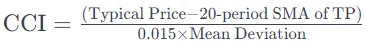

CCI Formülü: Bir menkul kıymetin fiyatının istatistiksel ortalamasından sapmasını ölçen, döngüsel eğilimleri ve potansiyel geri dönüşleri belirlemeye yardımcı olan bir momentum osilatörü.
Tipik Fiyatın (TP) en yüksek fiyatın ortalaması olarak hesaplandığı yer


CCI'nın önemli bir özelliği, yalnızca yeni trendlerin başlangıcını tespit etmekle kalmayıp, aynı zamanda potansiyel pazar dönüm noktalarına işaret edebilecek aşırı koşulları da tespit edebilme yeteneğidir. CCI'dan etkin bir şekilde yararlanmanın anahtarı, sırasıyla aşırı alım ve aşırı satış koşullarını gösteren +100 ve -100 eşiklerindeki davranışını anlamaktır.

Ek olarak, CCI ve fiyat grafiğinin zıt yönlerde hareket ettiği durumlardaki farklılıklar kavramı özellikle aydınlatıcı olabilir. Örneğin, CCI önceki yüksek seviyelerini aşamazken bir varlığın fiyatı yeni zirvelere ulaşırsa, bu durum ivmenin zayıfladığını ve olası bir geri dönüşün göstergesi olabilir.

Bu farklılık, hakim eğilime rağmen temel piyasa gücünün zayıfladığını ve yatırımcılar için potansiyel olarak stratejik giriş veya çıkış noktaları sunduğunu öne süren çok önemli bir sinyal görevi görüyor.

[*********************100%%**********************]  1 of 1 completed

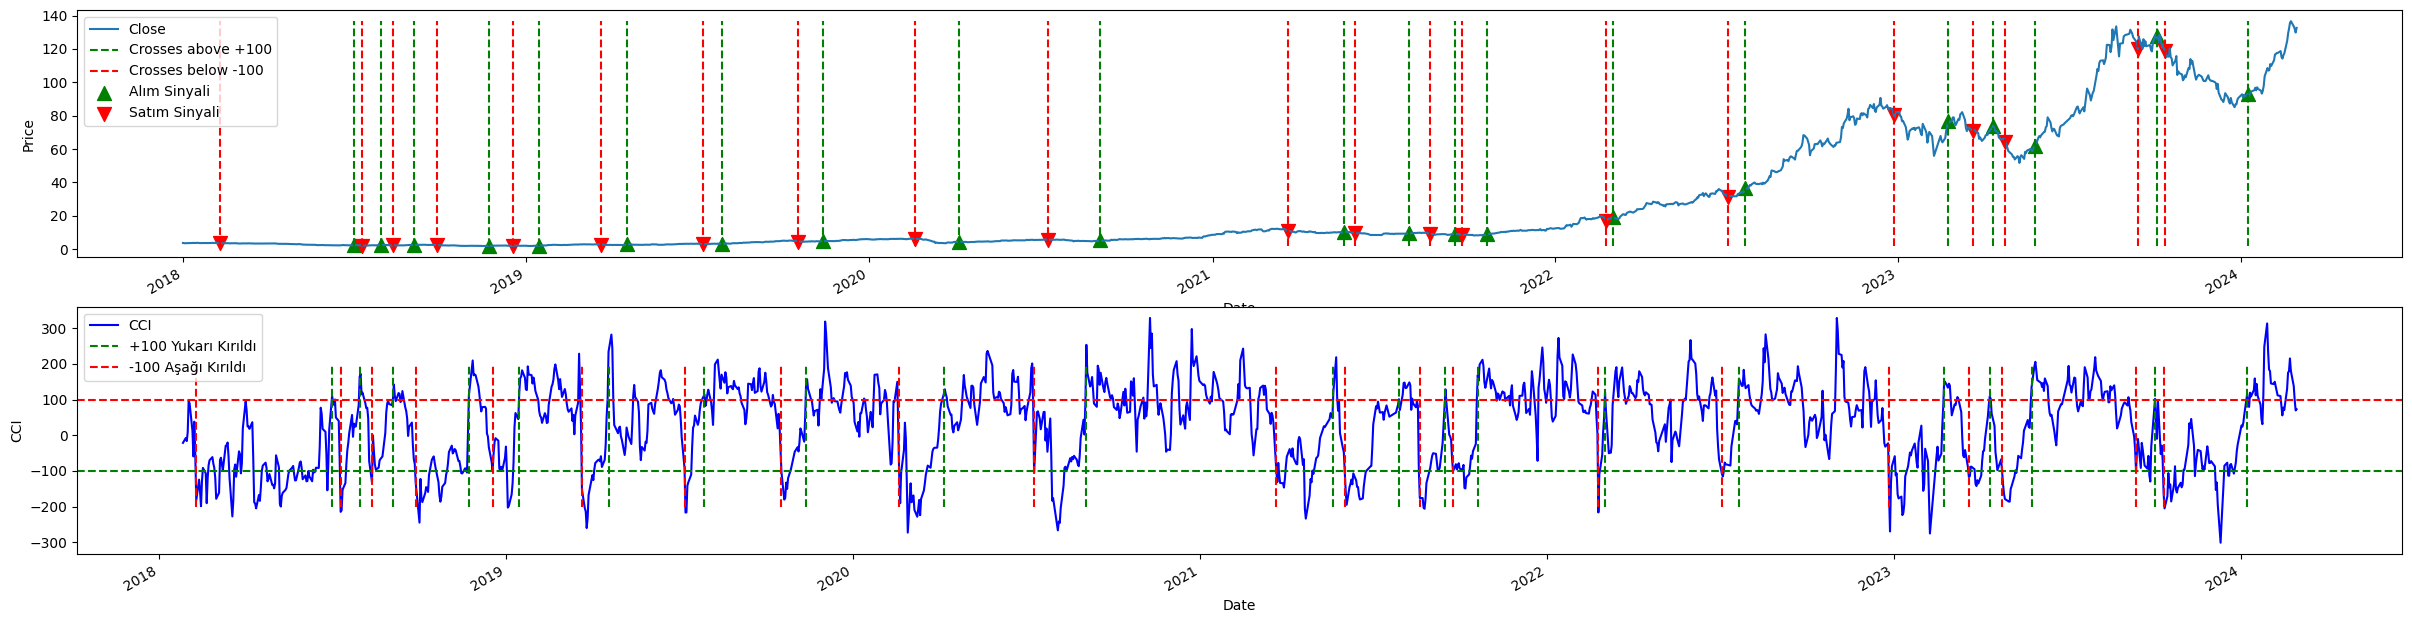

In [24]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Tarihsel Data
ticker = tickers
df = yf.download(ticker, start=start_date, end=end_date)

# Typical Price Hesaplama
df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3

# Typical Price Hareketli Ortalama HEsabı
window = 20  # 20 Günlük Hareketli Ortalama Kullanıldı
df['TP_MA'] = df['TP'].rolling(window).mean()

# Ortalamadan sapma hesabı
df['MD'] = df['TP'].rolling(window).apply(lambda x: np.abs(x - x.mean()).mean())

# Commodity Channel Index (CCI) Hesaplama
df['CCI'] = (df['TP'] - df['TP_MA']) / (0.015 * df['MD'])

# CCI trend için yeni sutun açma
df['CCI_trend'] = np.nan

# CCI 100 üzerindeyse "1" yaz
df.loc[df['CCI'] > 100, 'CCI_trend'] = 1

#CCI 100 üzerindeyse "-1" yaz
df.loc[df['CCI'] < -100, 'CCI_trend'] = -1

# Trend sütununu ileri doğru doldurun. Bu şekilde, bir eşik aşıldığında trend, karşı eşik geçilinceye kadar devam eder.9
df['CCI_trend'].ffill(inplace=True)

# Identify the points where the CCI crosses the thresholds
df['crosses_above'] = ((df['CCI'] > 100) & (df['CCI'].shift(1) < 100) & (df['CCI_trend'].shift(1) != 1))
df['crosses_below'] = ((df['CCI'] < -100) & (df['CCI'].shift(1) > -100) & (df['CCI_trend'].shift(1) != -1))

# Gösterim
fig, (ax1, ax2) = plt.subplots(2, figsize=(30, 8))

# Kapanış Fiyatı
df['Close'].plot(ax=ax1)
ax1.set_ylabel('Price')

# CCI eşik geçişleri için dikey çizgiler çizin
ax1.vlines(df[df['crosses_above']].index, ymin=df['Close'].min(), ymax=df['Close'].max(), colors='g', linestyles='dashed', label='Crosses above +100')
ax1.vlines(df[df['crosses_below']].index, ymin=df['Close'].min(), ymax=df['Close'].max(), colors='r', linestyles='dashed', label='Crosses below -100')

# Alış ve satış sinyalleri için dağılım grafiğini doğru şekilde ekleyin
# Not: Düzeltme, dağılım grafiklerinin dikey çizgi koşullarıyla eşleşmesini sağlamayı içerir
ax1.scatter(df[df['crosses_above']].index, df[df['crosses_above']]['Close'], color='g', label='Alım Sinyali', marker='^', s=100) # yeşil Alım
ax1.scatter(df[df['crosses_below']].index, df[df['crosses_below']]['Close'], color='r', label='Satım Sinyali', marker='v', s=100) # kırmızı satım

ax1.legend()

# CCI gÖsterimi
df['CCI'].plot(ax=ax2, color='blue', label='CCI')
ax2.axhline(100, color='red', linestyle='--')  # Aşırı alım çizgisi
ax2.axhline(-100, color='green', linestyle='--')  # Aşırı satım çizgisi

# Grafiklerde görsel tutarlılık için dikey çizgileri tekrarlama
ax2.vlines(df[df['crosses_above']].index, ymin=-200, ymax=200, colors='g', linestyles='dashed', label='+100 Yukarı Kırıldı')
ax2.vlines(df[df['crosses_below']].index, ymin=-200, ymax=200, colors='r', linestyles='dashed', label='-100 Aşağı Kırıldı')

ax2.set_ylabel('CCI')
ax2.legend()

plt.show()

Grafik, CCI ile birlikte hisse senedi fiyat hareketlerini gösterir; CCI +100'ün üzerine çıktığında yükseliş trendini işaret eden satın alma sinyallerini (yeşil işaretleyiciler) ve -100'ün altına geçtiğinde düşüş trendini işaret eden satış sinyallerini (kırmızı işaretleyiciler) vurgular. Bu geçişler, sürekli CCI trendiyle birleştiğinde, pazarın ivmesi ve trendlerdeki potansiyel değişimler hakkında fikir veriyor.





Williams %R

Williams %R, belirli bir süre için en yüksek zirveye göre kapanış seviyesini yansıtan bir momentum göstergesidir.

Aşırı alım ve aşırı satım koşullarını gösteren 0 ile -100 arasında salınım yapar. Williams %R'nin formülü şöyledir:

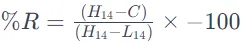

Williams %R Formülü: Aşırı alım ve aşırı satım koşullarını belirleyerek, belirli bir dönemdeki yüksek ve düşük seviyelere göre mevcut kapanış fiyatını ölçer.


burada H14​ son 14 dönemdeki en yüksek en yüksek seviye, L14​ aynı dönemdeki en düşük düşük seviye ve C mevcut kapanıştır.

Williams %R tarafından sunulan temel yorumun ötesinde önemli bir içgörü, piyasa momentumundaki ince değişimleri fiyat hareketlerinde belirgin hale gelmeden önce tespit edebilme yeteneğidir.

Özellikle hareketli ortalamayla birlikte kullanıldığında Williams %R, piyasa koşullarının daha ayrıntılı bir görünümünü sağlayabilir.

Örneğin, yükseliş trendinde -80'in altından yukarıya doğru bir hareket, trendin tersine dönmesinden ziyade devam ettiğini gösterebilir ve potansiyel bir satın alma fırsatı olarak hizmet edebilir. Tersine, düşüş trendinde -20 seviyesinden bir sıçrama satış baskısını yeniden teyit edebilir.

Göstergenin sinyallerini genel piyasa eğilimi bağlamında yorumlama yeteneği, faydasına bir derinlik katmanı ekleyerek, kısa vadeli fiyat momentumuna ve genel piyasa duyarlılığına dayalı olarak daha bilinçli karar alınmasına olanak tanır.

[*********************100%%**********************]  1 of 1 completed

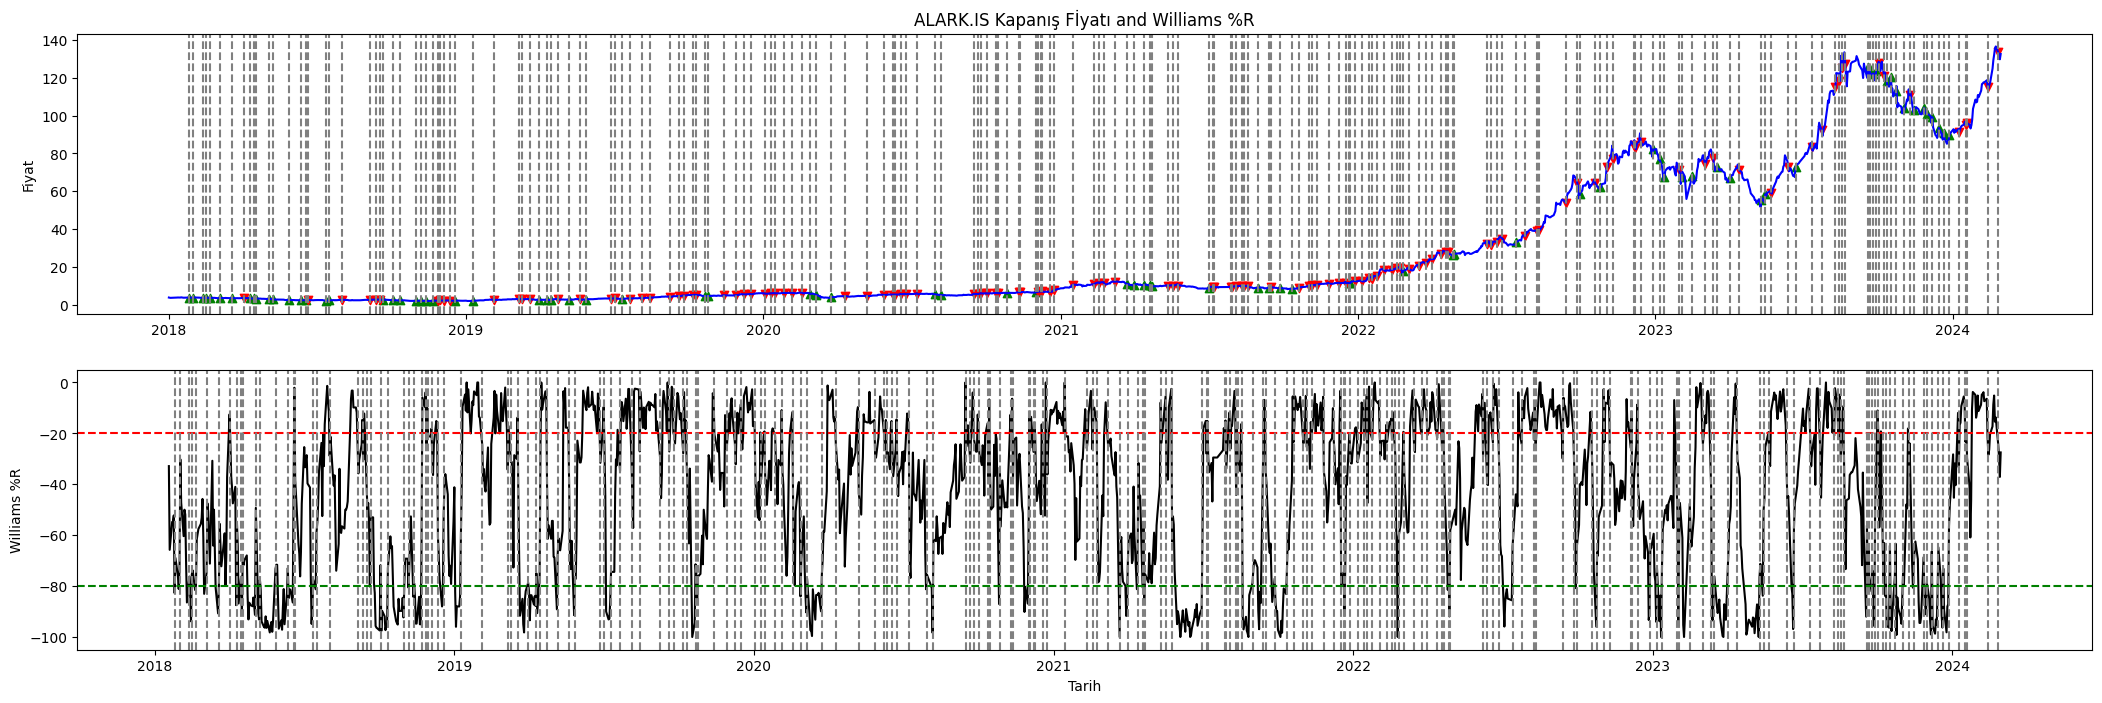

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data alma
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# Williams %R hesaplama
n = window_size
data['High_Rolling'] = data['High'].rolling(n).max()
data['Low_Rolling'] = data['Low'].rolling(n).min()
data['Williams_%R'] = -100 * ((data['High_Rolling'] - data['Close']) / (data['High_Rolling'] - data['Low_Rolling']))

# siyaller
data['Buy_Signal'] = np.where((data['Williams_%R'].shift(1) < -80) & (data['Williams_%R'] > -80), 1, 0)
data['Sell_Signal'] = np.where((data['Williams_%R'].shift(1) > -20) & (data['Williams_%R'] < -20), 1, 0)

# Williams %R'nin eşikleri geçtiği noktaları belirleme
data['Buy_Cross'] = ((data['Williams_%R'].shift(1) < -80) & (data['Williams_%R'] > -80))
data['Sell_Cross'] = ((data['Williams_%R'].shift(1) > -20) & (data['Williams_%R'] < -20))

# Yeni bir eşiğin aşıldığı noktaları belirleyin
data['Threshold_Crossed'] = data['Buy_Cross'] | data['Sell_Cross']

# Eşik geçiş noktalarının listesini oluştur
threshold_cross_points = data[data['Threshold_Crossed']].index.to_list()

# gösterimler
fig, (ax1, ax2) = plt.subplots(2, figsize=(26,8))

# fiyat gösterimi
ax1.plot(data['Close'], label='Kapanış Fİyatı', color='blue')
ax1.scatter(data[data['Buy_Signal'] == 1].index, data[data['Buy_Signal'] == 1]['Close'], color='green', marker='^', alpha=1)
ax1.scatter(data[data['Sell_Signal'] == 1].index, data[data['Sell_Signal'] == 1]['Close'], color='red', marker='v', alpha=1)
ax1.set_title(f'{tickers} Kapanış Fİyatı and Williams %R')
ax1.set_ylabel('Fiyat')

# Görsel Williams %R
ax2.plot(data['Williams_%R'], label='Williams %R', color='black')
ax2.axhline(-20, color='red', linestyle='--')
ax2.axhline(-80, color='green', linestyle='--')
ax2.set_xlabel('Tarih')
ax2.set_ylabel('Williams %R')

# Eşikler geçildiğinde dikey çizgiler çizin
for cross_point in threshold_cross_points:
    ax1.axvline(x=cross_point, color='gray', linestyle='--')
    ax2.axvline(x=cross_point, color='gray', linestyle='--')

plt.show()

Grafik, aşağıdaki Williams %R göstergesiyle hisse senedi kapanış fiyatlarını göstermektedir. %R -80'in altından yükseldiğinde alış sinyalleri yeşil oklarla işaretlenir, bu aşırı satış koşullarını gösterir; %R -20'nin üzerinde düştüğünde aşırı alım koşullarını gösteren satış sinyalleri kırmızı oklarla işaretlenir. Dikey gri çizgilerle hizalanan bu sinyaller, momentum değişimlerine bağlı olarak potansiyel giriş ve çıkış noktalarını göstermektedir.

Pratik uygulama
3.1 Karşılaştırmalı Analiz
3.1.1 Hassasiyet

RSI ve Stokastik Osilatör oldukça hassastır ve genellikle hızlı sinyaller üretir. Kısa vadeli trade için çok uygundurlar.
ROC daha az hassas olma eğilimindedir ve bu da onu uzun vadeli eğilimleri belirlemek için daha uygun hale getirir.
CCI ve Williams %R, hem kısa hem de uzun vadeli senaryolarda faydalı olan orta düzeyde bir hassasiyet sunar.

3.1.2 Zaman Çerçeveleri

RSI ve Stokastik Osilatör genellikle hem kısa hem de orta vadeli işlemlere uyarlanabilen 14 dönemlik bir ayarla kullanılır.
ROC genellikle uzun vadeli trend analizi için uygun olan 20 veya 25 gibi daha uzun bir süre ile kullanılır.
Müthiş Osilatör ve CCI çok yönlüdür ve seçilen dönem ayarlarına bağlı olarak çeşitli zaman dilimlerinde etkilidir.

3.1.3 Sinyal Türleri

Aşırı Alım/Aşırı Satış: RSI, Stokastik Osilatör ve Williams %R aşırı alım/aşırı satım koşullarını belirlemek için mükemmeldir.
Trend Dönüşleri: ROC ve Awesome Oscillator, uzun vadeli trend dönüşümlerinin sinyalini verme konusunda daha beceriklidir.
K Reversal, matematiksel formüller yerine model tanımaya odaklanması açısından benzersizdir ve önemli fiyat tersine dönüşlerini tespit etmede faydalıdır.

3.2 Göstergelerin Birleştirilmesi

RSI ve MACD: RSI'yi (aşırı alım/aşırı satış sinyalleri için) MACD (trend onayı için) ile birleştirmek yanlış sinyalleri filtreleyebilir.
Stokastik Osilatör ve Hareketli Ortalamalar: Trend yönünü doğrulamak için giriş/çıkış sinyalleri ve hareketli ortalamalar için Stokastik kullanmak, sinyallerin güvenilirliğini artırır.
CCI ve ROC: CCI trendin erken tespiti için kullanılabilirken, ROC trendin gücünü ve sürdürülebilirliğini teyit eder.

4. Sınırlamalar ve Hususlar

4.1 RSI

Yanlış Sinyaller: Güçlü trendlerde, RSI aşırı alım veya aşırı satım bölgelerinde uzun süre kalabilir ve bu da erken veya yanlış trade sinyallerine yol açabilir.
Farklılık: Farklılık güçlü bir sinyal olsa da her zaman trendin tersine döndüğünün kesin bir göstergesi değildir.

4.2 Stokastik Osilatör:

Piyasa Hareketlerine Duyarlılık: Duyarlılığı, özellikle değişken piyasalarda sık sık ve bazen yanıltıcı sinyallere neden olabilir.
Yan Piyasalar: Fiyat dalgalanmalarının net bir trend izlemeyebileceği yan veya değişken piyasalarda daha az etkilidir.

4.3 ROC

Gecikme Doğası: Saf bir momentum göstergesi olarak ROC, gerçek zamanlı piyasa değişikliklerinin gerisinde kalarak sinyallerin gecikmesine neden olabilir.
Yönlü Bilgi Yok: ROC, fiyat değişimlerinin hızını gösterir ancak fiyat eğiliminin yönü hakkında bilgi sağlamaz.

4.4 CCI

Volatiliteye Duyarlı: CCI, ani fiyat değişimlerine duyarlılığı nedeniyle yüksek volatiliteye sahip piyasalarda birçok yanlış sinyal üretebilmektedir.
Ek Onay Gerektirir: En iyi şekilde trade sinyallerini onaylamak için diğer göstergelerle birlikte kullanılır.

4.5 Williams %R

Aşırı Alım/Aşırı Satış Seviyeleri: Güçlü trendler sırasında uzun süre aşırı alım veya aşırı satış seviyelerinde kalabilir, bu da yatırımcıları dönüş noktaları konusunda yanıltabilir.
Trend Bağlamına İhtiyaç Var: Hakim eğilim bağlamında kullanıldığında daha etkilidir.

4.6 Müthiş Osilatör

Sıfır Hat Geçişleri: Sık sık sıfır hat geçişleri, trend gücünün yorumlanmasında belirsizliğe yol açabilir.
Geç Sinyaller: Genellikle fiyat hareketinin önemli bir kısmı gerçekleştikten sonra sinyal verir.






Hacim Göstergelerini Anlamak



Hacim göstergeleri tradete temel araçlardır; fiyat hareketlerini doğrulamaya ve potansiyel piyasa değişimlerini işaret etmeye yardımcı olur. Örneğin, bir hisse senedi fiyatının yüksek hacimle artması alıcı ilgisinin güçlü olduğunu gösterir ve yükseliş trendini daha inandırıcı hale getirir.
Bu göstergeler yalnızca bir trendin gücünü teyit etmekle kalmaz, aynı zamanda tersine dönüşleri de işaretleyebilir. Örneğin, azalan bir hisse senedi fiyatında önemli bir değişiklik olmadan aniden hacimde bir artış gösteriyorsa, bu, trendin gücünü kaybettiğini ve bir tersine dönüşün yakın olabileceğini gösterebilir.

On Balance Volume (OBV)


Denge Hacmi (OBV), hacmi fiyat değişimiyle ilişkilendiren kümülatif bir göstergedir. OBV'nin arkasındaki teori, bilgili kurumsal yatırımcılar olduğu varsayılan akıllı para ile daha az bilgili perakende yatırımcılar arasındaki ayrıma dayanıyor.

OBV, her işlem gününde fiyatın bir önceki kapanışa göre daha yüksek veya daha düşük kapanmasına bağlı olarak artar veya azalır. Kapanış fiyatının yüksek olması durumunda günün hacmi OBV toplamına eklenir; daha düşükse hacim çıkarılır.

Formül şu şekilde temsil edilebilir:



OBV Formülü: Alış veya satış baskısını belirtmek için fiyat değişikliklerine göre kümülatif hacmi hesaplar, yükseliş günlerinde hacim ekler ve düşüş günlerinde çıkarır.

Örneğin, düşüş eğiliminde olan bir piyasada yükselen bir OBV, bilgili yatırımcılar tarafından birikim yapılmasına işaret ettiğinden fiyatların yukarı yönlü bir dönüşünün yaklaştığının sinyalini verebilir.

Tersine, yükseliş eğilimindeki azalan bir OBV, dağıtımın ve fiyatın aşağı yönde olası bir dönüşünün göstergesi olabilir. Bu, OBV'yi trendleri doğrulamak veya yalnızca fiyat analiziyle görülemeyen farklılıkları tespit etmek için özellikle değerli kılıyor ve yatırımcılara piyasa konumlarını ayarlamaları için erken sinyaller sağlıyor.



[*********************100%%**********************]  1 of 1 completed

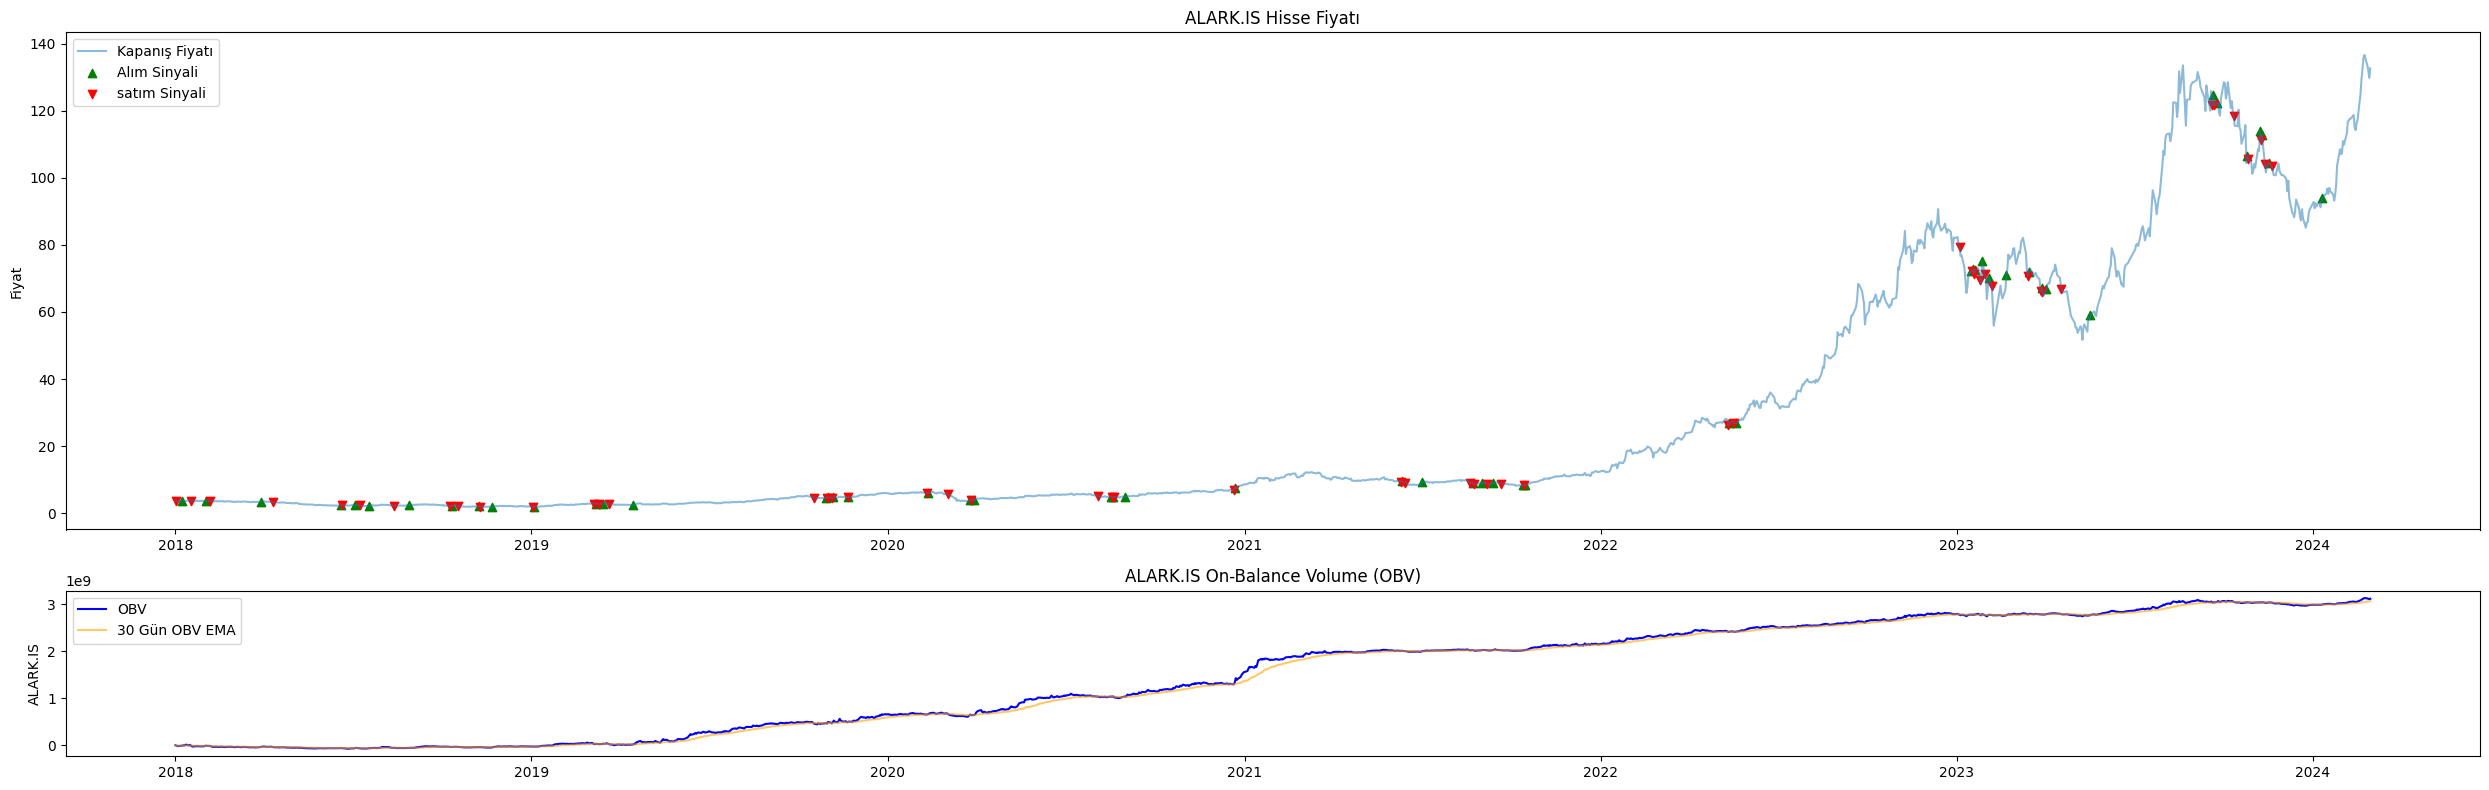

In [26]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_obv(data):
    obv = [0]
    for i in range(1, len(data)):
        if data['Close'][i] > data['Close'][i-1]:
            obv.append(obv[-1] + data['Volume'][i])
        elif data['Close'][i] < data['Close'][i-1]:
            obv.append(obv[-1] - data['Volume'][i])
        else:
            obv.append(obv[-1])
    return obv

# Tarihsel Data
ticker = tickers 
data = yf.download(ticker, start=start_date, end=end_date)

# OBV Hesaplama
data['OBV'] = calculate_obv(data)
data['OBV_EMA'] = data['OBV'].ewm(span=30).mean()  #OBV nin 30 Günlük üstsel hareket ortalamsı

#Alım/Satım Sinyalleri
buy_signal = (data['OBV'] > data['OBV_EMA']) & (data['OBV'].shift(1) <= data['OBV_EMA'].shift(1))
sell_signal = (data['OBV'] < data['OBV_EMA']) & (data['OBV'].shift(1) >= data['OBV_EMA'].shift(1))

# Görselleştirme
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8), gridspec_kw={'height_ratios': [3, 1]})

# SSinyallerle fiyatın görseli
ax1.plot(data['Close'], label='Kapanış Fiyatı', alpha=0.5)
ax1.scatter(data.index[buy_signal], data['Close'][buy_signal], label='Alım Sinyali', marker='^', color='green')
ax1.scatter(data.index[sell_signal], data['Close'][sell_signal], label='satım Sinyali', marker='v', color='red')
ax1.set_title(f'{tickers} Hisse Fiyatı')
ax1.set_ylabel('Fiyat')
ax1.legend()

# OBV subplot
ax2.plot(data['OBV'], label='OBV', color='blue')
ax2.plot(data['OBV_EMA'], label='30 Gün OBV EMA', color='orange', alpha=0.6)
ax2.set_title(f'{ticker} On-Balance Volume (OBV)')
ax2.set_ylabel(tickers)
ax2.legend()

plt.tight_layout()
plt.show()


Grafik, trend analizi için 30 günlük OBV EMA'sı da dahil olmak üzere hisse senedi kapanış fiyatlarını OBV ile karşılaştırıyor. OBV EMA'nın üzerine geçtiğinde satın alma sinyalleri (yeşil işaretleyiciler) ortaya çıkar ve aşağısını geçtiğinde satış sinyalleri (kırmızı işaretleyiciler) oluşur ve bu da piyasa momentumunda değişiklik olduğunu gösterir.







Volume Price Trend (VPT)


VPT, hacmi fiyattaki yüzde değişimle bütünleştirerek eğilimin gücünü ve yönünü kümülatif olarak gösterir. Her dönemin hacminin yüzde fiyat değişimiyle çarpılması ve bunun önceki dönemin VPT değerine eklenmesiyle hesaplanır. Formül şu şekilde ifade edilebilir:

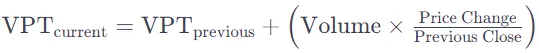

VPT Formülü: tradein ve fiyat yönünün kümülatif etkisini yansıtacak şekilde hacmi fiyattaki değişim yüzdesine göre ayarlar ve trend gücü değerlendirmesine yardımcı olur.

VPT arz ve talep arasındaki dengeyi anlamak için kullanılır. Yatırımcılar, gelecekteki fiyat değişikliklerinin potansiyel bir göstergesi olarak VPT ile fiyat hareketi arasındaki farklılıkları izliyor. Özellikle bir trendin gücünü teyit etmede faydalıdır.

Spesifik olarak, VPT'nin fiyat ayarlamalarıyla ilgili hacim değişikliklerine olan duyarlılığı, piyasa duyarlılığındaki değişiklikler için gelişmiş bir uyarı sistemi sağlar.

Örneğin, VPT ile fiyat arasında bir farklılık (VPT düşmeye başlarken fiyatın yükselmeye devam ettiği durum) zayıflayan ivmenin sinyalini verebilir ve potansiyel olarak fiyatın tersine dönebileceğini tahmin edebilir.

[*********************100%%**********************]  1 of 1 completed

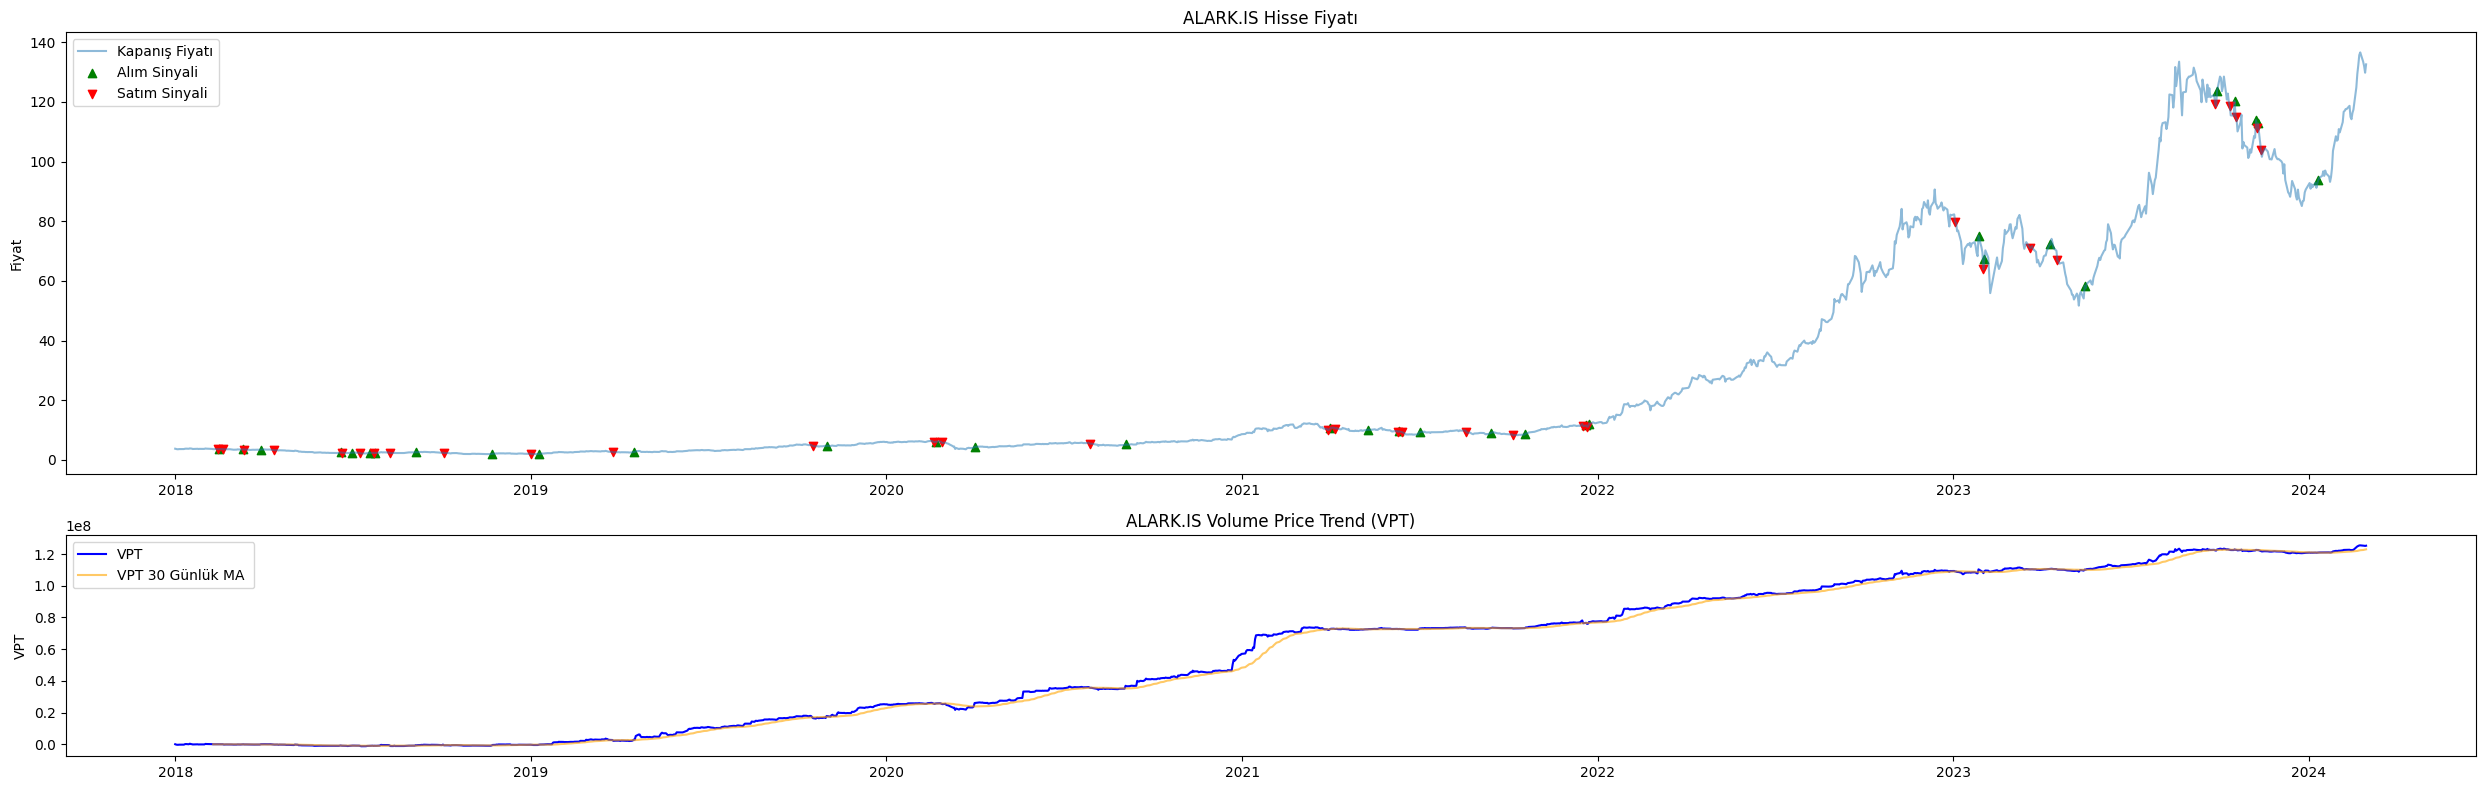

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_vpt(data):
    vpt = [0]
    for i in range(1, len(data)):
        price_change = data['Close'][i] - data['Close'][i-1]
        vpt.append(vpt[-1] + (data['Volume'][i] * price_change / data['Close'][i-1]))
    return vpt

# data 
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# VPT hesaplama
data['VPT'] = calculate_vpt(data)
data['VPT_MA'] = data['VPT'].rolling(window=30).mean()  # 30-Gün hareketli ortalama

# Alım satım sinyal üretimi
buy_signal = (data['VPT'] > data['VPT_MA']) & (data['VPT'].shift(1) <= data['VPT_MA'].shift(1))
sell_signal = (data['VPT'] < data['VPT_MA']) & (data['VPT'].shift(1) >= data['VPT_MA'].shift(1))

# Görsel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8), gridspec_kw={'height_ratios': [2, 1]})

# alım satım sinyalleri ile hisse fiyatı gösterimi
ax1.plot(data['Close'], label='Kapanış Fiyatı', alpha=0.5)
ax1.scatter(data.index[buy_signal], data['Close'][buy_signal], label='Alım Sinyali', marker='^', color='green')
ax1.scatter(data.index[sell_signal], data['Close'][sell_signal], label='Satım Sinyali', marker='v', color='red')
ax1.set_title(f'{ticker} Hisse Fiyatı')
ax1.set_ylabel('Fiyat')
ax1.legend()

# 
ax2.plot(data['VPT'], label='VPT', color='blue')
ax2.plot(data['VPT_MA'], label='VPT 30 Günlük MA ', color='orange', alpha=0.6)
ax2.set_title(f'{ticker} Volume Price Trend (VPT)')
ax2.set_ylabel('VPT')
ax2.legend()

plt.tight_layout()
plt.show()





Volume Rate of Change (VROC)



VROC, mevcut hacmi n gün önceki hacimle karşılaştırarak hacmin belirli bir dönemdeki değişim yüzdesini ölçer. Bu ölçüm, fiyat yönünden bağımsız olarak trade faaliyetindeki hızlanma veya yavaşlamayı vurgular. VROC formülü şu şekilde verilir:

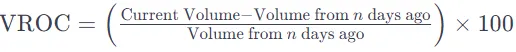

VROC Formülü: Seçilen bir dönemde hacimdeki değişim yüzdesini ölçerek piyasa aktivitesinin hızı ve potansiyel ivme değişimleri hakkında bilgi sağlar.

VROC öncelikle fiyat eğilimlerini ve potansiyel fiyat dönüşlerini doğrulamak için kullanılır. Fiyat artışıyla birlikte yüksek VROC, yükseliş trendinin gücünü gösterebilir; fiyat düşüşü sırasındaki yüksek VROC ise güçlü satış baskısının sinyali olabilir.

VROC, yalnızca hacim değişim oranlarına odaklanarak pazar dinamiklerine farklı bir bakış açısı sunuyor. VROC'tan elde edilen, daha az belirgin olsa da önemli bir içgörü, alım satım ilgisinin fiyat hareketine yansımadan önce arttığına dair sinyal verme yeteneğidir. Örneğin, fiyatlar sabit veya hafif hareketli olsa bile VROC'de önemli bir artış, trader katılımının arttığını ve arz-talep dengesinde potansiyel değişimlere işaret ettiğinden fiyatta bir kırılmanın yaklaştığını gösterebilir.

[*********************100%%**********************]  1 of 1 completed

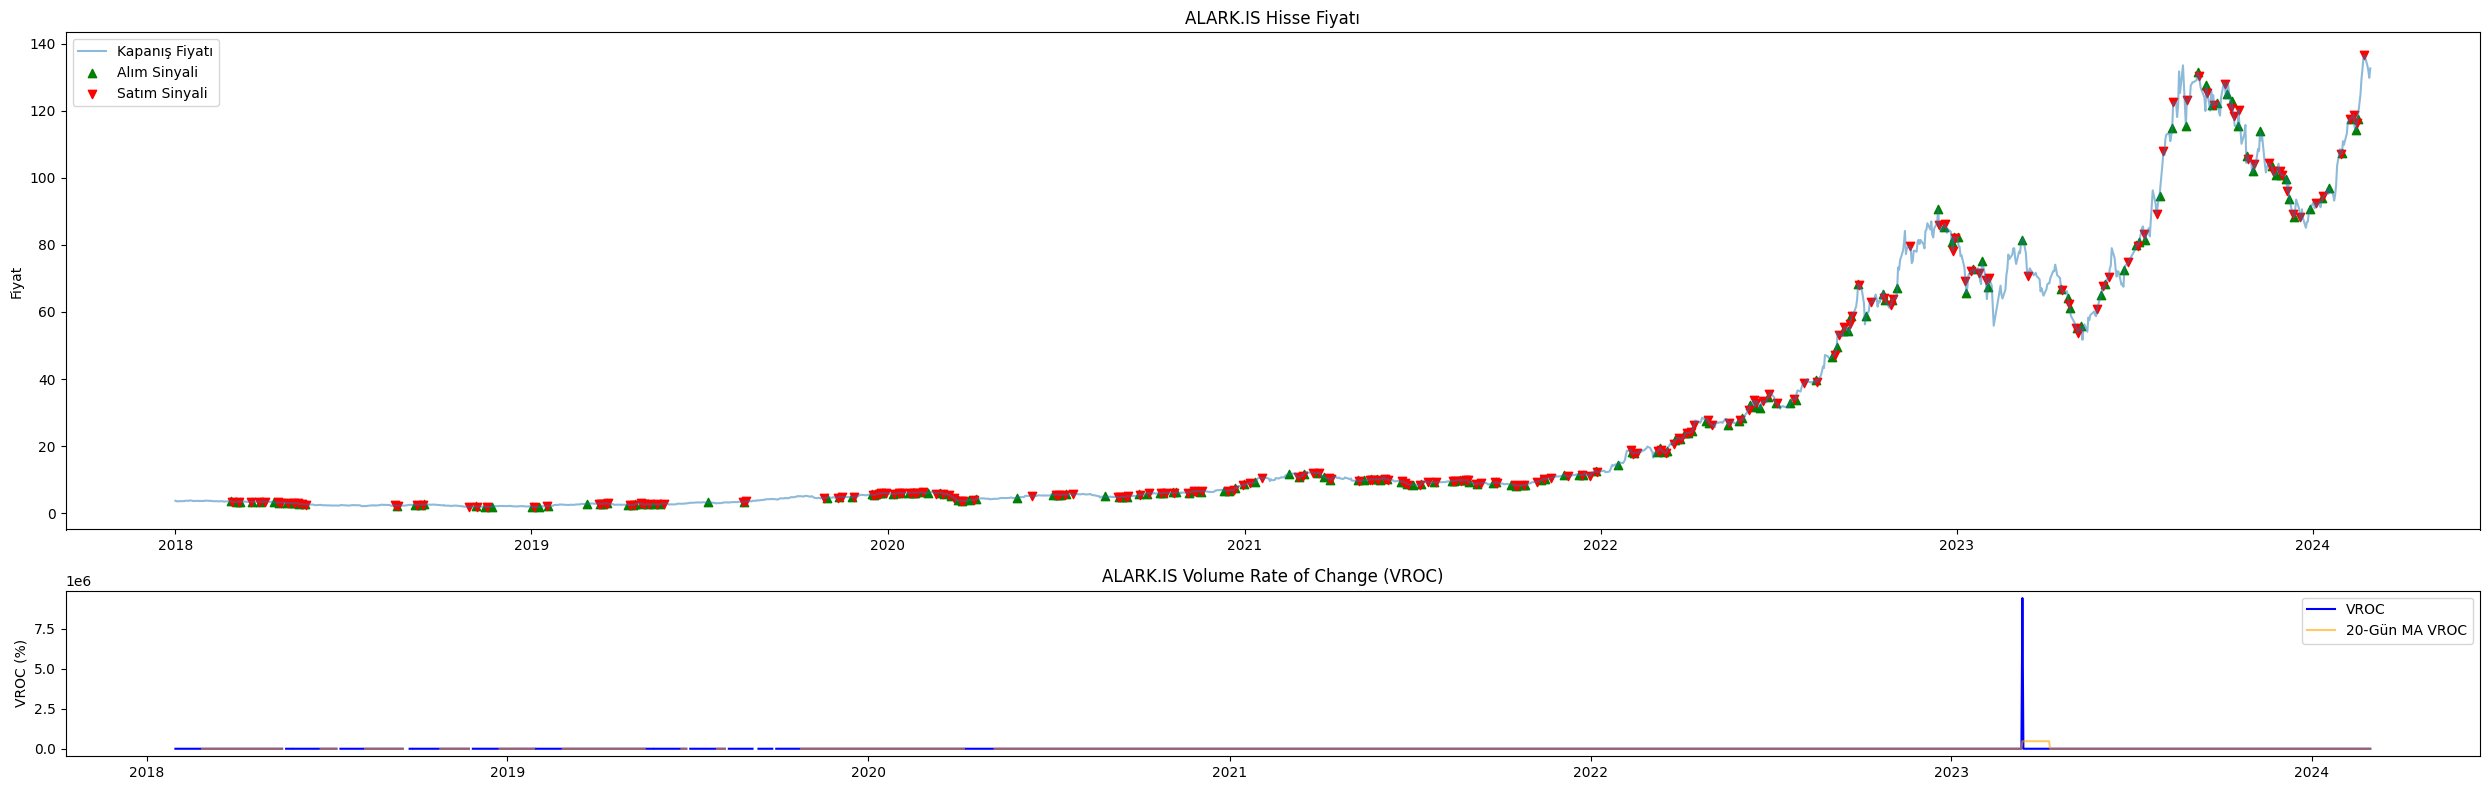

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_vroc(data, period=20):
    vroc = ((data['Volume'] - data['Volume'].shift(period)) / data['Volume'].shift(period)) * 100
    return vroc

# data
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# VROC Hesaplama
vroc_period = 20  # 20-gün VROC
data['VROC'] = calculate_vroc(data, vroc_period)
data['VROC_MA'] = data['VROC'].rolling(window=vroc_period).mean()  # 20 Gün VROC hareketli ortalama

# alım satım sinyal üretimi
buy_signal = (data['VROC'] > data['VROC_MA']) & (data['VROC'].shift(1) <= data['VROC_MA'].shift(1))
sell_signal = (data['VROC'] < data['VROC_MA']) & (data['VROC'].shift(1) >= data['VROC_MA'].shift(1))

# görsel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8), gridspec_kw={'height_ratios': [3, 1]})

# Stock price plot with buy and sell signals
ax1.plot(data['Close'], label='Kapanış Fiyatı', alpha=0.5)
ax1.scatter(data.index[buy_signal], data['Close'][buy_signal], label='Alım Sinyali', marker='^', color='green')
ax1.scatter(data.index[sell_signal], data['Close'][sell_signal], label='Satım Sinyali', marker='v', color='red')
ax1.set_title(f'{ticker} Hisse Fiyatı')
ax1.set_ylabel('Fiyat')
ax1.legend()

# VROC subplot
ax2.plot(data['VROC'], label='VROC', color='blue')
ax2.plot(data['VROC_MA'], label=f'{vroc_period}-Gün MA VROC', color='orange', alpha=0.6)
ax2.set_title(f'{ticker} Volume Rate of Change (VROC)')
ax2.set_ylabel('VROC (%)')
ax2.legend()

plt.tight_layout()
plt.show()






Chaikin Money Flow (CMF)




CMF, genellikle 20 gün olmak üzere belirli bir süre boyunca alım ve satım baskısını ölçmek için fiyat ve hacmi entegre eder. Kapanış, yüksek ve düşük fiyatlar arasındaki ilişkiden elde edilen, hacme göre ağırlıklandırılmış bir değer olan Para Akışı Hacmini hesaplar ve ardından Para Akışı Hacmi toplamını döneme ait hacim toplamına böler. CMF'nin formülü şöyledir:

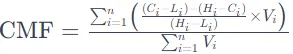


CMF'nin faydası, sadece trend doğrulamanın ötesine geçerek, likiditeye dayalı fiyat hareketlerini tespit etmeye yönelik tahmin kapasitesini de içermektedir. CMF'nin önemli bir içgörüsü, yalnızca fiyat hareketinden anlaşılamayan gizli satın alma veya satış baskısını ortaya çıkarma yeteneğidir.

Örneğin, konsolidasyona giren bir piyasada yükselen bir CMF, bir kırılmayı önleyebilir; bu da fiyat hareketi olmamasına rağmen temeldeki satın alma baskısının biriktiğine işaret eder.

[*********************100%%**********************]  1 of 1 completed

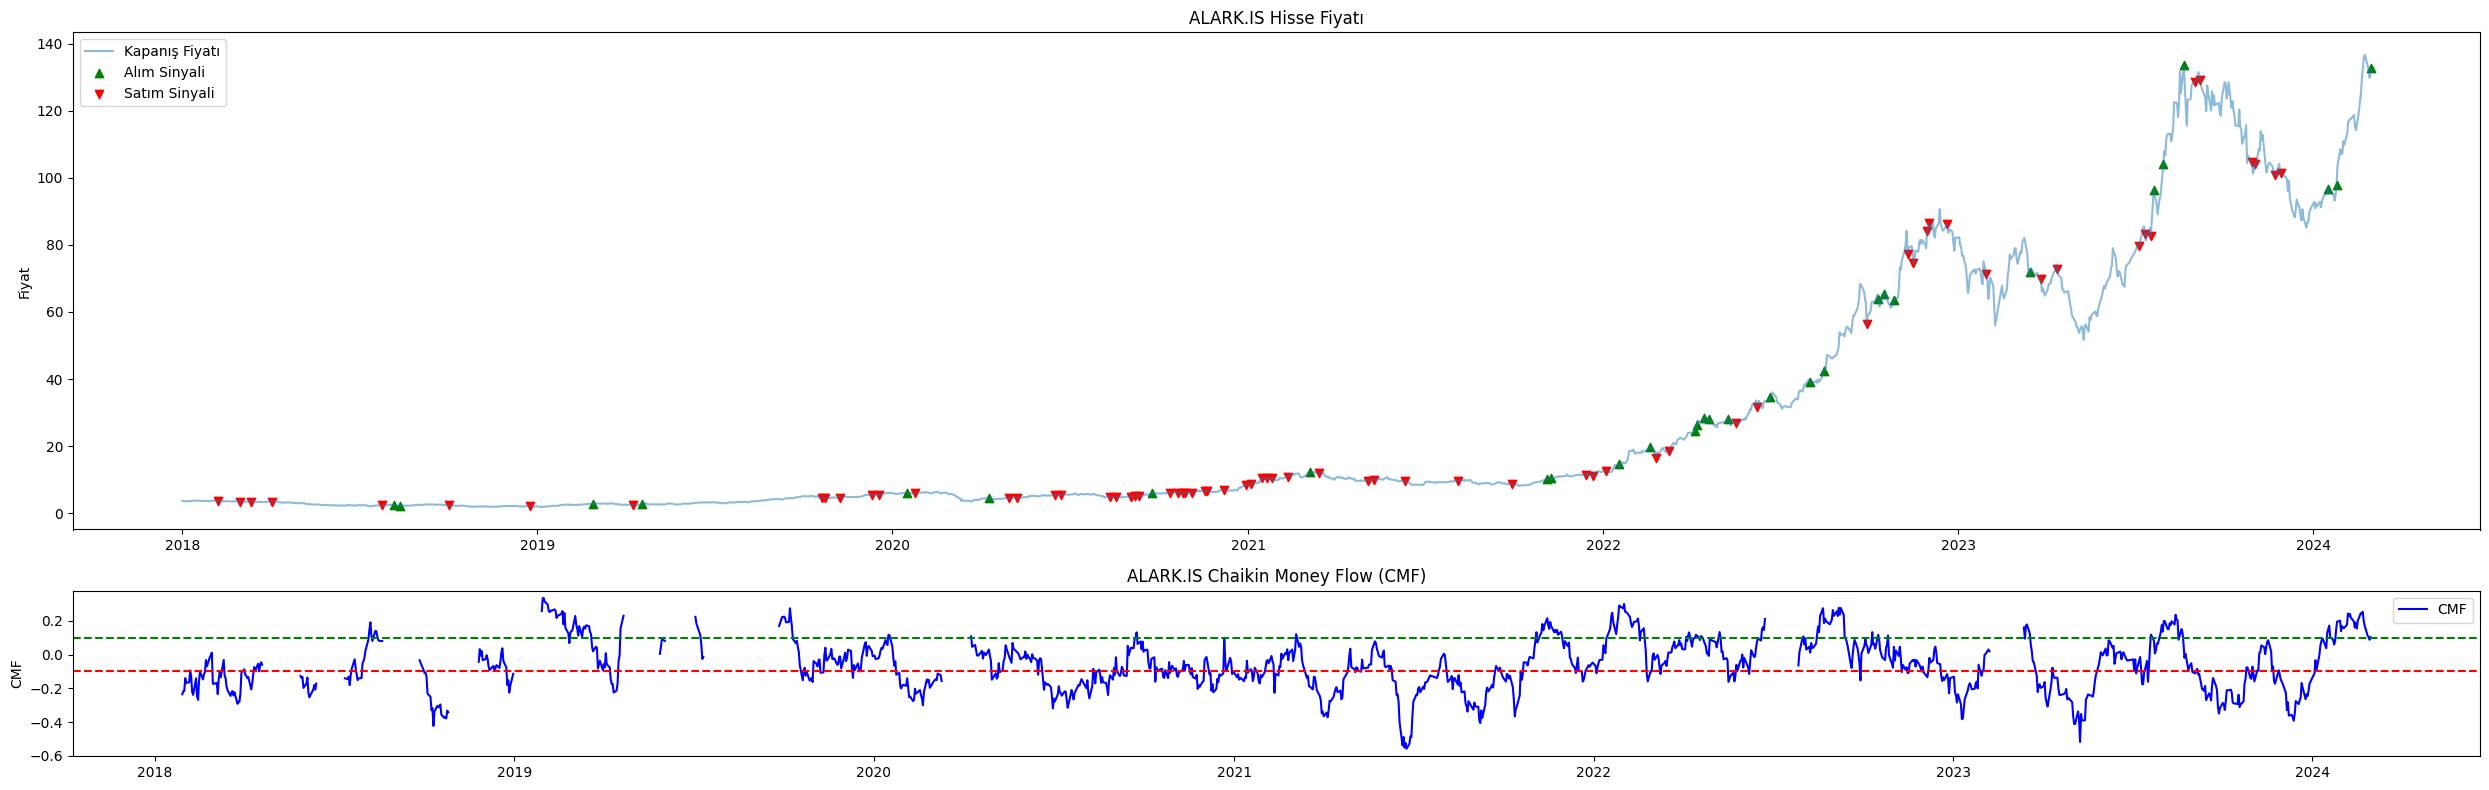

In [29]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_cmf(data, period=20):
    mfv = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low']) * data['Volume']
    cmf = mfv.rolling(window=period).sum() / data['Volume'].rolling(window=period).sum()
    return cmf

# data
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# CMF hesaplama
cmf_period = 20  # 20-day CMF
data['CMF'] = calculate_cmf(data, cmf_period)

# alım satım sinyalleri eşiklerinin belirlenmesi
buy_threshold = 0.10  # tanımla
sell_threshold = -0.10  # tanımla

# Alım Satım Sinyalleri Üretimi
buy_signal = (data['CMF'] > buy_threshold) & (data['CMF'].shift(1) <= buy_threshold)
sell_signal = (data['CMF'] < sell_threshold) & (data['CMF'].shift(1) >= sell_threshold)

# görsel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8), gridspec_kw={'height_ratios': [3, 1]})

# alım satım sinyalleri ve fiyat
ax1.plot(data['Close'], label='Kapanış Fiyatı', alpha=0.5)
ax1.scatter(data.index[buy_signal], data['Close'][buy_signal], label='Alım Sinyali', marker='^', color='green')
ax1.scatter(data.index[sell_signal], data['Close'][sell_signal], label='Satım Sinyali', marker='v', color='red')
ax1.set_title(f'{ticker} Hisse Fiyatı')
ax1.set_ylabel('Fiyat')
ax1.legend()

# CMF görsel alt
ax2.plot(data['CMF'], label='CMF', color='blue')
ax2.axhline(buy_threshold, color='green', linestyle='--')
ax2.axhline(sell_threshold, color='red', linestyle='--')
ax2.set_title(f'{ticker} Chaikin Money Flow (CMF)')
ax2.set_ylabel('CMF')
ax2.legend()

plt.tight_layout()
plt.show()

Görselleştirme, AAPL'nin kapanış fiyatını CMF ile birlikte gösteriyor; 20 günlük CMF, yeşil işaretçilerle satın alma sinyallerini (0,10'un üzerinde) ve kırmızı işaretçilerle satış sinyallerini (-0,10'un altında) gösteriyor. CMF'nin sıfır çizgisi etrafındaki salınımı piyasa duyarlılığındaki değişimleri vurguluyor.






Volume-Weighted Average Price (VWAP)



VWAP, bir hisse senedinin gün içerisinde işlem gördüğü ortalama fiyatı, hacme göre ağırlıklandırılarak verir. Her işlemin dolar değerinin toplanması (fiyatın işlem gören hisse sayısıyla çarpılması) ve ardından gün içinde işlem gören toplam hisse sayısına bölünmesiyle hesaplanır. VWAP'ın formülü şöyledir:

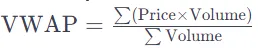

VWAP Formülü: Bir menkul kıymetin işlem gördüğü ortalama fiyatı, hacme göre ağırlıklandırılmış olarak hesaplar ve o gün için piyasa konsensüs fiyatını gösterir.
VWAP, yalnızca bir trade ölçütü olmanın ötesinde hizmet vermektedir; işlem günü boyunca fiyat ve hacmin dinamik bir değerlendirmesini sağlayarak piyasa duyarlılığına ilişkin derinlikli bir içgörü sunar.

VWAP'ın kritik ancak sıklıkla gözden kaçırılan bir yönü, kurumsal trade stratejilerindeki rolüdür. Büyük traderlar ve kurumsal yatırımcılar, işlemlerini gizlemek ve günlük VWAP fiyatını eşitlemeyi veya daha iyi hale getirmeyi hedefleyerek piyasa etkisini en aza indirmek için VWAP'ı kullanıyor.

Bu strateji, büyük orderların piyasayı çok fazla etkilememesini ve böylece uygun bir uygulama fiyatı elde edilmesini sağlar. Perakende traderlar için, işlemlerinin VWAP'ye göre nerede düştüğünü anlamak, kurumsal davranış ve piyasanın yönü hakkında ipuçları sunabilir.

[*********************100%%**********************]  1 of 1 completed

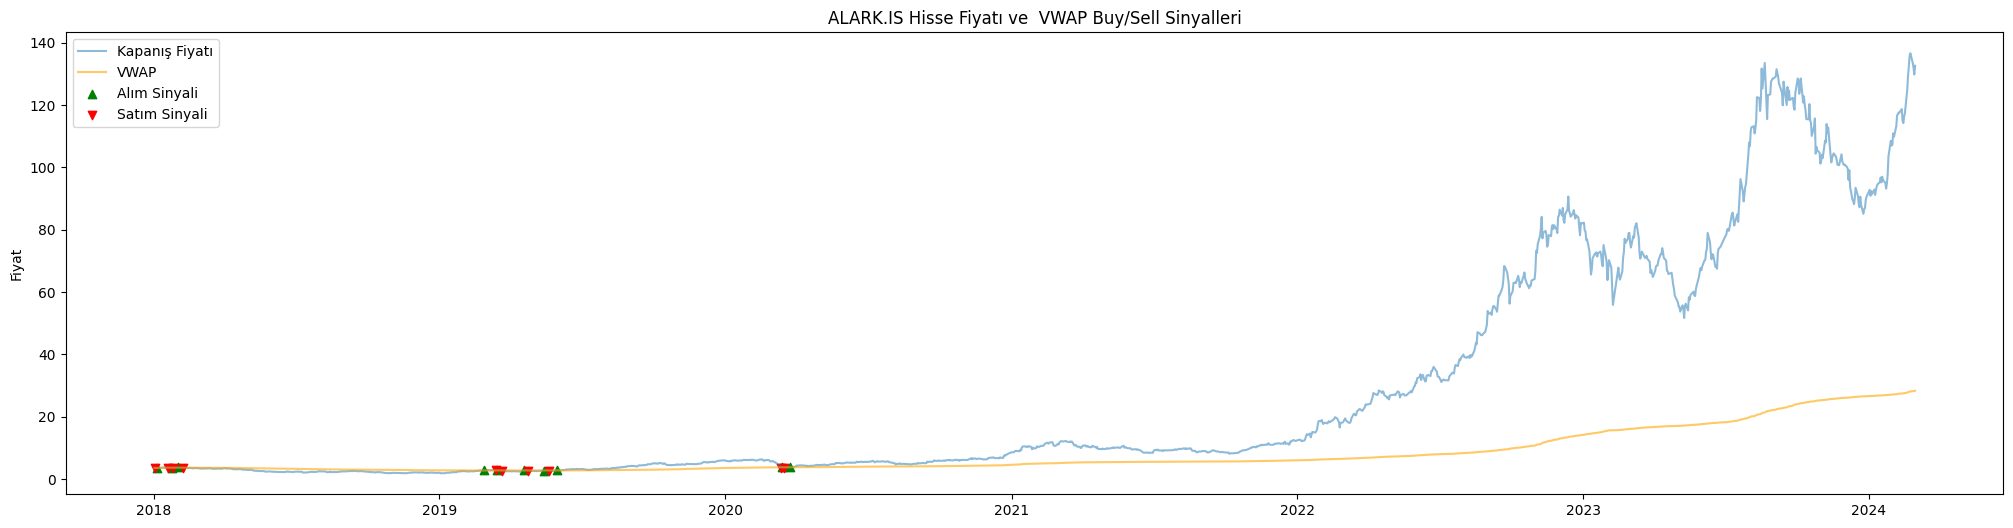

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_vwap(data):
    data['Cumulative_Volume_Price'] = (data['Close'] * data['Volume']).cumsum()
    data['Cumulative_Volume'] = data['Volume'].cumsum()
    vwap = data['Cumulative_Volume_Price'] / data['Cumulative_Volume']
    return vwap

#data
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# VWAP HEsaplama
data['VWAP'] = calculate_vwap(data)

# alım satım sinyal üretimi
buy_signal = (data['Close'] > data['VWAP']) & (data['Close'].shift(1) <= data['VWAP'].shift(1))
sell_signal = (data['Close'] < data['VWAP']) & (data['Close'].shift(1) >= data['VWAP'].shift(1))

# Plotting
plt.figure(figsize=(25, 6))
plt.plot(data['Close'], label='Kapanış Fiyatı', alpha=0.5)
plt.plot(data['VWAP'], label='VWAP', color='orange', alpha=0.6)
plt.scatter(data.index[buy_signal], data['Close'][buy_signal], label='Alım Sinyali', marker='^', color='green')
plt.scatter(data.index[sell_signal], data['Close'][sell_signal], label='Satım Sinyali', marker='v', color='red')
plt.title(f'{ticker} Hisse Fiyatı ve  VWAP Buy/Sell Sinyalleri')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

Grafik, hisse senedi fiyatlarının VWAP'a karşı günlük kapanış fiyatlarını gösterir; fiyat VWAP'ın üzerine çıktığında düşük değerlemeyi işaret eden satın alma sinyalleri (yeşil işaretçiler) ve aşağıyı geçtiğinde aşırı değerlemeyi gösteren satış sinyalleri (kırmızı işaretçiler) bulunur.

Accumulation/Distribution Line




A/D Hattı, hem hacmi hem de fiyat hareketini hesaba katarak, bir menkul kıymete giren veya çıkan kümülatif para akışını yansıtacak şekilde tasarlanmıştır.

Bunu, yakının yüksek-düşük aralığına ilişkisine göre -1 ile 1 arasında değişen Kapanış Lokasyonu Değerini (CLV) hesaplayarak yapar.

Formül, paranın hisse senedine girip girmediğini belirlemek için CLV'yi hacimle birleştirir. CLV ve A/D Hattının formülü şöyledir:

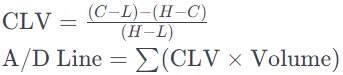

A/D Çizgisi Formülü: Kapanış konumu değerini (CLV) hacimle çarparak ve bu ürünü zaman içinde kümülatif olarak toplayarak stok içine veya stoktan çıkan para akışını hesaplar.

A/D Line'ın temel anlayışı, piyasa dinamiklerine ilişkin incelikli bir görünüm sunarak fiyat hareketinden farklılaşmasında yatmaktadır. A/D çizgisi ile fiyat farklılaştığında (örneğin, fiyat yeni zirveler belirlerken A/D çizgisi bunu başaramazsa), bu durum fiyat hareketinin hacim tarafından desteklenmediğini ve sürdürülemez olabileceğini, potansiyel olarak bir yükselişin önceden habercisi olabileceğini gösterir. 

Fiyat hareketleri ile hacim akışı arasındaki farklılıkları tespit etme yeteneği, yatırımcılara geri dönüşleri tespit etmek, eğilimleri onaylamak ve piyasa hareketlerinin temeldeki güçlü veya zayıf yönüne dayalı olarak daha bilinçli trade kararları vermek için bir erken uyarı sistemi sunar.

[*********************100%%**********************]  1 of 1 completed

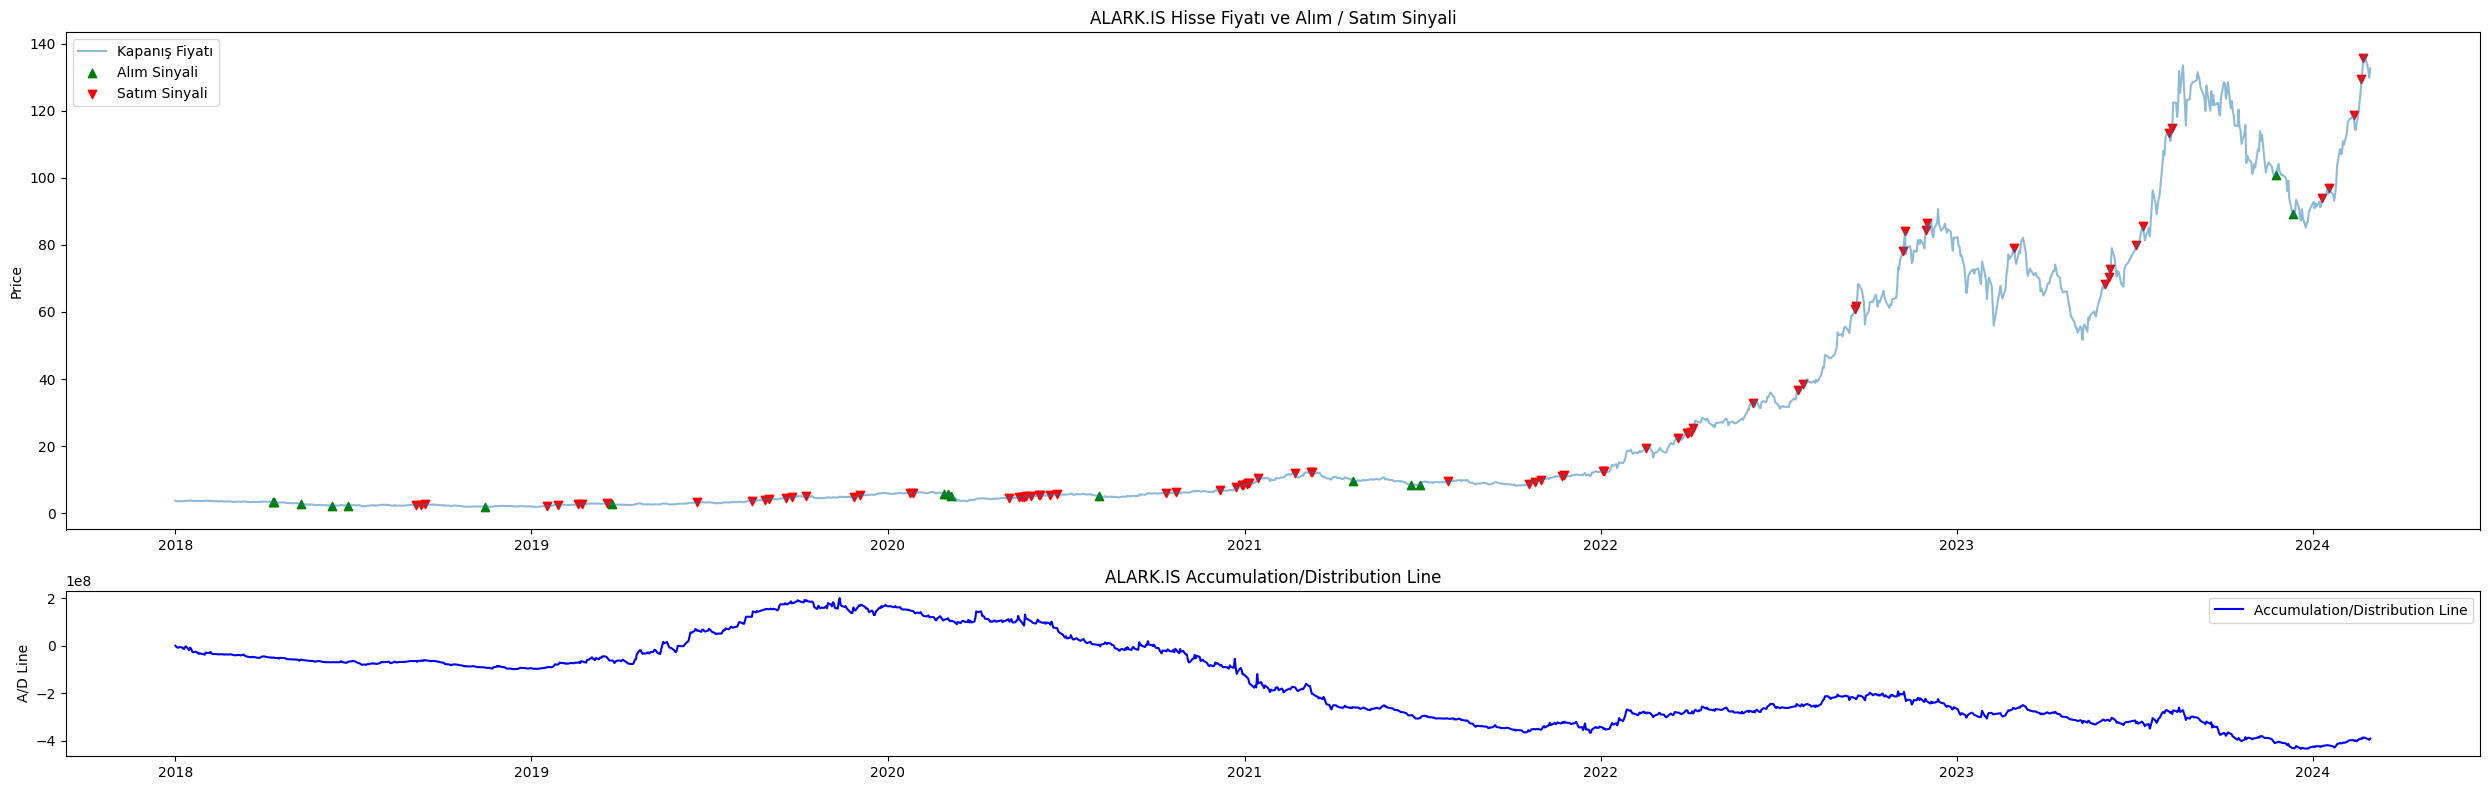

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_ad_line(data):
    clv = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low'])
    clv.fillna(0, inplace=True)  
    ad_line = (clv * data['Volume']).cumsum()
    return ad_line

# data
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# A/D Line Hesaplama
data['AD_Line'] = calculate_ad_line(data)

# 
lookback_period = 20  # örnek lookback periyodu
data['Rolling_Max'] = data['Close'].rolling(window=lookback_period).max()
data['Rolling_Min'] = data['Close'].rolling(window=lookback_period).min()

# Detect divergences for buy and sell signals
buy_signal = (data['Close'] == data['Rolling_Min']) & (data['AD_Line'] > data['AD_Line'].shift(1))
sell_signal = (data['Close'] == data['Rolling_Max']) & (data['AD_Line'] < data['AD_Line'].shift(1))

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8), gridspec_kw={'height_ratios': [3, 1]})

# alım satım sinyalleri
ax1.plot(data['Close'], label='Kapanış Fiyatı', alpha=0.5)
ax1.scatter(data.index[buy_signal], data['Close'][buy_signal], label='Alım Sinyali', marker='^', color='green')
ax1.scatter(data.index[sell_signal], data['Close'][sell_signal], label='Satım Sinyali', marker='v', color='red')
ax1.set_title(f'{ticker} Hisse Fiyatı ve Alım / Satım Sinyali')
ax1.set_ylabel('Price')
ax1.legend()

# A/D Line subplot
ax2.plot(data['AD_Line'], label='Accumulation/Distribution Line', color='blue')
ax2.set_title(f'{ticker} Accumulation/Distribution Line')
ax2.set_ylabel('A/D Line')
ax2.legend()

plt.tight_layout()
plt.show()

Grafik, potansiyel alım (yeşil işaretleyiciler) veya satış (kırmızı işaretleyiciler) noktalarına işaret eden farklılıkları tanımlayan A/D Çizgisi yanında hisse senedi fiyatını görüntüler. Fiyat ile A/D Hattı arasındaki bu farklılıklar, yalnızca fiyattan anlaşılamayan temel güç veya zayıflığın göstergesi olabilir.

Money Flow Index (MFI)




MFI, bir varlık üzerindeki alım veya satım baskısını değerlendirmek için fiyat ve hacmi birleştiren teknik bir momentum göstergesidir. Belirli bir süre boyunca, genellikle 14 gün boyunca pozitif ve negatif para akışının (para akışı tipik fiyat ve hacmin ürünüdür) bir oranı oluşturularak hesaplanır. MFI'nin formülü şu şekildedir:

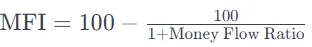

MFI Formülü: Aşırı alım veya aşırı satım koşullarını işaret etmek için 0 ile 100 arasında salınan, pozitif para akışının negatif para akışına oranı kullanılarak hesaplanan, hacim ağırlıklı bir momentum göstergesi.

MFI'nin hacmi momentum hesaplamasına entegre etmesi, fiyat hareketlerinin gücü hakkında bilgi sağlayarak benzersiz bir avantaj sunar.

Önemli bir görüş, yüksek MFI değerlerinin (80'in üzerinde) yalnızca aşırı alım koşullarını göstermekle kalmayıp, artan hacimle ortaya çıktığında, yükseliş eğilimini beklenenden daha uzun süre sürdürebilecek güçlü satın alma baskısını da gösterebileceğidir.

MFI'nin piyasa duyarlılığındaki değişiklikleri fiyat hareketlerinde açıkça ortaya çıkmadan önce yansıtma yeteneği, onu geri dönüşleri tahmin etmek ve trendin gücünü teyit etmek için değerli bir araç haline getiriyor ve yatırımcılara piyasa dinamikleri hakkında daha derin bir anlayış sunuyor.

[*********************100%%**********************]  1 of 1 completed


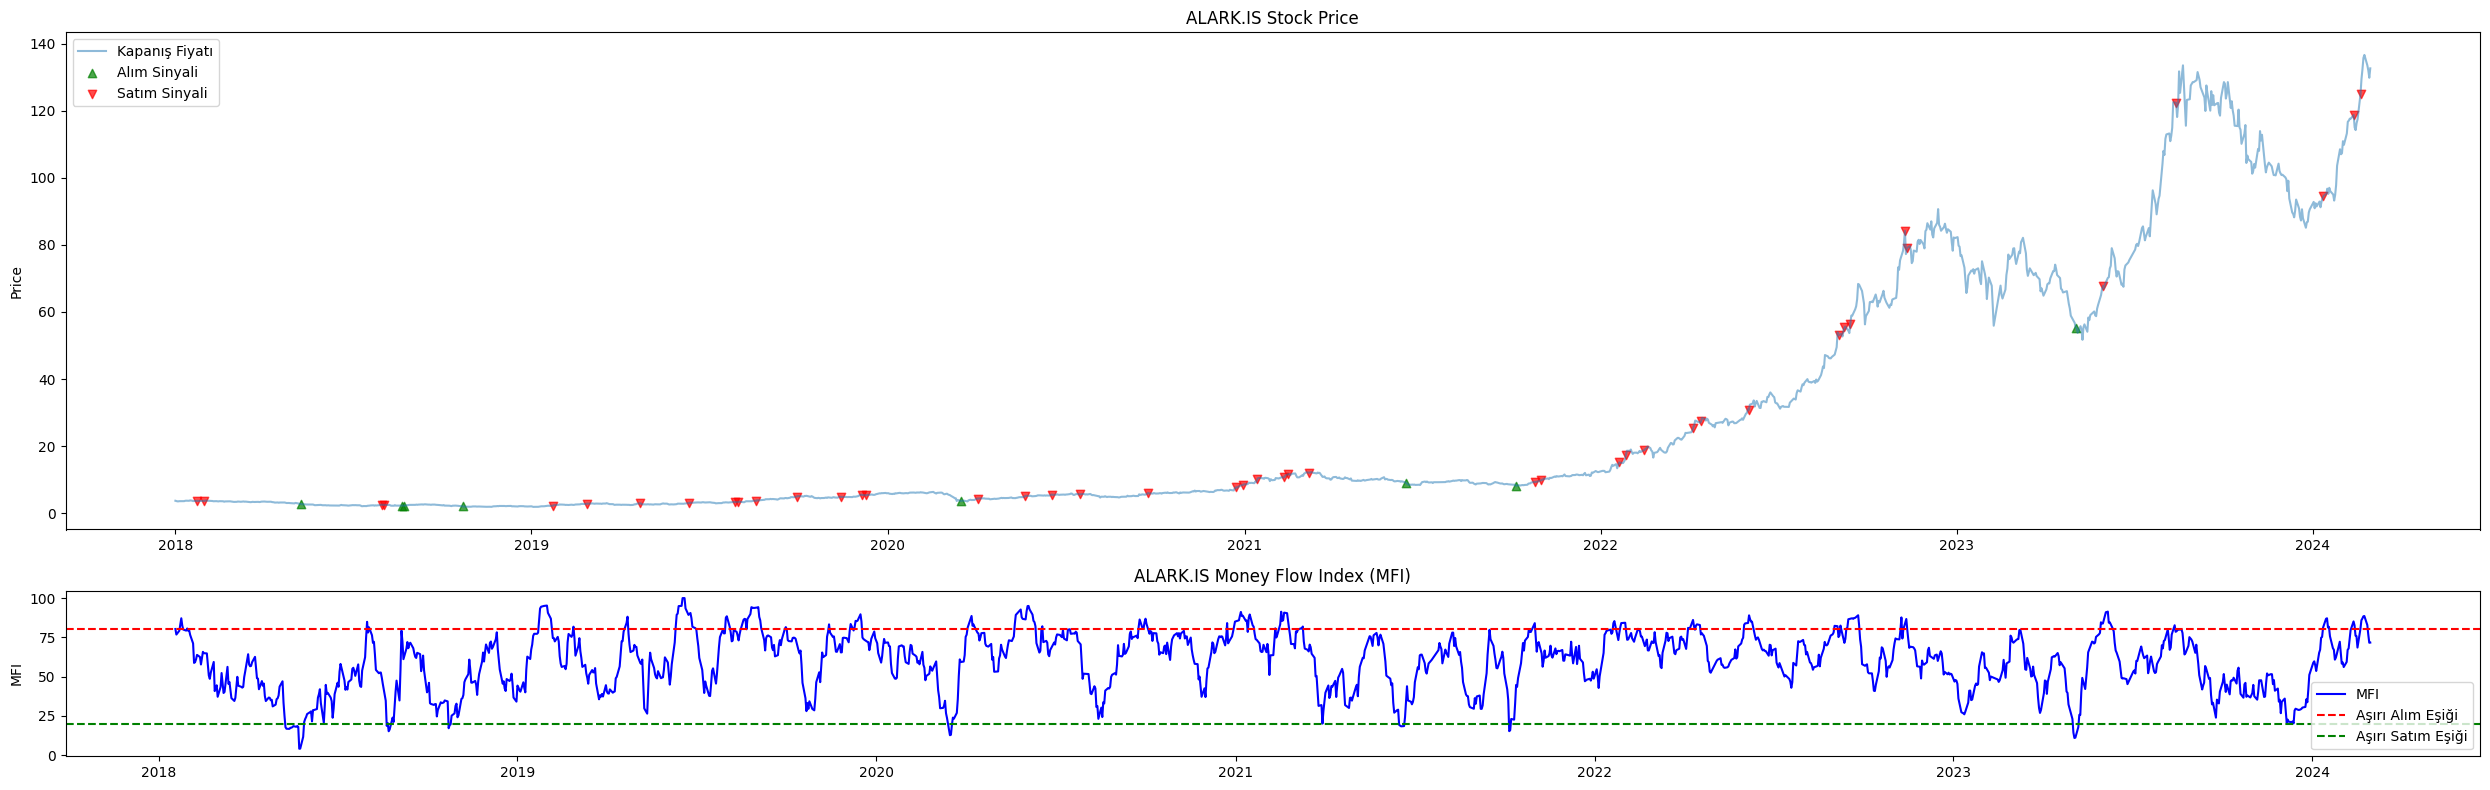

In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_mfi(data, period=14):
    high = data['High']
    low = data['Low']
    close = data['Close']
    volume = data['Volume']
    typical_price = (high + low + close) / 3
    money_flow = typical_price * volume
    
    positive_flow = money_flow.where(typical_price > typical_price.shift(1), 0)
    negative_flow = money_flow.where(typical_price < typical_price.shift(1), 0)
    
    positive_mf_sum = positive_flow.rolling(window=period).sum()
    negative_mf_sum = negative_flow.rolling(window=period).sum()
    
    mfi_ratio = positive_mf_sum / (negative_mf_sum + 1e-10)  
    mfi = 100 - (100 / (1 + mfi_ratio))
    return mfi

# data
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# MFI hesaplama
mfi_period = window_size
data['MFI'] = calculate_mfi(data, mfi_period)

# alım satım sinyallleri için eşikler
overbought_threshold = 80
oversold_threshold = 20

# alım satım sinyallerinin belirlenmesi
buy_signal = (data['MFI'] < oversold_threshold) & (data['MFI'].shift(1) >= oversold_threshold)
sell_signal = (data['MFI'] > overbought_threshold) & (data['MFI'].shift(1) <= overbought_threshold)

# görsel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8), gridspec_kw={'height_ratios': [3, 1]})

# hisse fiyatı ve alım satım sinyalleri
ax1.plot(data.index, data['Close'], label='Kapanış Fiyatı', alpha=0.5)
ax1.scatter(data.index[buy_signal], data['Close'][buy_signal], label='Alım Sinyali', marker='^', color='green', alpha=0.7)
ax1.scatter(data.index[sell_signal], data['Close'][sell_signal], label='Satım Sinyali', marker='v', color='red', alpha=0.7)
ax1.set_title(f'{ticker} Stock Price')
ax1.set_ylabel('Price')
ax1.legend()

# MFI alt görsel
ax2.plot(data.index, data['MFI'], label='MFI', color='blue')
ax2.axhline(overbought_threshold, color='red', linestyle='--', label='Aşırı Alım Eşiği')
ax2.axhline(oversold_threshold, color='green', linestyle='--', label='Aşırı Satım Eşiği')
ax2.set_title(f'{ticker} Money Flow Index (MFI)')
ax2.set_ylabel('MFI')
ax2.legend()

plt.tight_layout()
plt.show()

Grafik, MFI eşiklerine göre aşırı alım (80'in üstü) ve aşırı satış (20'nin altında) koşullarını karşılık gelen satın alma (yeşil işaretçiler) ve satış (kırmızı işaretçiler) sinyalleriyle tanımlayan aşağıdaki MFI göstergesiyle hisse senedi fiyatını göstermektedir.

Klinger Oscillator



Klinger Osilatörü, bir menkul kıymete giren ve çıkan uzun vadeli para akışını tahmin etmek ve aynı zamanda kısa vadeli dalgalanmalara karşı duyarlı olmak üzere tasarlanmıştır.

Hacim kuvvetinin 55 dönemlik üstel hareketli ortalamasının (EMA), hacim kuvvetinin 34 dönemlik EMA'sından çıkarılmasıyla hesaplanır. Hacim kuvvetinin kendisi, trendin yönü dikkate alınarak hacmin birikmesi ve dağılımından elde edilir.

Klinger Osilatörünün benzersiz katkısı, hem para akışının uzun vadeli eğilimini hem de hacimdeki kısa vadeli dalgalanmaları yakalamaya yönelik ikili odağında yatmaktadır. Bu ikili odak, pazar dinamiklerine ilişkin kapsamlı bir görünüm sunmasına olanak tanır.

Önemli bir içgörü, KO'nun hacim eğilimleri ile fiyat hareketleri arasındaki farklılıkları tespit ederek potansiyel geri dönüşlere ilişkin erken uyarılar sunabilmesidir. Örneğin, KO fiyat eğiliminden ayrılmaya başladığında, bu durum mevcut fiyat hareketinin hacim tarafından desteklenmediğini gösterebilir, bu da eğilimin zayıfladığını ve olası bir tersine dönüşe işaret edebilir.

[*********************100%%**********************]  1 of 1 completed

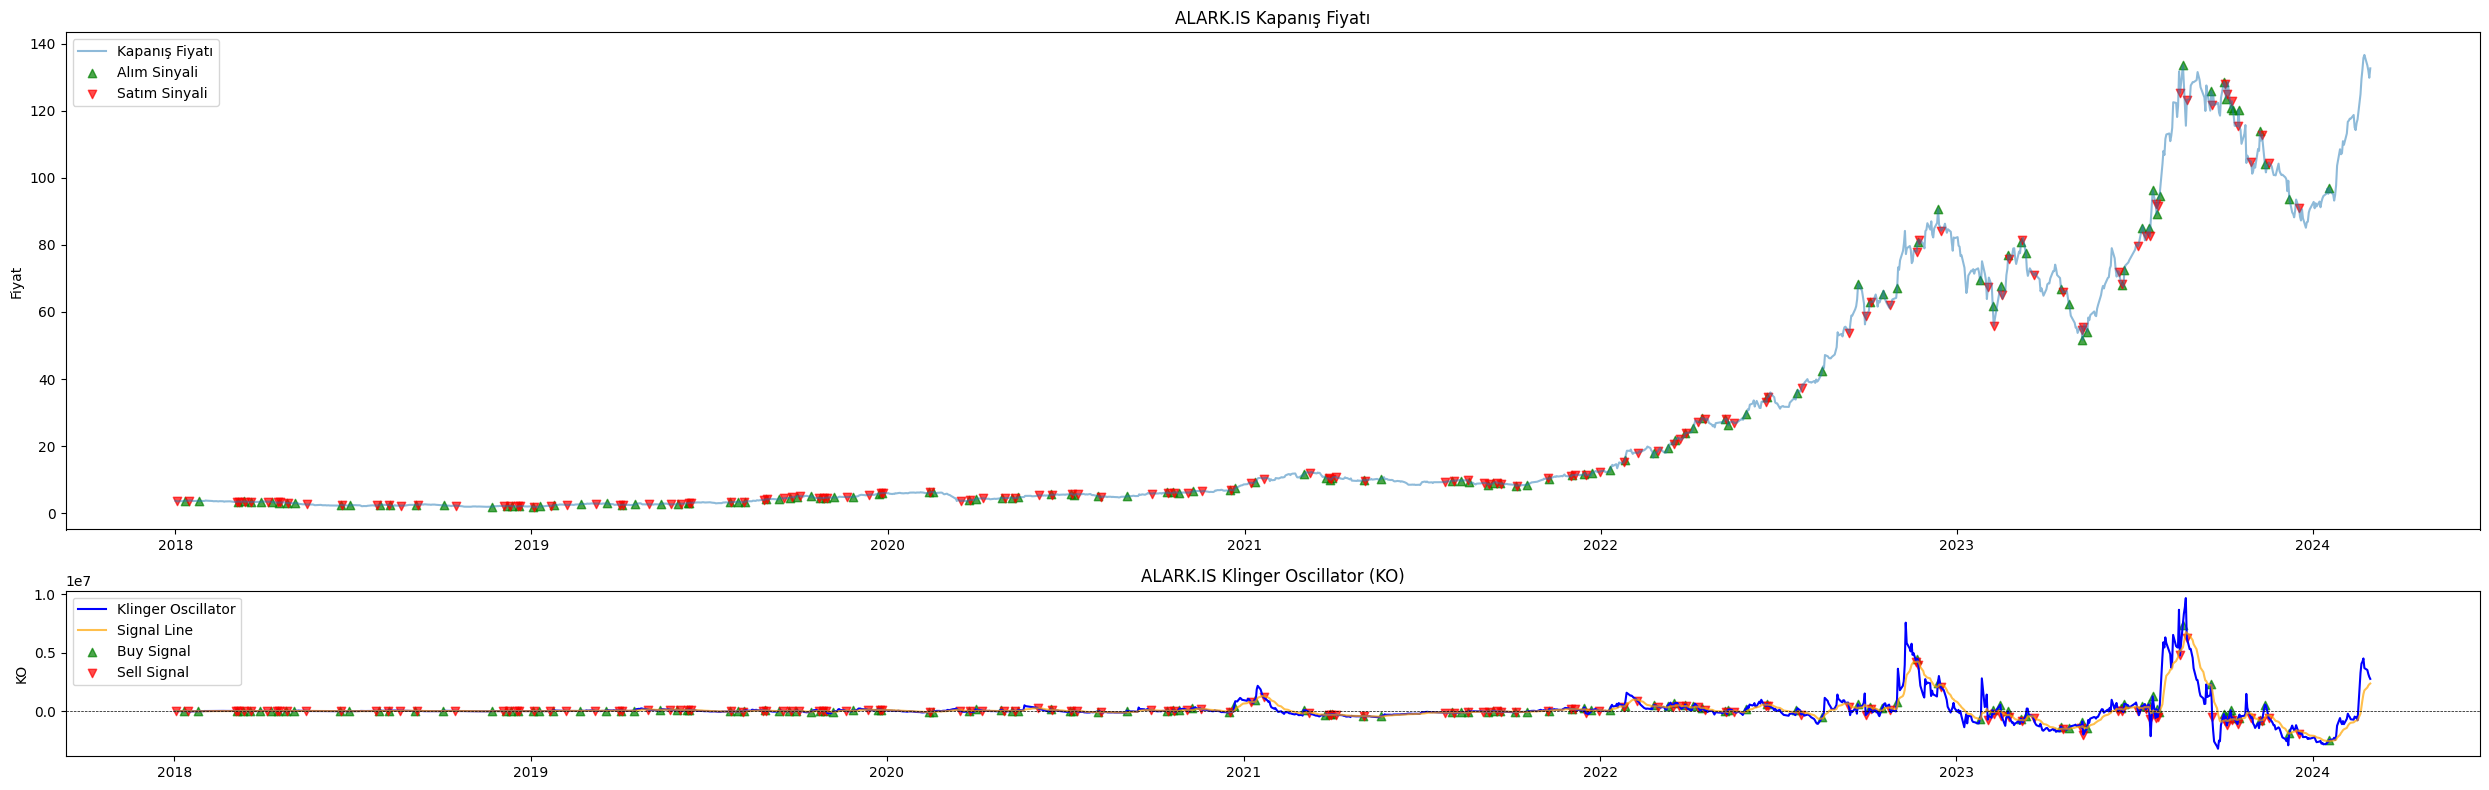

In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_klinger_oscillator(data, fast_period=34, slow_period=55):
    # Hacim Gücünün Hesaplanması
    dm = ((data['High'] + data['Low']) / 2) - ((data['High'].shift(1) + data['Low'].shift(1)) / 2)
    cm = data['Close'] - data['Close'].shift(1)
    vf = dm * data['Volume'] * cm / dm.abs()
    
    # hızlı ve yavaş EMAs VF  
    ko = vf.ewm(span=fast_period).mean() - vf.ewm(span=slow_period).mean()
    return ko

# data
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# KO Hesaplama
data['KO'] = calculate_klinger_oscillator(data)

# Sinyalin oluşturulması (EMA of KO)
signal_line_period = 13  # sinyal çizgisi periyodu
data['KO_Signal'] = data['KO'].ewm(span=signal_line_period).mean()

# alım satım sinyallerinin oluşturulmasu
buy_signal = (data['KO'] > data['KO_Signal']) & (data['KO'].shift(1) <= data['KO_Signal'].shift(1))
sell_signal = (data['KO'] < data['KO_Signal']) & (data['KO'].shift(1) >= data['KO_Signal'].shift(1))

# görsel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8), gridspec_kw={'height_ratios': [3, 1]})

# hisse fiyatı ve alım satım sinyalleri
ax1.plot(data.index, data['Close'], label='Kapanış Fiyatı', alpha=0.5)
ax1.scatter(data.index[buy_signal], data['Close'][buy_signal], label='Alım Sinyali', marker='^', color='green', alpha=0.7)
ax1.scatter(data.index[sell_signal], data['Close'][sell_signal], label='Satım Sinyali', marker='v', color='red', alpha=0.7)
ax1.set_title(f'{ticker} Kapanış Fiyatı')
ax1.set_ylabel('Fiyat')
ax1.legend()

# KO subplot
ax2.plot(data.index, data['KO'], label='Klinger Oscillator', color='blue')
ax2.plot(data.index, data['KO_Signal'], label='Signal Line', color='orange', alpha=0.7)
ax2.scatter(data.index[buy_signal], data['KO'][buy_signal], label='Buy Signal', marker='^', color='green', alpha=0.7)
ax2.scatter(data.index[sell_signal], data['KO'][sell_signal], label='Sell Signal', marker='v', color='red', alpha=0.7)
ax2.set_title(f'{ticker} Klinger Oscillator (KO)')
ax2.set_ylabel('KO')
ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax2.legend()

plt.tight_layout()
plt.show()

Grafik, Klinger Osilatörü ve sinyal hattının yanı sıra hisse senedi fiyat hareketlerini vurguluyor ve KO'nun sinyal hattını geçmesi üzerine alım (yeşil) ve satış (kırmızı) sinyallerini gösteriyor. Bu, osilatörün trend yönünü ve tersine dönüşleri belirlemedeki rolünü göstermektedir.

Negative Volume Index


NVI, bir önceki seansa göre hacim azaldığında artan ve “akıllı paranın” aktif olduğunu düşündüren kümülatif bir göstergedir.

NVI, temel bir değerden (genellikle 1000'e ayarlanır) başlar ve yalnızca hacim düzeyinin önceki güne göre azaldığı günlerde ayarlanır. Hacmin düşük olduğu bir günde kapanış fiyatı artarsa NVI, fiyattaki yüzde değişim oranında yukarı doğru ayarlanır. Daha düşük hacimli günlerde NVI'yı ayarlama formülü şöyledir:

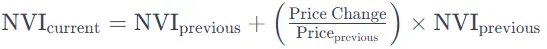

NVI Formülü: Fiyattaki yüzde değişime dayalı bir temel değer ayarlayarak, akıllı para faaliyeti varsayılarak düşük hacimli günlerdeki fiyat hareketlerini izler.


NVI'nın temel varsayımı (akıllı paranın daha sessiz trade dönemlerinde daha gizli çalıştığı) yalnızca fiyat analiziyle görülemeyebilecek erken birikim veya dağıtım işaretlerinin tespit edilmesinde stratejik bir avantaj sağlar.

Burada önemli bir fikir, hacmin azaldığı dönemlerde NVI'daki yükseliş eğiliminin, genellikle piyasada daha geniş tanınırlığa ve potansiyel bir yükseliş eğilimine öncülük eden, bilgili yatırımcılar tarafından gizli birikime işaret edebileceğidir.

NVI trendlerinin önemi, genel piyasa trendinden uzaklaşıldığında özellikle anlamlı hale gelir ve fiyat hareketleri yoluyla belirginleşmeden önce piyasa duyarlılığındaki değişimlere işaret edebilen zıt bir görünüm sunar.

[*********************100%%**********************]  1 of 1 completed


C:\Users\alp\AppData\Local\Temp\ipykernel_44548\2140754553.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NVI'][0] = nvi
C:\Users\alp\AppData\Local\Temp\ipykernel_44548\2140754553.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NVI'][i] = nvi


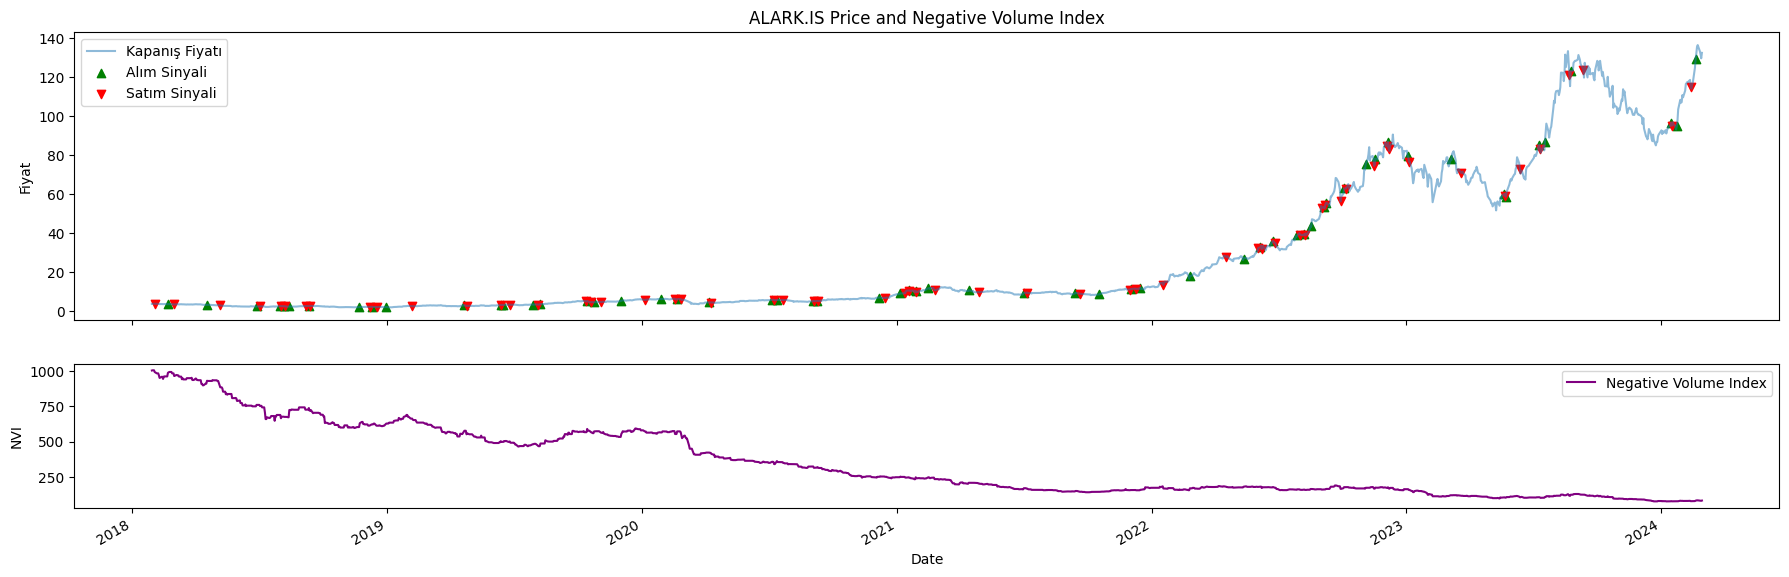

In [34]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def negative_volume_index(data):
    data['NVI'] = np.nan
    nvi = 1000  # NVI başlangış değeri
    data['NVI'][0] = nvi

    for i in range(1, len(data)):
        if data['Volume'][i] < data['Volume'][i - 1]:
            nvi += (data['Close'][i] - data['Close'][i - 1]) / data['Close'][i - 1] * nvi
        data['NVI'][i] = nvi

    return data

def generate_nvi_signals(data, window):
    data['NVI_SMA'] = data['NVI'].rolling(window=window).mean()
    buy_signals = []
    sell_signals = []

    for i in range(window, len(data)):
        if data['NVI'][i] > data['NVI_SMA'][i] and data['NVI'][i - 1] <= data['NVI_SMA'][i - 1]:
            buy_signals.append((data.index[i], data['Close'][i]))
        elif data['NVI'][i] < data['NVI_SMA'][i] and data['NVI'][i - 1] >= data['NVI_SMA'][i - 1]:
            sell_signals.append((data.index[i], data['Close'][i]))

    return buy_signals, sell_signals

def plot_nvi(data, buy_signals, sell_signals, window):
    fig, (ax1, ax2) = plt.subplots(2, figsize=(22, 7), gridspec_kw={'height_ratios': [2, 1]})
    fig.autofmt_xdate()

    ax1.plot(data['Close'][window:], label='Kapanış Fiyatı', alpha=0.5)

    buy_dates, buy_prices = zip(*buy_signals)
    sell_dates, sell_prices = zip(*sell_signals)

    ax1.scatter(buy_dates, buy_prices, marker='^', color='g', label='Alım Sinyali')
    ax1.scatter(sell_dates, sell_prices, marker='v', color='r', label='Satım Sinyali')

    ax1.set_title(f'{tickers} Price and Negative Volume Index')
    ax1.set_ylabel('Fiyat')
    ax1.legend(loc='best')

    ax2.plot(data['NVI'][window:], label='Negative Volume Index', color='purple')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('NVI')
    ax2.legend(loc='best')

    plt.show()

# data
ticker = tickers
df = yf.download(ticker, start=start_date, end=end_date)

# NVI hesaplama
df = negative_volume_index(df)

# Gbelirlenen süre için NVI bazında laım satım sinyalleri ve sma oluşturma
window = 20
buy_signals, sell_signals = generate_nvi_signals(df, window)

# alım satım sinyalleri ve sonuçları raporlama
plot_nvi(df, buy_signals, sell_signals, window)

Grafik, NVI ile birlikte hisse senedi fiyatını ve 20 günlük hareketli ortalamasını gösteriyor; NVI ortalamanın üzerine çıktığında satın alma sinyallerini (yeşil işaretçiler) ve aşağısını geçtiğinde satış sinyallerini (kırmızı işaretçiler) vurguluyor. Bu, NVI'nın hacim değişikliklerine ve fiyat hareketlerine dayalı eğilimleri belirlemedeki faydasını yansıtıyor.

Göstergelerin Karşılaştırılması 
tradete hacim göstergelerini akıllıca kullanmak, onların benzersiz öngörülerini ve farklı piyasa senaryolarına nasıl uyum sağladıklarını tanımaya bağlıdır.

Her gösterge piyasanın belirli yönlerine ışık tutarak, bazılarının devam eden eğilimleri teyit etmede daha iyi olmasını sağlarken, diğerleri olası geri dönüşlere dair ipuçları vermede başarılı oluyor.

3.1 Trend Onayı ve Geri Dönüş Sinyalleri

Denge Hacmi (OBV) ve Hacim Ağırlıklı Ortalama Fiyat (VWAP) gibi göstergeler bir trendin gücünü doğrulamak için mükemmeldir. Örneğin, yükselen bir OBV'nin eşlik ettiği fiyattaki yükseliş eğilimi, güçlü bir eğilime işaret ediyor.
Tersine, Para Akışı Endeksi (MFI) ve Negatif Hacim Endeksi (NVI) gibi göstergeler potansiyel geri dönüşlerin sinyallerini verme konusunda daha beceriklidir. Hacim ağırlıklı RSI'ya benzeyen MFI, aşırı alım veya aşırı satım koşullarına duyarlıdır ve çoğu zaman olası bir tersine dönüşün sinyalini verir.

3.2 Kısa Vadeli ve Uzun Vadeli Analiz

Klinger Osilatörü ve Hacim Değişim Oranı (VROC) kısa vadeli piyasa hareketlerine daha duyarlıdır. Trend değişikliklerinin veya piyasa duyarlılığındaki kısa vadeli dalgalanmaların erken sinyallerini sağlayabilirler.
Öte yandan, Biriktirme/Dağıtım Hattı gibi göstergeler daha geniş bir bakış açısına sahip olup, uzun dönemler boyunca daha geniş piyasa eğilimlerinin belirlenmesine yardımcı olur.

3.3 Doğrudan Hacim Analizi ve Fiyat-Hacim İlişkisi

VROC ve OBV gibi bazı göstergeler doğrudan hacim değişikliklerine odaklanır. Örneğin VROC, hacim değişikliklerinin hızını ölçmek için mevcut hacmi geçmiş hacimle karşılaştırır; bu, ticari faaliyetlerdeki ani artışların tespit edilmesinde faydalıdır.
Hacim Fiyat Trendi (VPT) ve Chaikin Para Akışı (CMF) gibi diğerleri, hacim ile fiyat değişiklikleri arasındaki ilişkiyi analiz eder. Örneğin VPT, hacim değişikliklerinin fiyat hareketleriyle nasıl ilişkili olduğunu anlamaya yardımcı olur ve bir trendin gücünü doğrulamak için faydalıdır.

3.4 Kümülatif ve Salınımlı Doğa

OBV ve Biriktirme/Dağıtım Hattı kümülatiftir, yani zaman içindeki fiyat hareketlerine göre hacim ekler veya çıkarırlar. Bu kümülatif doğa, onları uzun vadeli para akışı eğilimlerini anlama konusunda güçlü kılar.
Klinger Osilatörü ve MFI gibi salınımlı göstergeler sabit bir aralıkta hareket ederek aşırı alım veya aşırı satım koşullarını daha acil bir bağlamda belirlemede faydalı olurlar.

4. Pratik Uygulama ve Sınırlamalar

Hacim göstergelerinin tradete pratik uygulaması, yatırımcılara değerli bilgiler sağlar, ancak bunların sınırlamalarının da farkında olmak önemlidir.

4.1 Pratik Uygulama

Gelişmiş İçgörüler için Göstergeleri Birleştirme

Daha kapsamlı bir analiz için göstergelerin bir kombinasyonunu kullanın. Örneğin, trendin gücünü ve olası geri dönüşleri doğrulamak için OBV veya VWAP'yi MFI ile eşleştirin. OBV trend yönünü gösterebilirken, MFI aşırı alım veya aşırı satım koşullarını işaret edebilir.

Bağlamsal Analiz

Her zaman daha geniş pazar bağlamını göz önünde bulundurun. Örneğin, VROC hacimde bir artış sinyali verebilir, ancak piyasa eğilimleri veya haber olayları dikkate alınmadan sinyal yanıltıcı olabilir. Daha güvenilir bilgiler için hacim göstergelerini temel veya teknik analizle eşleştirin.

Risk yönetimi

Hacim göstergelerini risk yönetimi stratejinizin bir parçası olarak kullanın. Örneğin, uzun bir pozisyon düşünüyorsanız ancak Birikim/Dağıtım Hattında bir düşüş görünüyorsa, bu daha sıkı zararı durdurma emirleri belirlemenin bir sinyali olabilir.

Algoritmik trade

Hacim göstergelerini algoritmik trade stratejilerine entegre edin. Örneğin, fiyat VWAP'ın üzerinde olduğunda ve OBV yükseliş eğiliminde olduğunda, güçlü bir satın alma baskısının göstergesi olduğunda satın alma sinyalleri oluşturun.

4.2 Sınırlamalar
Gecikmeli Doğa

Hacim göstergelerinin çoğu gecikmeli, yani geçmiş verilere dayanıyor. Gelecekteki piyasa hareketlerini doğru bir şekilde tahmin edemeyebilirler ve geri dönüş sinyali vermede yavaş olabilirler.

Yanlış Sinyaller

Tüm göstergeler gibi hacim göstergeleri de yanlış sinyaller verebilir. Hacimdeki ani bir artış her zaman önemli bir fiyat hareketine yol açmayabilir. Sinyalleri diğer göstergeler veya analiz yöntemleriyle doğrulamak çok önemlidir.

Birim Veri Kalitesi

Hacim göstergelerinin güvenilirliği büyük ölçüde hacim verilerinin kalitesine bağlıdır. Yanlış veya eksik hacim verileri yanıltıcı sonuçlara yol açabilir.

Pazara Özel Davranışlar

Hacim göstergeleri çeşitli piyasalarda (hisse senetleri, forex, vadeli işlemler) farklı davranabilir. Bu göstergelerin, işlem yaptığınız spesifik pazarda nasıl performans gösterdiğini anlamak çok önemlidir.

Average True Range (ATR)



ATR, fiyat hareketleri aralığının ortalamasını alarak piyasa oynaklığını ölçer. Yüksek bir ATR, genellikle piyasanın zirve, dip veya kırılma dönemlerinde görülen artan piyasa oynaklığını gösterir.

ATR genellikle zararı durdurma emirlerini belirlemek için kullanılır. Örneğin, bir tüccar, volatiliteyi dengelemek için mevcut fiyatın ATR'sinin 1,5 katı altındaki bir noktada zararı durdurma emrini belirleyebilir.

Ayrıca artan ATR'nin trendin gücünü güçlendirebileceği trend takip stratejilerinde de kullanılır. ATR formülü şu şekilde verilir:

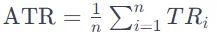

Average True Range (ATR) formülü, n dönem boyunca gerçek aralıkların ortalamasını alarak piyasa oynaklığını hesaplar.

n, hareketli ortalama için kullanılan dönem sayısıdır,

TRi​, i periyodu için gerçek aralıktır ve bu, aşağıdakilerin maksimumudur:

Cari dönemin en yüksek ve en düşük değerleri arasındaki fark,
Önceki kapanış ile mevcut yüksek seviye arasındaki fark,
Önceki kapanış ile mevcut düşük seviye arasındaki fark.
Yüksek bir ATR, genellikle piyasanın zirve, dip veya kırılma dönemlerinde görülen artan piyasa oynaklığını gösterir.

Ortalama Gerçek Aralığı (ATR) kullanmanın hemen göze çarpmayabilecek anlayışlı bir yönü, risk yönetimi ve pozisyon boyutlandırma stratejilerindeki uyarlanabilir doğasıdır.

Sabit dolar veya yüzde bazlı zarar durdurmanın aksine ATR, yatırımcıların risk yönetimi eşiklerini piyasa oynaklığına göre ayarlamasına olanak tanır.

Bu, volatilitenin yüksek olduğu dönemlerde, zararı durdur emirlerinin, normal piyasa dalgalanmaları nedeniyle zamanından önce durdurulmasını önlemek için mevcut fiyattan daha uzağa ayarlanacağı anlamına gelir.

Ayrıca ATR, konum boyutlandırmada etkili olabilir. Yatırımcılar, piyasanın bir pozisyona karşı potansiyel olarak ne kadar hareket edebileceğini belirleyerek pozisyonlarının büyüklüğünü mevcut volatiliteye göre ayarlayabilirler.

[*********************100%%**********************]  1 of 1 completed


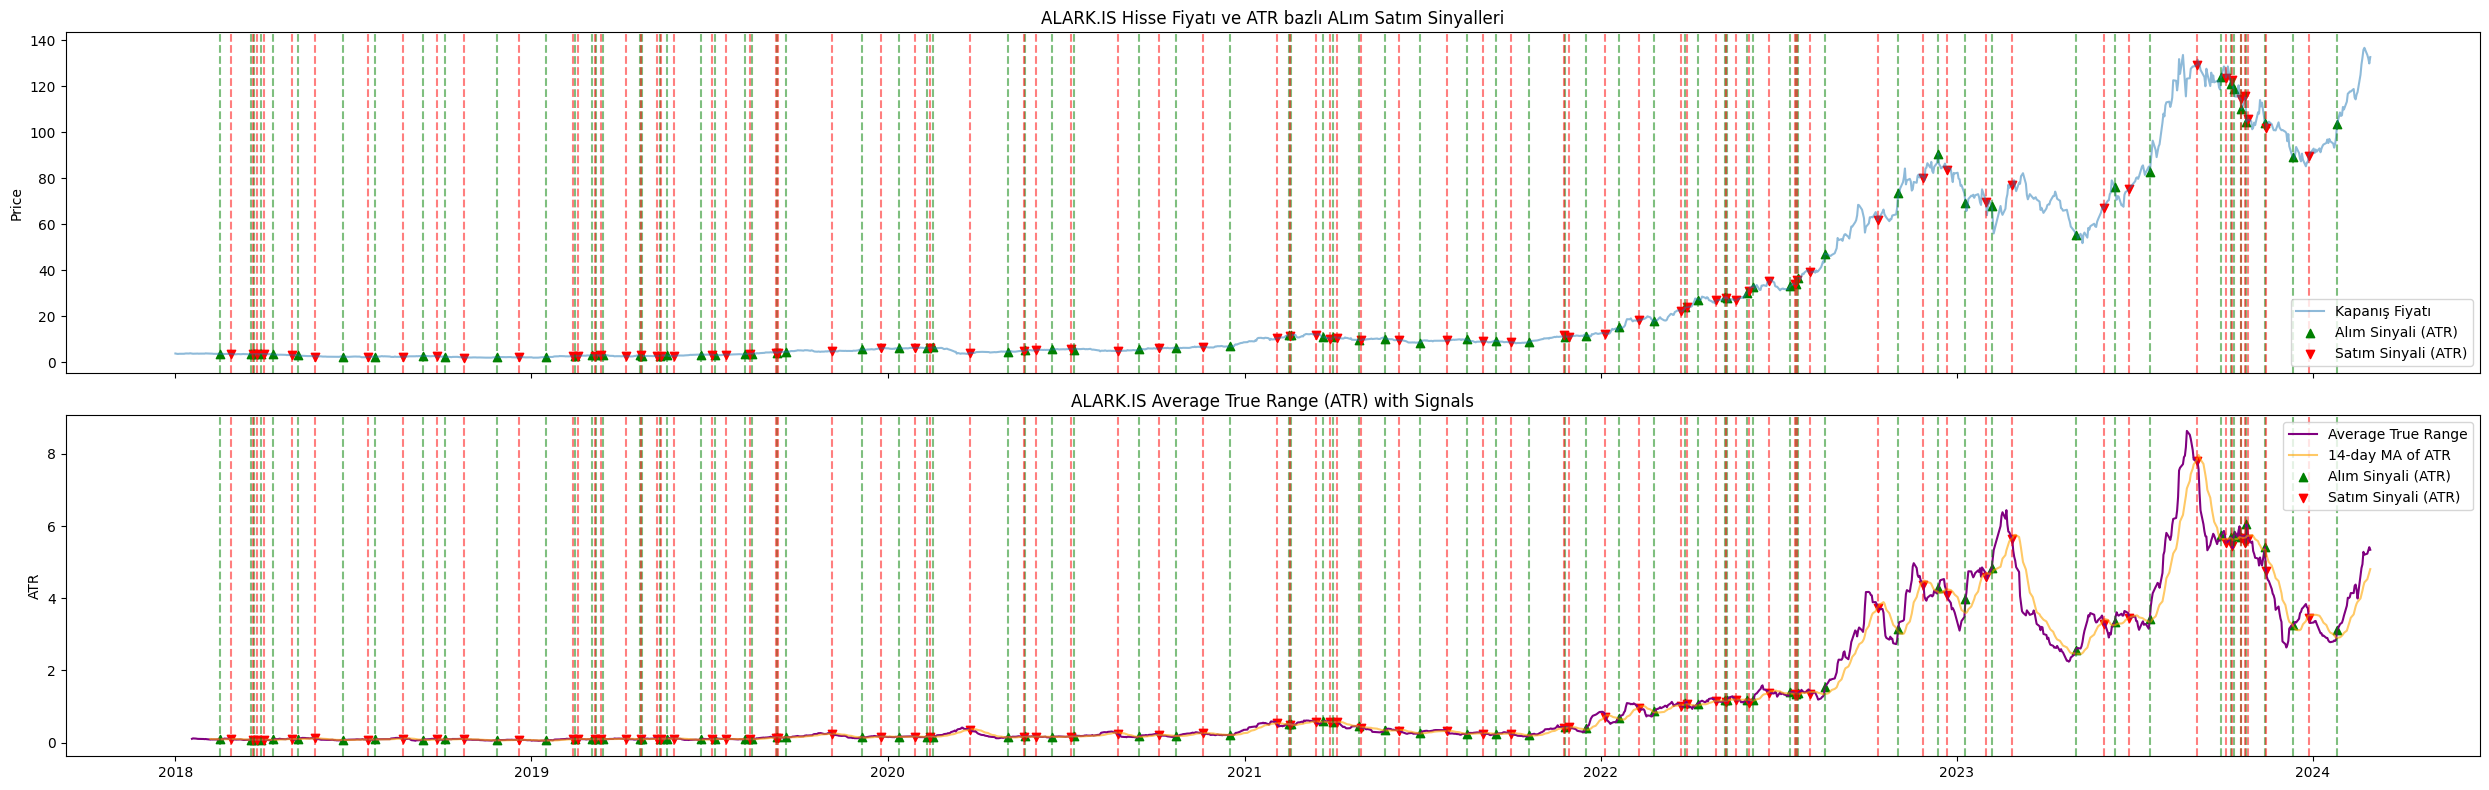

In [35]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# ATR hesaplama fonksiyonu
def calculate_atr(data, window=14):
    high_low = data['High'] - data['Low']
    high_close = abs(data['High'] - data['Close'].shift())
    low_close = abs(data['Low'] - data['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    atr = true_range.rolling(window=window).mean()
    return atr

# data
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# MA ve ATR hesaplama
data['ATR'] = calculate_atr(data)
data['ATR_MA'] = data['ATR'].rolling(window=14).mean()  # 14 Gün ATR nin MA sı 

# alım satım sinyali belirleme
buy_signal = (data['ATR'] > data['ATR_MA']) & (data['ATR'].shift(1) <= data['ATR_MA'].shift(1))
sell_signal = (data['ATR'] < data['ATR_MA']) & (data['ATR'].shift(1) >= data['ATR_MA'].shift(1))

# görsel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 8), sharex=True)  # Share x-axis

# Hisse ve alım satım sinyalleri görsel
ax1.plot(data['Close'], label='Kapanış Fiyatı', alpha=0.5)
ax1.scatter(data.index[buy_signal], data['Close'][buy_signal], label='Alım Sinyali (ATR)', marker='^', color='green', alpha=1)
ax1.scatter(data.index[sell_signal], data['Close'][sell_signal], label='Satım Sinyali (ATR)', marker='v', color='red', alpha=1)
for idx in data.index[buy_signal]:
    ax1.axvline(x=idx, color='green', linestyle='--', alpha=0.5)
for idx in data.index[sell_signal]:
    ax1.axvline(x=idx, color='red', linestyle='--', alpha=0.5)
ax1.set_title(f'{ticker} Hisse Fiyatı ve ATR bazlı ALım Satım Sinyalleri')
ax1.set_ylabel('Price')
ax1.legend()

# A
ax2.plot(data['ATR'], label='Average True Range', color='purple')
ax2.plot(data['ATR_MA'], label='14-day MA of ATR', color='orange', alpha=0.6)
ax2.scatter(data.index[buy_signal], data['ATR'][buy_signal], label='Alım Sinyali (ATR)', marker='^', color='green')
ax2.scatter(data.index[sell_signal], data['ATR'][sell_signal], label='Satım Sinyali (ATR)', marker='v', color='red')
for idx in data.index[buy_signal]:
    ax2.axvline(x=idx, color='green', linestyle='--', alpha=0.5)
for idx in data.index[sell_signal]:
    ax2.axvline(x=idx, color='red', linestyle='--', alpha=0.5)
ax2.set_title(f'{ticker} Average True Range (ATR) with Signals')
ax2.set_ylabel('ATR')
ax2.legend()

plt.tight_layout()
plt.show()

ATR bazlı alış (yeşil) ve satış (kırmızı) sinyalleriyle hisse senedi fiyatı ve 14 günlük hareketli ortalamayla ATR değeri.

Bollinger Bands



Bu bantlar piyasa oynaklığı ve aşırı alım/aşırı satım koşulları hakkında bilgi sağlar. Bollinger Bantları ortalamaya dönüş stratejileri için kullanılır; Fiyat alt banda ulaştığında alım, üst banda ulaştığında ise satış yapılır.

Orta Bant (MB): Son n dönemin basit hareketli ortalaması (SMA). MB=SMA(n)
Üst Bant (UB): k standart sapmayı (SD) orta bandın üzerine ayarlayın. UB=MB+(k×SD)
Alt Bant (LB): k standart sapmayı (SD) orta bandın altına ayarlayın. LB=MB−(k×SD)
Genişleyen bantlar piyasa oynaklığının arttığını, daralan bantlar ise oynaklığın azaldığını gösteriyor.

Bollinger Bantlarının aydınlatıcı ancak hemen göze çarpmayan bir yönü, oynaklık için ATR'ye benzer şekilde piyasa koşullarına dinamik olarak uyum sağlama yetenekleridir.

Ancak Bollinger Bantları, fiyatı son aralığına göre görsel olarak temsil ederek bir trend analizi katmanı ekler. Bantlar daraldığında ("sıkıldığında"), genellikle her iki yönde de önemli bir fiyat hareketi öncesinde gerçekleşir, bu da piyasanın konsolidasyona uğradığını ve bir kırılmanın yakın olduğunu gösterir.

[*********************100%%**********************]  1 of 1 completed


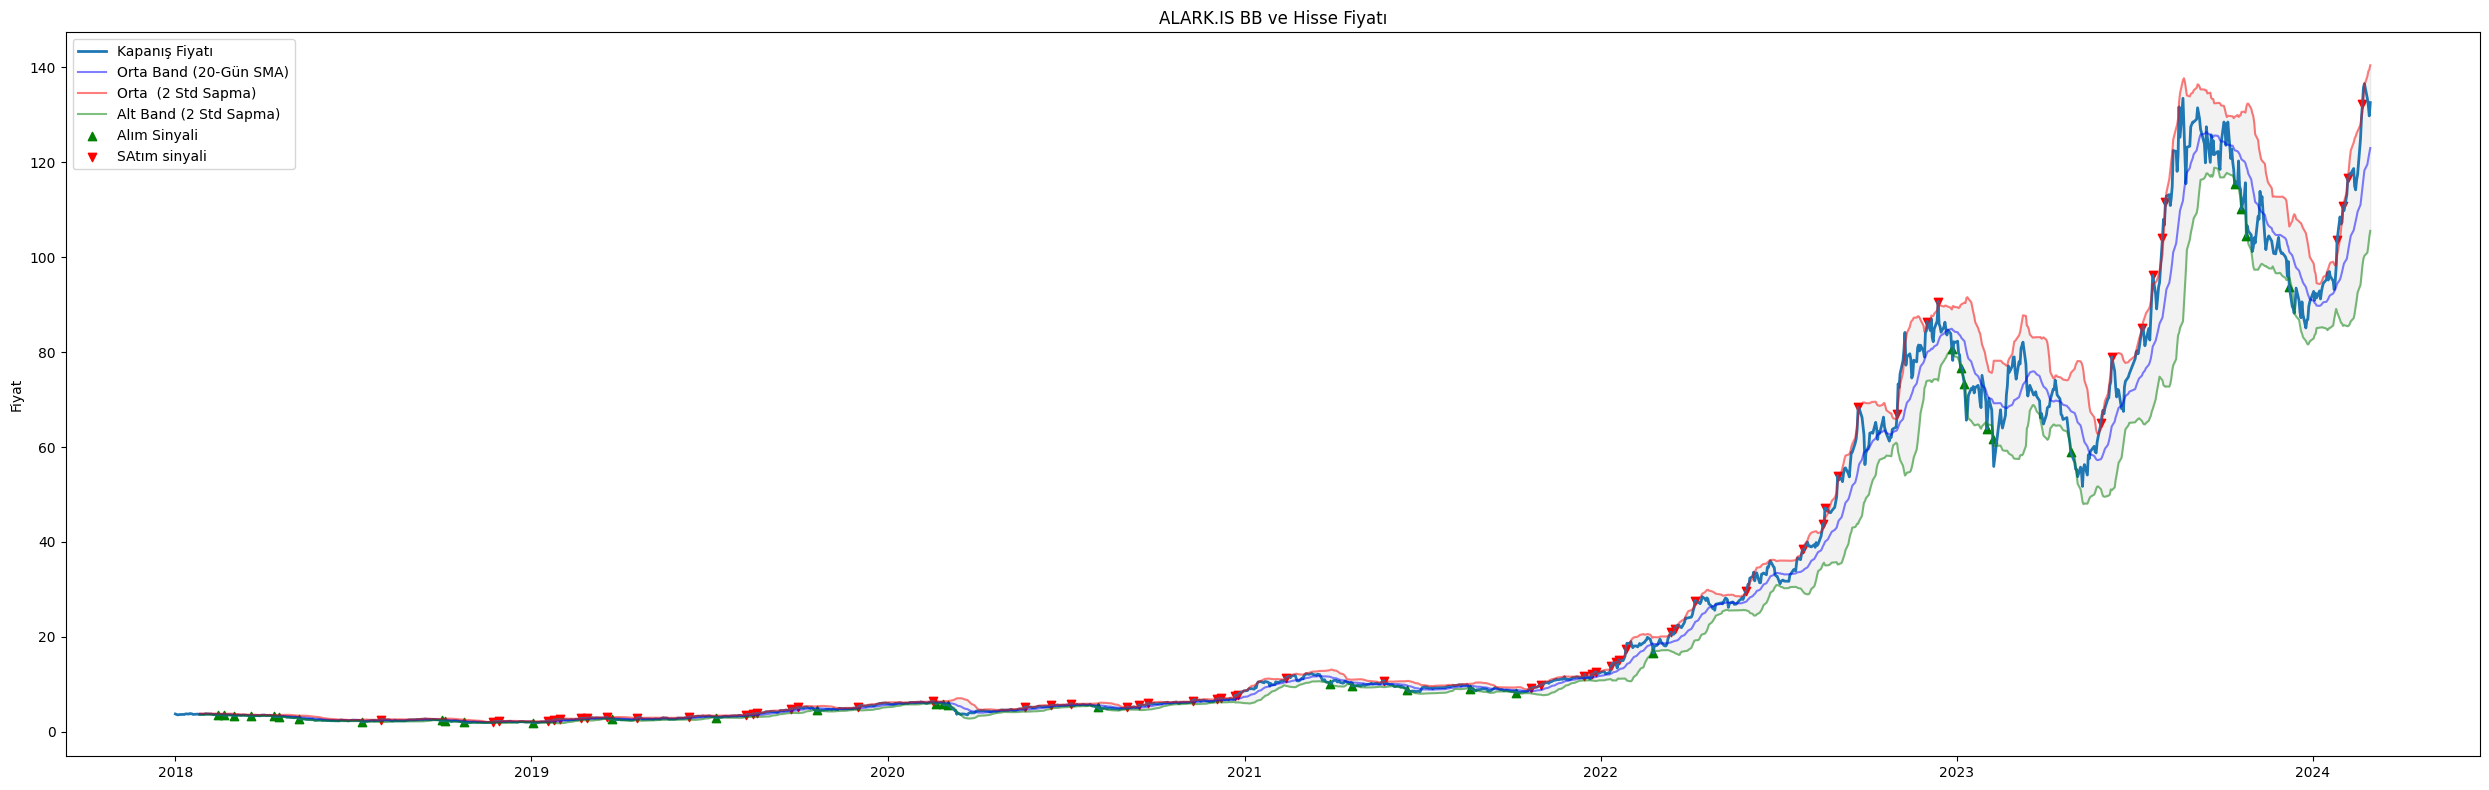

In [36]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)
    return rolling_mean, upper_band, lower_band

# data
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# BB hesaplama
data['Middle Band'], data['Upper Band'], data['Lower Band'] = calculate_bollinger_bands(data)

# alım satım sinyalleri hesaplama
buy_signal = (data['Close'] < data['Lower Band']) & (data['Close'].shift(1) >= data['Lower Band'].shift(1))
sell_signal = (data['Close'] > data['Upper Band']) & (data['Close'].shift(1) <= data['Upper Band'].shift(1))

# Plotting
fig, ax = plt.subplots(figsize=(25, 8))

# BB alım satım sinyalleri ve hisse fiyatı
ax.plot(data['Close'], label='Kapanış Fiyatı', alpha=1, linewidth=2)
ax.plot(data['Middle Band'], label='Orta Band (20-Gün SMA)', color='blue', alpha=0.5)
ax.plot(data['Upper Band'], label='Orta  (2 Std Sapma)', color='red', alpha=0.5)
ax.plot(data['Lower Band'], label='Alt Band (2 Std Sapma)', color='green', alpha=0.5)
ax.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='grey', alpha=0.1)
ax.scatter(data.index[buy_signal], data['Close'][buy_signal], label='Alım Sinyali', marker='^', color='green', alpha=1)
ax.scatter(data.index[sell_signal], data['Close'][sell_signal], label='SAtım sinyali', marker='v', color='red', alpha=1)
ax.set_title(f'{ticker} BB ve Hisse Fiyatı')
ax.set_ylabel('Fiyat')
ax.legend()

plt.tight_layout()
plt.show()

Bollinger Bantları içindeki hisse senedi fiyatı hareketi, fiyat Alt Bant'a dokunduğunda alım sinyallerini ve Üst Bantta satış sinyallerini işaret eder. Bantların genişlemesi ve daralması görsel olarak piyasa oynaklığını temsil ediyor.

Donchian Kanalları
Bu kanallar en yüksek en yüksek ve en düşük en düşük seviyeleri temel alarak piyasa aralığı ve volatiliteye ilişkin bir görünüm sunar. Kanalın genişliği volatiliteyi yansıtıyor; Daha geniş kanallar daha fazla volatiliteye işaret ediyor. Donchian Kanalları çıkış stratejilerinde popülerdir.

Fiyat üst bandın üzerine çıktığında alış sinyali, alt bandın altına kırıldığında ise satış sinyali üretilir. Bu kanallar aynı zamanda fiyatın bir kanalın üstünde veya altında kalmasının güçlü bir eğilimi gösterebileceği trend takibine de yardımcı olur.

Üst Bant (UB): max(Son n periyotta yüksek)
Alt Bant (LB): min(Son n periyotta düşük)
Donchian Kanallarının incelikli bir yönü, pazardaki konsolidasyon aşamalarını vurgulamadaki etkinliğidir. Kanalların daralması volatilitenin azaldığını ve varlığın konsolidasyona girdiğini gösterir. Konsolidasyon dönemleri genellikle önemli fiyat hareketlerinden önce geldiğinden, bu özellikle çıkış fırsatları arayan yatırımcılar için yararlı olabilir.

[*********************100%%**********************]  1 of 1 completed


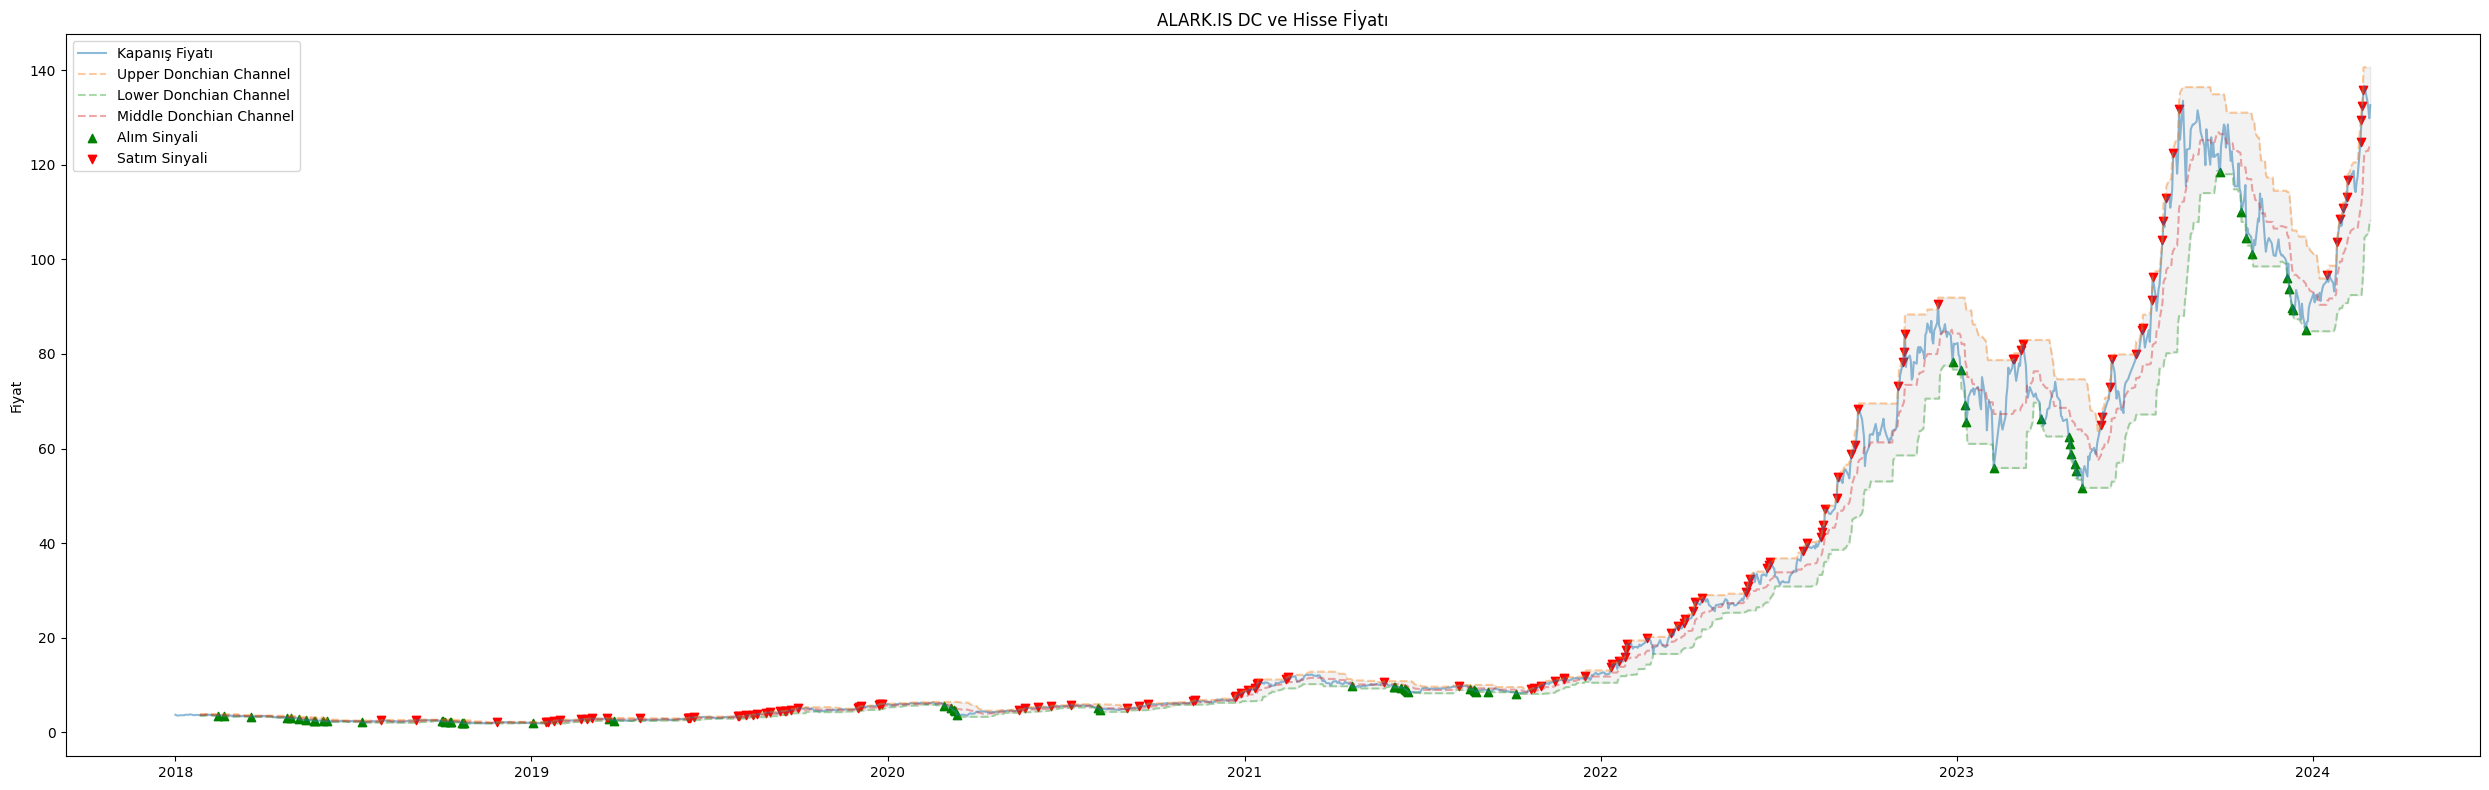

In [37]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_donchian_channel(data, window=20):
    data['Upper'] = data['High'].rolling(window=window).max()
    data['Lower'] = data['Low'].rolling(window=window).min()
    data['Middle'] = (data['Upper'] + data['Lower']) / 2
    return data

def generate_signals(data):
    # Kapanış fiyatı alttan üst bandın üzerine geçtiğinde satın alın

    buy_signals = (data['Close'] < data['Lower'].shift(1)) & (data['Close'].shift(1) >= data['Lower'].shift(1))
    # Kapanış fiyatı yukarıdan alt bandın altına geçtiğinde satış yapın
    sell_signals = (data['Close'] > data['Upper'].shift(1)) & (data['Close'].shift(1) <= data['Upper'].shift(1))
    return buy_signals, sell_signals

# data
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# 20 gün DC hesaplama

data = calculate_donchian_channel(data, window)

# alıms atım sinyalleri
buy_signals, sell_signals = generate_signals(data)
data['Buy Signals'] = buy_signals
data['Sell Signals'] = sell_signals

# görsel
fig, ax = plt.subplots(figsize=(25, 8))

# Donchian Kanalları ve alış/satış sinyalleri ile hisse senedi fiyatı grafiği
ax.plot(data['Close'], label='Kapanış Fiyatı', alpha=0.5)
ax.plot(data['Upper'], label='Upper Donchian Channel', linestyle='--', alpha=0.4)
ax.plot(data['Lower'], label='Lower Donchian Channel', linestyle='--', alpha=0.4)
ax.plot(data['Middle'], label='Middle Donchian Channel', linestyle='--', alpha=0.4)
ax.fill_between(data.index, data['Lower'], data['Upper'], color='grey', alpha=0.1)

# Mark buy and sell signals
ax.scatter(data.index[data['Buy Signals']], data['Close'][data['Buy Signals']], label='Alım Sinyali', marker='^', color='green', alpha=1)
ax.scatter(data.index[data['Sell Signals']], data['Close'][data['Sell Signals']], label='Satım Sinyali', marker='v', color='red', alpha=1)

ax.set_title(f'{ticker} DC ve Hisse Fİyatı')
ax.set_ylabel('Fiyat')
ax.legend()

plt.tight_layout()
plt.show()

Donchian Kanalları ile Hisse Senedi Fiyatı hareketi, fiyat Üst Bandı aştığında yeşil işaretlerle satın alma sinyallerini ve Alt Bandın altına düştüğünde kırmızı işaretlerle satış sinyallerini vurgular.

 Keltner Channels




Keltner Kanalları bant ayarı için ATR'yi kullanır ve bu da onları volatilite artışlarına karşı duyarlı hale getirir. Kanallar daha değişken piyasalarda genişler ve daha sakin piyasalarda daralır.

Bollinger Bantlarına benzer şekilde, ortalamaya dönüş ve kırılma stratejileri için kullanılabilirler. Yaygın bir yaklaşım, fiyat kanal dışına çıktıktan sonra tekrar kanal içinde kapandığında satın almaktır, bu da potansiyel bir geri dönüşe işaret eder.

Orta Çizgi (ML): Son n dönemin üstel hareketli ortalaması (EMA). ML=EMA(n)
Üst Bant (UB): ML artı Ortalama Gerçek Aralığın (ATR) k katı. UB=ML+(k×ATR)
Alt Bant (LB): ML eksi k çarpı ATR. LB=ML−(k×ATR)
Keltner Kanalları, oynaklık kavramını Üstel Hareketli Ortalama (EMA) ile entegre ederek piyasa eğilimlerine ilişkin benzersiz bir bakış açısı sağlar.

Hemen belli olmayan kritik bir gözlem, Keltner Kanalları ve Bollinger Bantları oynaklığı temsil etme açısından benzer görünse de, Keltner Kanallarının bant belirleme için ATR kullanması, ATR'nin aşırı fiyat hareketlerine odaklanması nedeniyle daha tutarlı bir oynaklık ölçümü sunuyor.

Bu, Keltner Kanallarını normal fiyat dalgalanmaları ile önemli fiyat hareketleri arasında ayrım yapma konusunda özellikle yararlı kılar; yatırımcılara yalnızca hareketli ortalamaya göre fiyat hareketine değil, volatiliteye ve fiyat eğilimlerine dayalı potansiyel kırılmalar veya geri dönüşler için daha net bir sinyal sunar.

[*********************100%%**********************]  1 of 1 completed


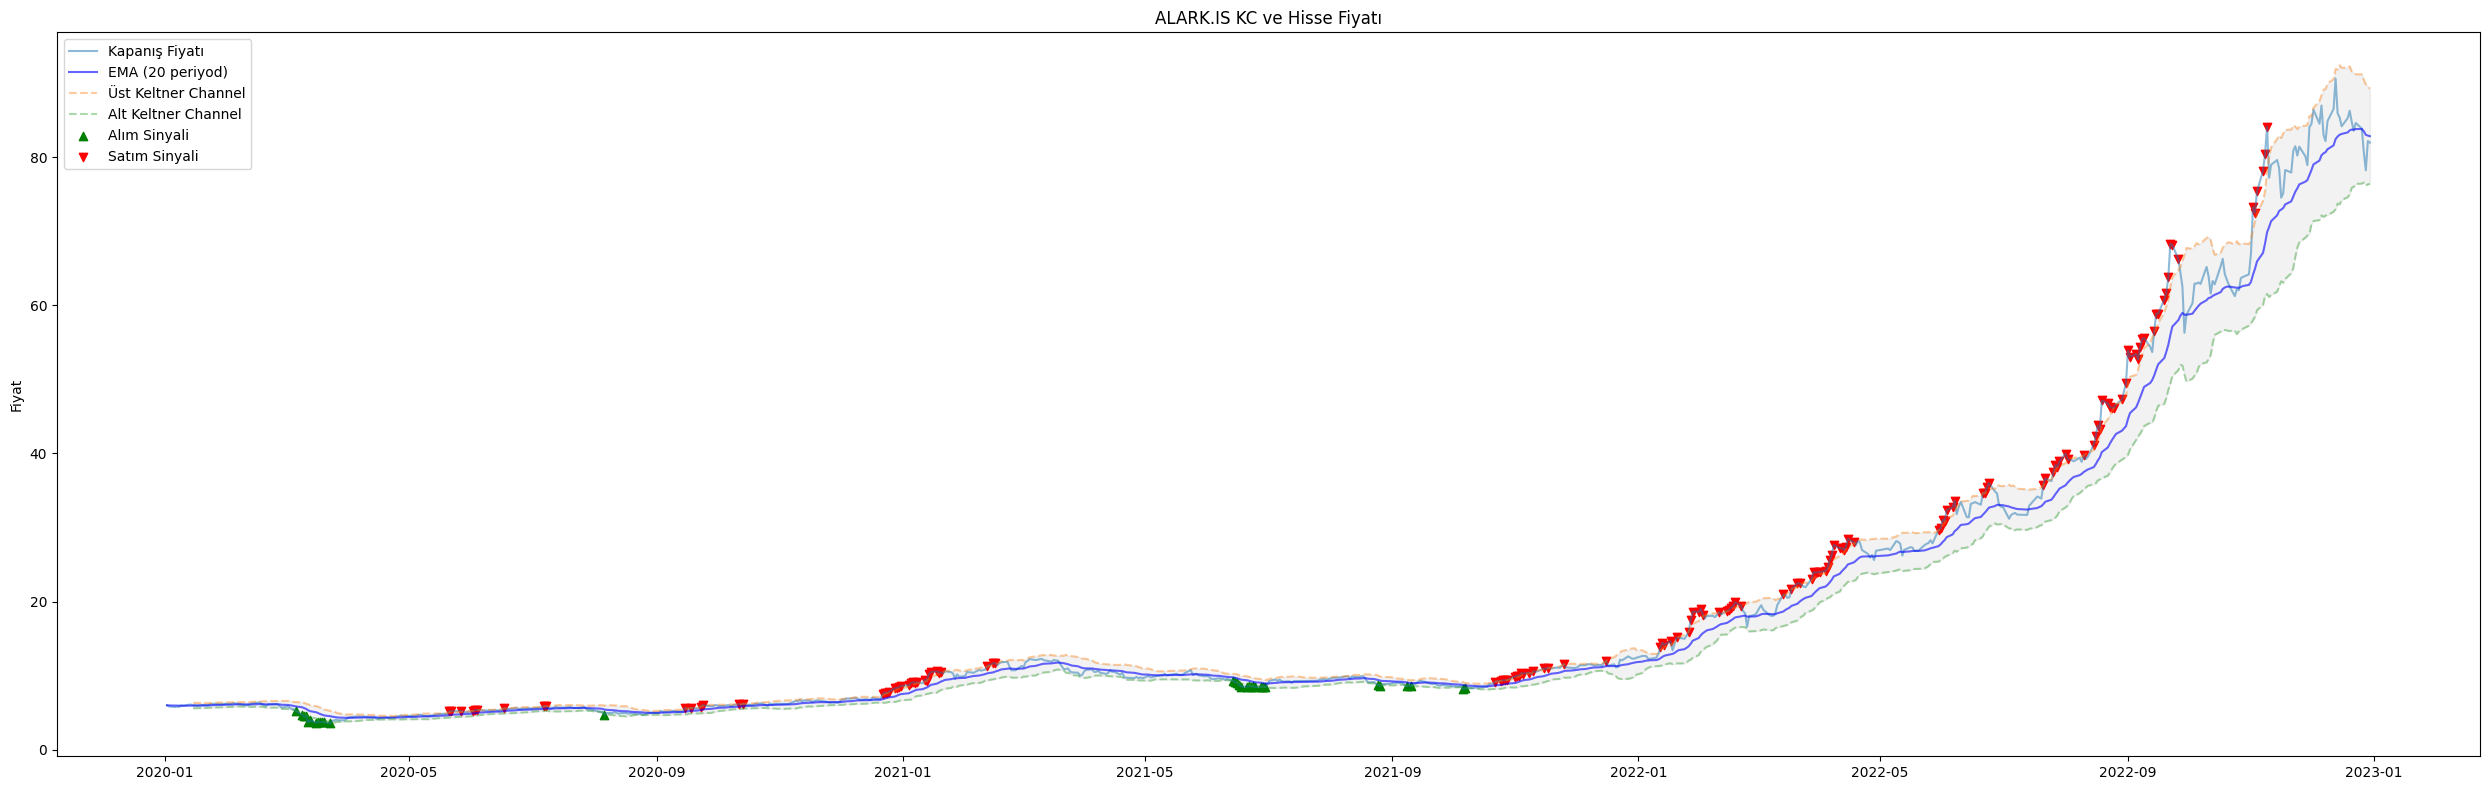

In [38]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_keltner_channel(data, ema_period=20, atr_period=10, multiplier=2):
    # EMA hesaplama
    data['EMA'] = data['Close'].ewm(span=ema_period, adjust=False).mean()

    # ATR hesaplama
    high_low = data['High'] - data['Low']
    high_close = abs(data['High'] - data['Close'].shift())
    low_close = abs(data['Low'] - data['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    data['ATR'] = true_range.rolling(window=atr_period).mean()
    
    #üst ve alt band hesabı
    data['Upper'] = data['EMA'] + (data['ATR'] * multiplier)
    data['Lower'] = data['EMA'] - (data['ATR'] * multiplier)
    
    return data

def generate_signals(data):
    # kapanış üst bandın üzerinde olduğunda al
    buy_signals = (data['Close'] < data['Lower'])
    # kapanış alt bandın altında oılduğunda sat
    sell_signals = (data['Close'] > data['Upper'])
    return buy_signals, sell_signals

# data
ticker = tickers
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# KC 
data = calculate_keltner_channel(data)

# alım satım sinyalleri üretme
data['Buy Signals'], data['Sell Signals'] = generate_signals(data)

# görsel
fig, ax = plt.subplots(figsize=(25, 8))

# Stock price plot with Keltner Channels and buy/sell signals
ax.plot(data['Close'], label='Kapanış Fiyatı', alpha=0.5)
ax.plot(data['EMA'], label='EMA (20 periyod)', color='blue', alpha=0.6)
ax.plot(data['Upper'], label='Üst Keltner Channel', linestyle='--', alpha=0.4)
ax.plot(data['Lower'], label='Alt Keltner Channel', linestyle='--', alpha=0.4)
ax.fill_between(data.index, data['Lower'], data['Upper'], color='grey', alpha=0.1)
ax.scatter(data.index[data['Buy Signals']], data['Close'][data['Buy Signals']], label='Alım Sinyali', marker='^', color='green', alpha=1)
ax.scatter(data.index[data['Sell Signals']], data['Close'][data['Sell Signals']], label='Satım Sinyali', marker='v', color='red', alpha=1)
ax.set_title(f'{ticker} KC ve Hisse Fiyatı')
ax.set_ylabel('Fiyat')
ax.legend()

plt.tight_layout()
plt.show()

Keltner Kanallarında Hisse Senedi Fiyatı, fiyat kanal içine geri döndüğünde satın alma sinyalleri yeşil oklarla işaretlenir ve kanaldan çıktığında satış sinyalleri kırmızı oklarla işaretlenir. Bantların dalgalanması volatiliteyi gösterir.

Volatility Chaikin


Bu gösterge, yüksek ve düşük fiyat aralığının merceğinden volatiliteyi ölçer. Artan değerler, piyasanın zirve veya dip noktalarından önce gelebilecek volatilitenin arttığını gösteriyor.

Piyasa volatilitesindeki aşırılıkları tanımlamak için kullanılır. Yatırımcılar düşük volatilite dönemlerini (potansiyel konsolidasyon) ve ardından volatilitede ani yükselişleri (potansiyel kırılma) bekleyebilirler.

Chaikin Volatilitesi, belirli bir n dönemi boyunca yüksek-düşük spreadin Üstel Hareketli Ortalamasında (EMA) önceki döneme kıyasla yüzde değişim olarak hesaplanır. Formül şu şekilde ifade edilir:

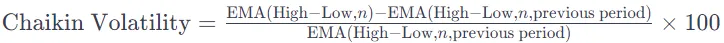

Chaikin Volatilite Formülü: Piyasa volatilitesinin arttığı veya azaldığı dönemleri vurgulayarak günlük fiyat aralığının (Yüksek-Düşük) EMA'sındaki yüzde değişimi hesaplar.

Chaikin Volatilite göstergesine ilişkin daha derin bir anlayış, piyasa duyarlılığındaki değişimleri fiyat hareketlerine yansımadan önce tahmin edebilme yeteneğidir.

Çoğu tüccar, yüksek volatiliteyi piyasanın tepe noktalarıyla ve düşük volatiliteyi diplerle ilişkilendirirken, volatilite değişimlerinin zamanlaması ve yönü, potansiyel geri dönüşleri veya devamları belirlemek için incelikli sinyaller sunabilir.

Örneğin, volatilitedeki kademeli bir düşüş ve ardından keskin bir artış, önemli bir fiyat kırılmasının öncesinde piyasa baskısının arttığına işaret edebilir.

Bu model, yatırımcıların Chaikin Volatilitesini sadece mevcut piyasa volatilitesini ölçmek için değil, aynı zamanda gelecekteki piyasa dinamiklerini tahmin etmek için de kullanabileceğini ve bunun da onu önleyici ticaret kararları için stratejik bir araç haline getirebileceğini öne sürüyor.

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def calculate_chaikin_volatility(data, ema_period=10, change_period=10):
    # High - Low Spreadi
    data['HL_Spread'] = data['High'] - data['Low']
    
    # spreadin eması
    data['EMA_HL_Spread'] = data['HL_Spread'].ewm(span=ema_period, adjust=False).mean()
    
    # Chaikin Volatility
    data['Chaikin_Volatility'] = (data['EMA_HL_Spread'] - data['EMA_HL_Spread'].shift(change_period)) / data['EMA_HL_Spread'].shift(change_period) * 100
    
    return data

# data
ticker = tickers
data = yf.download(ticker, start=start_date, end=end_date)

# Chaikin Volatility Hesaplama
data = calculate_chaikin_volatility(data)

# görsel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10), gridspec_kw={'height_ratios': [2, 1]})

# hisse görseli
ax1.plot(data['Close'], label='Kapanış Fiyatı', color='blue')
ax1.set_title(f'{ticker} Hisse Fiyatı')
ax1.set_ylabel('Fiyat')
ax1.legend()

# Chaikin Volatility görseli
ax2.plot(data['Chaikin_Volatility'], label='Chaikin Volatility', color='orange')
ax2.set_title('Chaikin Volatility Indicator')
ax2.set_ylabel('Volatility (%)')
ax2.legend()

plt.tight_layout()
plt.show()